# 0.0 IMPORTS

In [231]:
import pandas                                     as pd
import inflection
import math
import numpy                                      as np
import seaborn                                    as sns
import matplotlib.pyplot                          as plt
import matplotlib.gridspec                        as gridspec

import datetime
from IPython.display       import Image
from IPython.core.display  import HTML

from imblearn              import over_sampling   as os
from imblearn              import combine         as c
from sklearn.manifold      import TSNE
from sklearn               import model_selection as ms
from sklearn               import ensemble        as en

from boruta                import BorutaPy
import random
from sklearn               import metrics         as m
from scikitplot            import metrics         as mt
from sklearn               import neighbors       as nb
from sklearn               import linear_model    as lm
from sklearn               import svm

import pickle

## 0.1 Helper Function

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


C:\Users\favh2\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 0.2. Loading data

In [4]:
df_cols_name = pd.read_csv('data/features.txt', sep="          ", header=None)
cols_name = df_cols_name[0].tolist()

C:\Users\favh2\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
df_X_raw = pd.read_csv('data/train/X_train.txt', sep=" ", header=None)
df_y_raw = pd.read_csv('data/train/y_train.txt', sep=" ", header=None)
df_subject_raw = pd.read_csv('data/train/subject_id_train.txt', sep=" ", header=None)

df_X_raw.columns = cols_name

# join
df_raw = df_X_raw
df_raw['subject'] = df_subject_raw
df_raw['position'] = df_y_raw

In [6]:
df_raw.sample()

tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  tBodyAcc-Mad-2  tBodyAcc-Mad-3  tBodyAcc-Max-1  tBodyAcc-Max-2  tBodyAcc-Max-3  tBodyAcc-Min-1  tBodyAcc-Min-2  tBodyAcc-Min-3  tBodyAcc-SMA-1  tBodyAcc-Energy-1  tBodyAcc-Energy-2  tBodyAcc-Energy-3  tBodyAcc-IQR-1  tBodyAcc-IQR-2  tBodyAcc-IQR-3  tBodyAcc-ropy-1  tBodyAcc-ropy-1  tBodyAcc-ropy-1  tBodyAcc-ARCoeff-1  tBodyAcc-ARCoeff-2  tBodyAcc-ARCoeff-3  tBodyAcc-ARCoeff-4  tBodyAcc-ARCoeff-5  tBodyAcc-ARCoeff-6  tBodyAcc-ARCoeff-7  tBodyAcc-ARCoeff-8  tBodyAcc-ARCoeff-9  tBodyAcc-ARCoeff-10  tBodyAcc-ARCoeff-11  tBodyAcc-ARCoeff-12  tBodyAcc-Correlation-1  tBodyAcc-Correlation-2  tBodyAcc-Correlation-3  tGravityAcc-Mean-1  tGravityAcc-Mean-2  tGravityAcc-Mean-3  tGravityAcc-STD-1  tGravityAcc-STD-2  tGravityAcc-STD-3  tGravityAcc-Mad-1  tGravityAcc-Mad-2  tGravityAcc-Mad-3  tGravityAcc-Max-1  tGravityAcc-Max-2  tGravityAcc-Max-3  tGravityAcc-Min-1  tGravityAcc-Min-2  tGravityAcc-Min-3  tGravityAcc-SMA-1  tGravityAcc-Energy-1  tGravityAcc-Energy-2  tGravityAcc-Energy-3  tGravityAcc-IQR-1  tGravityAcc-IQR-2  tGravityAcc-IQR-3  tGravityAcc-ropy-1  tGravityAcc-ropy-1  tGravityAcc-ropy-1  tGravityAcc-ARCoeff-1  tGravityAcc-ARCoeff-2  tGravityAcc-ARCoeff-3  tGravityAcc-ARCoeff-4  tGravityAcc-ARCoeff-5  tGravityAcc-ARCoeff-6  tGravityAcc-ARCoeff-7  tGravityAcc-ARCoeff-8  tGravityAcc-ARCoeff-9  tGravityAcc-ARCoeff-10  tGravityAcc-ARCoeff-11  tGravityAcc-ARCoeff-12  tGravityAcc-Correlation-1  tGravityAcc-Correlation-2  tGravityAcc-Correlation-3  tBodyAccJerk-Mean-1  tBodyAccJerk-Mean-2  tBodyAccJerk-Mean-3  tBodyAccJerk-STD-1  tBodyAccJerk-STD-2  tBodyAccJerk-STD-3  tBodyAccJerk-Mad-1  tBodyAccJerk-Mad-2  tBodyAccJerk-Mad-3  tBodyAccJerk-Max-1  tBodyAccJerk-Max-2  tBodyAccJerk-Max-3  tBodyAccJerk-Min-1  tBodyAccJerk-Min-2  tBodyAccJerk-Min-3  tBodyAccJerk-SMA-1  tBodyAccJerk-Energy-1  tBodyAccJerk-Energy-2  tBodyAccJerk-Energy-3  tBodyAccJerk-IQR-1  tBodyAccJerk-IQR-2  tBodyAccJerk-IQR-3  tBodyAccJerk-ropy-1  tBodyAccJerk-ropy-1  tBodyAccJerk-ropy-1  tBodyAccJerk-ARCoeff-1  tBodyAccJerk-ARCoeff-2  tBodyAccJerk-ARCoeff-3  tBodyAccJerk-ARCoeff-4  tBodyAccJerk-ARCoeff-5  tBodyAccJerk-ARCoeff-6  tBodyAccJerk-ARCoeff-7  tBodyAccJerk-ARCoeff-8  tBodyAccJerk-ARCoeff-9  tBodyAccJerk-ARCoeff-10  tBodyAccJerk-ARCoeff-11  tBodyAccJerk-ARCoeff-12  tBodyAccJerk-Correlation-1  tBodyAccJerk-Correlation-2  tBodyAccJerk-Correlation-3  tBodyGyro-Mean-1  tBodyGyro-Mean-2  tBodyGyro-Mean-3  tBodyGyro-STD-1  tBodyGyro-STD-2  tBodyGyro-STD-3  tBodyGyro-Mad-1  tBodyGyro-Mad-2  tBodyGyro-Mad-3  tBodyGyro-Max-1  tBodyGyro-Max-2  tBodyGyro-Max-3  tBodyGyro-Min-1  tBodyGyro-Min-2  tBodyGyro-Min-3  tBodyGyro-SMA-1  tBodyGyro-Energy-1  tBodyGyro-Energy-2  tBodyGyro-Energy-3  tBodyGyro-IQR-1  tBodyGyro-IQR-2  tBodyGyro-IQR-3  tBodyGyro-ropy-1  tBodyGyro-ropy-1  tBodyGyro-ropy-1  tBodyGyro-ARCoeff-1  tBodyGyro-ARCoeff-2  tBodyGyro-ARCoeff-3  tBodyGyro-ARCoeff-4  tBodyGyro-ARCoeff-5  tBodyGyro-ARCoeff-6  tBodyGyro-ARCoeff-7  tBodyGyro-ARCoeff-8  tBodyGyro-ARCoeff-9  tBodyGyro-ARCoeff-10  tBodyGyro-ARCoeff-11  tBodyGyro-ARCoeff-12  tBodyGyro-Correlation-1  tBodyGyro-Correlation-2  tBodyGyro-Correlation-3  tBodyGyroJerk-Mean-1  tBodyGyroJerk-Mean-2  tBodyGyroJerk-Mean-3  tBodyGyroJerk-STD-1  tBodyGyroJerk-STD-2  tBodyGyroJerk-STD-3  tBodyGyroJerk-Mad-1  tBodyGyroJerk-Mad-2  tBodyGyroJerk-Mad-3  tBodyGyroJerk-Max-1  tBodyGyroJerk-Max-2  tBodyGyroJerk-Max-3  tBodyGyroJerk-Min-1  tBodyGyroJerk-Min-2  tBodyGyroJerk-Min-3  tBodyGyroJerk-SMA-1  tBodyGyroJerk-Energy-1  tBodyGyroJerk-Energy-2  tBodyGyroJerk-Energy-3  tBodyGyroJerk-IQR-1  tBodyGyroJerk-IQR-2  tBodyGyroJerk-IQR-3  tBodyGyroJerk-ropy-1  tBodyGyroJerk-ropy-1  tBodyGyroJerk-ropy-1  tBodyGyroJerk-ARCoeff-1  tBodyGyroJerk-ARCoeff-2  tBodyGyroJerk-ARCoeff-3  tBodyGyroJerk-ARCoeff-4  tBodyGyroJerk-ARCoeff-5  tBodyGyroJerk-ARCoeff-6  tBodyGyroJerk-ARCoeff-7  tBodyGyroJerk-ARCoeff-8  tBodyGyroJerk-ARCoef

In [7]:
# To make the exploration of the data that we are going to do later on, I will replace the numbers contained in the target column with their respective references.
# This relation is contained in the file "activity_labels"

df_raw['position'] = df_raw['position'].map( {  1 : 'WALKING',           
                                            2 : 'WALKING_UPSTAIRS',  
                                            3 : 'WALKING_DOWNSTAIRS',
                                            4 : 'SITTING',           
                                            5 : 'STANDING',          
                                            6 : 'LAYING',            
                                            7 : 'STAND_TO_SIT',      
                                            8 : 'SIT_TO_STAND',      
                                            9 : 'SIT_TO_LIE',        
                                            10 : 'LIE_TO_SIT',        
                                            11 : 'STAND_TO_LIE',      
                                            12 : 'LIE_TO_STAND' } )

In [8]:
df_raw.sample(5)

tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  tBodyAcc-Mad-2  tBodyAcc-Mad-3  tBodyAcc-Max-1  tBodyAcc-Max-2  tBodyAcc-Max-3  tBodyAcc-Min-1  tBodyAcc-Min-2  tBodyAcc-Min-3  tBodyAcc-SMA-1  tBodyAcc-Energy-1  tBodyAcc-Energy-2  tBodyAcc-Energy-3  tBodyAcc-IQR-1  tBodyAcc-IQR-2  tBodyAcc-IQR-3  tBodyAcc-ropy-1  tBodyAcc-ropy-1  tBodyAcc-ropy-1  tBodyAcc-ARCoeff-1  tBodyAcc-ARCoeff-2  tBodyAcc-ARCoeff-3  tBodyAcc-ARCoeff-4  tBodyAcc-ARCoeff-5  tBodyAcc-ARCoeff-6  tBodyAcc-ARCoeff-7  tBodyAcc-ARCoeff-8  tBodyAcc-ARCoeff-9  tBodyAcc-ARCoeff-10  tBodyAcc-ARCoeff-11  tBodyAcc-ARCoeff-12  tBodyAcc-Correlation-1  tBodyAcc-Correlation-2  tBodyAcc-Correlation-3  tGravityAcc-Mean-1  tGravityAcc-Mean-2  tGravityAcc-Mean-3  tGravityAcc-STD-1  tGravityAcc-STD-2  tGravityAcc-STD-3  tGravityAcc-Mad-1  tGravityAcc-Mad-2  tGravityAcc-Mad-3  tGravityAcc-Max-1  tGravityAcc-Max-2  tGravityAcc-Max-3  tGravityAcc-Min-1  tGravityAcc-Min-2  tGravityAcc-Min-3  tGravityAcc-SMA-1  tGravityAcc-Energy-1  tGravityAcc-Energy-2  tGravityAcc-Energy-3  tGravityAcc-IQR-1  tGravityAcc-IQR-2  tGravityAcc-IQR-3  tGravityAcc-ropy-1  tGravityAcc-ropy-1  tGravityAcc-ropy-1  tGravityAcc-ARCoeff-1  tGravityAcc-ARCoeff-2  tGravityAcc-ARCoeff-3  tGravityAcc-ARCoeff-4  tGravityAcc-ARCoeff-5  tGravityAcc-ARCoeff-6  tGravityAcc-ARCoeff-7  tGravityAcc-ARCoeff-8  tGravityAcc-ARCoeff-9  tGravityAcc-ARCoeff-10  tGravityAcc-ARCoeff-11  tGravityAcc-ARCoeff-12  tGravityAcc-Correlation-1  tGravityAcc-Correlation-2  tGravityAcc-Correlation-3  tBodyAccJerk-Mean-1  tBodyAccJerk-Mean-2  tBodyAccJerk-Mean-3  tBodyAccJerk-STD-1  tBodyAccJerk-STD-2  tBodyAccJerk-STD-3  tBodyAccJerk-Mad-1  tBodyAccJerk-Mad-2  tBodyAccJerk-Mad-3  tBodyAccJerk-Max-1  tBodyAccJerk-Max-2  tBodyAccJerk-Max-3  tBodyAccJerk-Min-1  tBodyAccJerk-Min-2  tBodyAccJerk-Min-3  tBodyAccJerk-SMA-1  tBodyAccJerk-Energy-1  tBodyAccJerk-Energy-2  tBodyAccJerk-Energy-3  tBodyAccJerk-IQR-1  tBodyAccJerk-IQR-2  tBodyAccJerk-IQR-3  tBodyAccJerk-ropy-1  tBodyAccJerk-ropy-1  tBodyAccJerk-ropy-1  tBodyAccJerk-ARCoeff-1  tBodyAccJerk-ARCoeff-2  tBodyAccJerk-ARCoeff-3  tBodyAccJerk-ARCoeff-4  tBodyAccJerk-ARCoeff-5  tBodyAccJerk-ARCoeff-6  tBodyAccJerk-ARCoeff-7  tBodyAccJerk-ARCoeff-8  tBodyAccJerk-ARCoeff-9  tBodyAccJerk-ARCoeff-10  tBodyAccJerk-ARCoeff-11  tBodyAccJerk-ARCoeff-12  tBodyAccJerk-Correlation-1  tBodyAccJerk-Correlation-2  tBodyAccJerk-Correlation-3  tBodyGyro-Mean-1  tBodyGyro-Mean-2  tBodyGyro-Mean-3  tBodyGyro-STD-1  tBodyGyro-STD-2  tBodyGyro-STD-3  tBodyGyro-Mad-1  tBodyGyro-Mad-2  tBodyGyro-Mad-3  tBodyGyro-Max-1  tBodyGyro-Max-2  tBodyGyro-Max-3  tBodyGyro-Min-1  tBodyGyro-Min-2  tBodyGyro-Min-3  tBodyGyro-SMA-1  tBodyGyro-Energy-1  tBodyGyro-Energy-2  tBodyGyro-Energy-3  tBodyGyro-IQR-1  tBodyGyro-IQR-2  tBodyGyro-IQR-3  tBodyGyro-ropy-1  tBodyGyro-ropy-1  tBodyGyro-ropy-1  tBodyGyro-ARCoeff-1  tBodyGyro-ARCoeff-2  tBodyGyro-ARCoeff-3  tBodyGyro-ARCoeff-4  tBodyGyro-ARCoeff-5  tBodyGyro-ARCoeff-6  tBodyGyro-ARCoeff-7  tBodyGyro-ARCoeff-8  tBodyGyro-ARCoeff-9  tBodyGyro-ARCoeff-10  tBodyGyro-ARCoeff-11  tBodyGyro-ARCoeff-12  tBodyGyro-Correlation-1  tBodyGyro-Correlation-2  tBodyGyro-Correlation-3  tBodyGyroJerk-Mean-1  tBodyGyroJerk-Mean-2  tBodyGyroJerk-Mean-3  tBodyGyroJerk-STD-1  tBodyGyroJerk-STD-2  tBodyGyroJerk-STD-3  tBodyGyroJerk-Mad-1  tBodyGyroJerk-Mad-2  tBodyGyroJerk-Mad-3  tBodyGyroJerk-Max-1  tBodyGyroJerk-Max-2  tBodyGyroJerk-Max-3  tBodyGyroJerk-Min-1  tBodyGyroJerk-Min-2  tBodyGyroJerk-Min-3  tBodyGyroJerk-SMA-1  tBodyGyroJerk-Energy-1  tBodyGyroJerk-Energy-2  tBodyGyroJerk-Energy-3  tBodyGyroJerk-IQR-1  tBodyGyroJerk-IQR-2  tBodyGyroJerk-IQR-3  tBodyGyroJerk-ropy-1  tBodyGyroJerk-ropy-1  tBodyGyroJerk-ropy-1  tBodyGyroJerk-ARCoeff-1  tBodyGyroJerk-ARCoeff-2  tBodyGyroJerk-ARCoeff-3  tBodyGyroJerk-ARCoeff-4  tBodyGyroJerk-ARCoeff-5  tBodyGyroJerk-ARCoeff-6  tBodyGyroJerk-ARCoeff-7  tBodyGyroJerk-ARCoeff-8  tBodyGyroJerk-ARCoef

# 1.0 STEP 01 - DESCRIPTION OF DATA

In [9]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [10]:
df1.columns

Index(['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3',
       'tBodyAcc-STD-1', 'tBodyAcc-STD-2', 'tBodyAcc-STD-3', 'tBodyAcc-Mad-1',
       'tBodyAcc-Mad-2', 'tBodyAcc-Mad-3', 'tBodyAcc-Max-1',
       ...
       'fBodyGyroJerkMag-Kurtosis-1', 'tBodyAcc-AngleWRTGravity-1',
       'tBodyAccJerk-AngleWRTGravity-1', 'tBodyGyro-AngleWRTGravity-1',
       'tBodyGyroJerk-AngleWRTGravity-1', 'tXAxisAcc-AngleWRTGravity-1',
       'tYAxisAcc-AngleWRTGravity-1', 'tZAxisAcc-AngleWRTGravity-1', 'subject',
       'position'],
      dtype='object', length=563)

In [11]:
# To better unsderstand the name of the columns:

# The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. 
# These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. 
# Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. 
# Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

# Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). 
# Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

# Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

# These signals were used to estimate variables of the feature vector for each pattern: '-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.

# tBodyAcc-XYZ
# tGravityAcc-XYZ
# tBodyAccJerk-XYZ
# tBodyGyro-XYZ
# tBodyGyroJerk-XYZ
# tBodyAccMag
# tGravityAccMag
# tBodyAccJerkMag
# tBodyGyroMag
# tBodyGyroJerkMag
# fBodyAcc-XYZ
# fBodyAccJerk-XYZ
# fBodyGyro-XYZ
# fBodyAccMag
# fBodyAccJerkMag
# fBodyGyroMag
# fBodyGyroJerkMag

# The set of variables that were estimated from these signals are: 

# mean(): Mean value
# std(): Standard deviation
# mad(): Median absolute deviation 
# max(): Largest value in array
# min(): Smallest value in array
# sma(): Signal magnitude area
# energy(): Energy measure. Sum of the squares divided by the number of values. 
# iqr(): Interquartile range 
# entropy(): Signal entropy
# arCoeff(): Autorregresion coefficients with Burg order equal to 4
# correlation(): correlation coefficient between two signals
# maxInds(): index of the frequency component with largest magnitude
# meanFreq(): Weighted average of the frequency components to obtain a mean frequency
# skewness(): skewness of the frequency domain signal 
# kurtosis(): kurtosis of the frequency domain signal 
# bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
# angle(): Angle between to vectors.

## 1.2 Data Dimensions

In [12]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )
# Evaluate the possibilite do use this project in your computer

Number of Rows: 7767
Number of Cols: 563


## 1.3. Data Types

In [13]:
df1.dtypes

tBodyAcc-Mean-1                    float64
tBodyAcc-Mean-2                    float64
tBodyAcc-Mean-3                    float64
tBodyAcc-STD-1                     float64
tBodyAcc-STD-2                     float64
tBodyAcc-STD-3                     float64
tBodyAcc-Mad-1                     float64
tBodyAcc-Mad-2                     float64
tBodyAcc-Mad-3                     float64
tBodyAcc-Max-1                     float64
tBodyAcc-Max-2                     float64
tBodyAcc-Max-3                     float64
tBodyAcc-Min-1                     float64
tBodyAcc-Min-2                     float64
tBodyAcc-Min-3                     float64
tBodyAcc-SMA-1                     float64
tBodyAcc-Energy-1                  float64
tBodyAcc-Energy-2                  float64
tBodyAcc-Energy-3                  float64
tBodyAcc-IQR-1                     float64
tBodyAcc-IQR-2                     float64
tBodyAcc-IQR-3                     float64
tBodyAcc-ropy-1                    float64
tBodyAcc-ro

## 1.4 Check NA

In [14]:
df1.isna().sum()

tBodyAcc-Mean-1                    0
tBodyAcc-Mean-2                    0
tBodyAcc-Mean-3                    0
tBodyAcc-STD-1                     0
tBodyAcc-STD-2                     0
tBodyAcc-STD-3                     0
tBodyAcc-Mad-1                     0
tBodyAcc-Mad-2                     0
tBodyAcc-Mad-3                     0
tBodyAcc-Max-1                     0
tBodyAcc-Max-2                     0
tBodyAcc-Max-3                     0
tBodyAcc-Min-1                     0
tBodyAcc-Min-2                     0
tBodyAcc-Min-3                     0
tBodyAcc-SMA-1                     0
tBodyAcc-Energy-1                  0
tBodyAcc-Energy-2                  0
tBodyAcc-Energy-3                  0
tBodyAcc-IQR-1                     0
tBodyAcc-IQR-2                     0
tBodyAcc-IQR-3                     0
tBodyAcc-ropy-1                    0
tBodyAcc-ropy-1                    0
tBodyAcc-ropy-1                    0
tBodyAcc-ARCoeff-1                 0
tBodyAcc-ARCoeff-2                 0
t

## 1.5 Check Unbalanced Data

In [15]:
df_balance = df1[['subject', 'position']].groupby( 'position' ).count().sort_values( 'subject' ).reset_index()
df_balance['perc%'] = 100*np.round( ( df_balance['subject'] / np.sum( df_balance['subject'] ) ), 4 )

In [16]:
df_balance

position  subject  perc%
0         SIT_TO_STAND       23   0.30
1         STAND_TO_SIT       47   0.61
2         LIE_TO_STAND       57   0.73
3           LIE_TO_SIT       60   0.77
4           SIT_TO_LIE       75   0.97
5         STAND_TO_LIE       90   1.16
6   WALKING_DOWNSTAIRS      987  12.71
7     WALKING_UPSTAIRS     1073  13.81
8              WALKING     1226  15.78
9              SITTING     1293  16.65
10              LAYING     1413  18.19
11            STANDING     1423  18.32

## 1.6 Descriptive Analysis

### 1.6.1 General

In [17]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'] )

In [18]:
num_attributes.sample()

tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  tBodyAcc-Mad-2  tBodyAcc-Mad-3  tBodyAcc-Max-1  tBodyAcc-Max-2  tBodyAcc-Max-3  tBodyAcc-Min-1  tBodyAcc-Min-2  tBodyAcc-Min-3  tBodyAcc-SMA-1  tBodyAcc-Energy-1  tBodyAcc-Energy-2  tBodyAcc-Energy-3  tBodyAcc-IQR-1  tBodyAcc-IQR-2  tBodyAcc-IQR-3  tBodyAcc-ropy-1  tBodyAcc-ropy-1  tBodyAcc-ropy-1  tBodyAcc-ARCoeff-1  tBodyAcc-ARCoeff-2  tBodyAcc-ARCoeff-3  tBodyAcc-ARCoeff-4  tBodyAcc-ARCoeff-5  tBodyAcc-ARCoeff-6  tBodyAcc-ARCoeff-7  tBodyAcc-ARCoeff-8  tBodyAcc-ARCoeff-9  tBodyAcc-ARCoeff-10  tBodyAcc-ARCoeff-11  tBodyAcc-ARCoeff-12  tBodyAcc-Correlation-1  tBodyAcc-Correlation-2  tBodyAcc-Correlation-3  tGravityAcc-Mean-1  tGravityAcc-Mean-2  tGravityAcc-Mean-3  tGravityAcc-STD-1  tGravityAcc-STD-2  tGravityAcc-STD-3  tGravityAcc-Mad-1  tGravityAcc-Mad-2  tGravityAcc-Mad-3  tGravityAcc-Max-1  tGravityAcc-Max-2  tGravityAcc-Max-3  tGravityAcc-Min-1  tGravityAcc-Min-2  tGravityAcc-Min-3  tGravityAcc-SMA-1  tGravityAcc-Energy-1  tGravityAcc-Energy-2  tGravityAcc-Energy-3  tGravityAcc-IQR-1  tGravityAcc-IQR-2  tGravityAcc-IQR-3  tGravityAcc-ropy-1  tGravityAcc-ropy-1  tGravityAcc-ropy-1  tGravityAcc-ARCoeff-1  tGravityAcc-ARCoeff-2  tGravityAcc-ARCoeff-3  tGravityAcc-ARCoeff-4  tGravityAcc-ARCoeff-5  tGravityAcc-ARCoeff-6  tGravityAcc-ARCoeff-7  tGravityAcc-ARCoeff-8  tGravityAcc-ARCoeff-9  tGravityAcc-ARCoeff-10  tGravityAcc-ARCoeff-11  tGravityAcc-ARCoeff-12  tGravityAcc-Correlation-1  tGravityAcc-Correlation-2  tGravityAcc-Correlation-3  tBodyAccJerk-Mean-1  tBodyAccJerk-Mean-2  tBodyAccJerk-Mean-3  tBodyAccJerk-STD-1  tBodyAccJerk-STD-2  tBodyAccJerk-STD-3  tBodyAccJerk-Mad-1  tBodyAccJerk-Mad-2  tBodyAccJerk-Mad-3  tBodyAccJerk-Max-1  tBodyAccJerk-Max-2  tBodyAccJerk-Max-3  tBodyAccJerk-Min-1  tBodyAccJerk-Min-2  tBodyAccJerk-Min-3  tBodyAccJerk-SMA-1  tBodyAccJerk-Energy-1  tBodyAccJerk-Energy-2  tBodyAccJerk-Energy-3  tBodyAccJerk-IQR-1  tBodyAccJerk-IQR-2  tBodyAccJerk-IQR-3  tBodyAccJerk-ropy-1  tBodyAccJerk-ropy-1  tBodyAccJerk-ropy-1  tBodyAccJerk-ARCoeff-1  tBodyAccJerk-ARCoeff-2  tBodyAccJerk-ARCoeff-3  tBodyAccJerk-ARCoeff-4  tBodyAccJerk-ARCoeff-5  tBodyAccJerk-ARCoeff-6  tBodyAccJerk-ARCoeff-7  tBodyAccJerk-ARCoeff-8  tBodyAccJerk-ARCoeff-9  tBodyAccJerk-ARCoeff-10  tBodyAccJerk-ARCoeff-11  tBodyAccJerk-ARCoeff-12  tBodyAccJerk-Correlation-1  tBodyAccJerk-Correlation-2  tBodyAccJerk-Correlation-3  tBodyGyro-Mean-1  tBodyGyro-Mean-2  tBodyGyro-Mean-3  tBodyGyro-STD-1  tBodyGyro-STD-2  tBodyGyro-STD-3  tBodyGyro-Mad-1  tBodyGyro-Mad-2  tBodyGyro-Mad-3  tBodyGyro-Max-1  tBodyGyro-Max-2  tBodyGyro-Max-3  tBodyGyro-Min-1  tBodyGyro-Min-2  tBodyGyro-Min-3  tBodyGyro-SMA-1  tBodyGyro-Energy-1  tBodyGyro-Energy-2  tBodyGyro-Energy-3  tBodyGyro-IQR-1  tBodyGyro-IQR-2  tBodyGyro-IQR-3  tBodyGyro-ropy-1  tBodyGyro-ropy-1  tBodyGyro-ropy-1  tBodyGyro-ARCoeff-1  tBodyGyro-ARCoeff-2  tBodyGyro-ARCoeff-3  tBodyGyro-ARCoeff-4  tBodyGyro-ARCoeff-5  tBodyGyro-ARCoeff-6  tBodyGyro-ARCoeff-7  tBodyGyro-ARCoeff-8  tBodyGyro-ARCoeff-9  tBodyGyro-ARCoeff-10  tBodyGyro-ARCoeff-11  tBodyGyro-ARCoeff-12  tBodyGyro-Correlation-1  tBodyGyro-Correlation-2  tBodyGyro-Correlation-3  tBodyGyroJerk-Mean-1  tBodyGyroJerk-Mean-2  tBodyGyroJerk-Mean-3  tBodyGyroJerk-STD-1  tBodyGyroJerk-STD-2  tBodyGyroJerk-STD-3  tBodyGyroJerk-Mad-1  tBodyGyroJerk-Mad-2  tBodyGyroJerk-Mad-3  tBodyGyroJerk-Max-1  tBodyGyroJerk-Max-2  tBodyGyroJerk-Max-3  tBodyGyroJerk-Min-1  tBodyGyroJerk-Min-2  tBodyGyroJerk-Min-3  tBodyGyroJerk-SMA-1  tBodyGyroJerk-Energy-1  tBodyGyroJerk-Energy-2  tBodyGyroJerk-Energy-3  tBodyGyroJerk-IQR-1  tBodyGyroJerk-IQR-2  tBodyGyroJerk-IQR-3  tBodyGyroJerk-ropy-1  tBodyGyroJerk-ropy-1  tBodyGyroJerk-ropy-1  tBodyGyroJerk-ARCoeff-1  tBodyGyroJerk-ARCoeff-2  tBodyGyroJerk-ARCoeff-3  tBodyGyroJerk-ARCoeff-4  tBodyGyroJerk-ARCoeff-5  tBodyGyroJerk-ARCoeff-6  tBodyGyroJerk-ARCoeff-7  tBodyGyroJerk-ARCoeff-8  tBodyGyroJerk-ARCoef

In [19]:
cat_attributes.sample()

position
4951  WALKING_UPSTAIRS

#### 1.6.1.1 Numerical Attributes

In [20]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

In [21]:
m

attributes       min        max      range       mean     median       std       skew    kurtosis
0                    tBodyAcc-Mean-1 -1.000000   1.000000   2.000000   0.038759   0.038975  0.101989   1.115500   36.044984
1                    tBodyAcc-Mean-2 -1.000000   1.000000   2.000000  -0.000647  -0.002921  0.099967   1.101263   31.128704
2                    tBodyAcc-Mean-3 -1.000000   1.000000   2.000000  -0.018155  -0.019602  0.089921   1.274708   40.981939
3                     tBodyAcc-STD-1 -1.000000   1.000000   2.000000  -0.599017  -0.914202  0.441452   0.649653   -0.851111
4                     tBodyAcc-STD-2 -1.000000   0.945956   1.945956  -0.634424  -0.827970  0.367535   0.483485   -0.974243
5                     tBodyAcc-STD-3 -1.000000   1.000000   2.000000  -0.691270  -0.827696  0.321621   0.819244    0.157536
6                     tBodyAcc-Mad-1 -1.000000   1.000000   2.000000  -0.623886  -0.924421  0.418086   0.700535   -0.681034
7                     tBodyAcc-Mad-2 -1.000000   0.960341   1.960341  -0.657884  -0.838559  0.347982   0.593601   -0.513794
8                     tBodyAcc-Mad-3 -1.000000   1.000000   2.000000  -0.740154  -0.852735  0.272602   0.937946    0.908588
9                     tBodyAcc-Max-1 -1.000000   1.000000   2.000000  -0.360200  -0.717007  0.499227   0.626604   -1.110822
10                    tBodyAcc-Max-2 -1.000000   1.000000   2.000000  -0.492537  -0.622414  0.275349   0.871117    0.418513
11                    tBodyAcc-Max-3 -1.000000   1.000000   2.000000  -0.472255  -0.608987  0.270328   1.020542    0.860423
12                    tBodyAcc-Min-1 -1.000000   1.000000   2.000000   0.559253   0.770743  0.307270  -0.646684   -0.719267
13                    tBodyAcc-Min-2 -1.000000   1.000000   2.000000   0.401466   0.613644  0.344619  -0.715037   -0.559159
14                    tBodyAcc-Min-3 -1.000000   1.000000   2.000000   0.443246   0.588534  0.273486  -1.132870    0.968056
15                    tBodyAcc-SMA-1 -1.000000   1.000000   2.000000  -0.649103  -0.854684  0.360943   0.546721   -0.764464
16                 tBodyAcc-Energy-1 -1.000000   1.000000   2.000000  -0.825839  -0.994916  0.247948   1.813617    4.008354
17                 tBodyAcc-Energy-2 -1.000000   0.977852   1.977852  -0.895025  -0.985107  0.169919   3.888678   23.266900
18                 tBodyAcc-Energy-3 -1.000000   1.000000   2.000000  -0.926409  -0.985091  0.139148   5.409148   45.245241
19                    tBodyAcc-IQR-1 -1.000000   1.000000   2.000000  -0.676961  -0.932825  0.369226   0.873156   -0.060463
20                    tBodyAcc-IQR-2 -1.000000   1.000000   2.000000  -0.737241  -0.883919  0.281371   1.036805    1.557583
21                    tBodyAcc-IQR-3 -1.000000   1.000000   2.000000  -0.794020  -0.886424  0.225375   1.439915    4.223371
22                   tBodyAcc-ropy-1 -1.000000   1.000000   2.000000  -0.298958  -0.280990  0.382777   0.224417   -0.720007
23                   tBodyAcc-ropy-1 -1.000000   1.000000   2.000000  -0.181455  -0.156747  0.423458   0.009041   -1.257747
24                   tBodyAcc-ropy-1 -1.000000   0.999755   1.999755  -0.195345  -0.178075  0.370646   0.131711   -0.837236
25                tBodyAcc-ARCoeff-1 -1.000000   1.000000   2.000000  -0.125491  -0.148095  0.305359   0.122195   -0.764243
26                tBodyAcc-ARCoeff-2 -1.000000   1.000000   2.000000   0.114611   0.087958  0.215587   0.322380   -0.008662
27                tBodyAcc-ARCoeff-3 -1.000000   1.000000   2.000000  -0.013326   0.003232  0.217870  -0.258250    0.319300
28                tBodyAcc-ARCoeff-4 -0.930369   1.000000   1.930369   0.035385   0.040350  0.243608  -0.076079    0.113449
29                tBodyAcc-ARCoeff-5 -1.000000   1.000000   2.000000  -0.018562  -0.036530  0.249915   0.080900   -0.483690
30                tBodyAcc-ARCoeff-6 -1.000000   1.000000   2.000000  -0.030709  -0.043815  0.204279   0.301363   -0.032432
31                tBodyAcc-ARCoeff-7 -1.000000   1.000000 

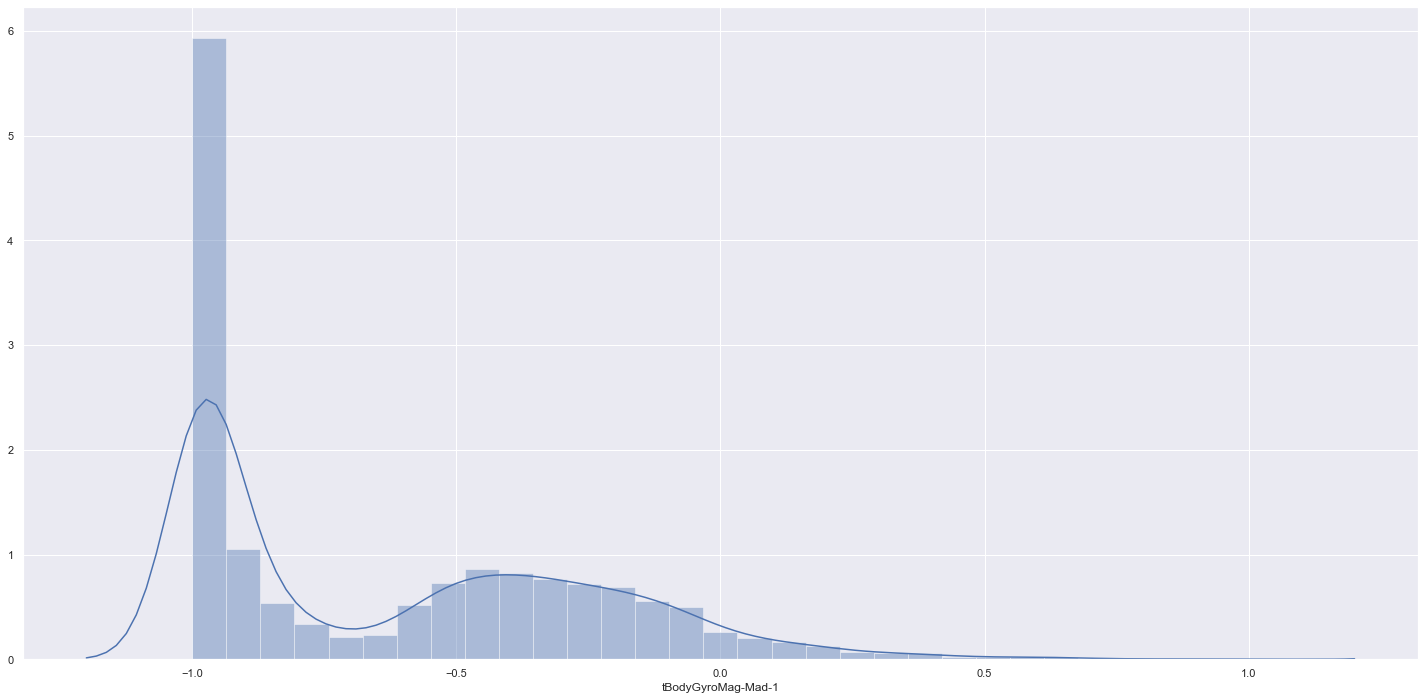

In [22]:
sns.distplot( df1['tBodyGyroMag-Mad-1'] )

#### 1.6.1.2 Categorical attributes

In [23]:
cat_attributes.describe()

position
count       7767
unique        12
top     STANDING
freq        1423

# 2.0 STEP 02 - FEAUTURE ENGINEERING

In [24]:
df2 = df1.copy()

# There aren't any feature engineering to do.

# 3.0 STEP 03 - VARIABLE FILTERING

In [25]:
df3 = df2.copy()

# There aren't any filtering to do.

# 4.0 STEP 04 - UNBALANCED CLASSES

In [26]:
df4 = df3.copy()

## 4.1. Oversampling and Undersampling

In [27]:
df42 = df4.drop( ['subject', 'position'], axis=1 ).values

# Oversampling ( SMOTE ) + Undersampling ( Tomek Links )
smt = c.SMOTETomek( sampling_strategy='auto', random_state=32 )

# apply
X_smt, y_smt = smt.fit_sample( df42, df4['position'] )

In [28]:
cols_num = df4.select_dtypes( include=['float64'] ).columns.tolist()

df43 = pd.DataFrame( X_smt, columns=cols_num )
df43['position'] = y_smt

## 4.2. Check Balanced Dataset

In [29]:
100*df43['position'].value_counts( normalize=True )

SIT_TO_STAND          8.341149
STAND_TO_LIE          8.341149
LIE_TO_STAND          8.341149
LIE_TO_SIT            8.341149
LAYING                8.341149
STAND_TO_SIT          8.341149
WALKING_UPSTAIRS      8.341149
SIT_TO_LIE            8.341149
WALKING               8.341149
WALKING_DOWNSTAIRS    8.341149
SITTING               8.294256
STANDING              8.294256
Name: position, dtype: float64

# 5.0 STEP 05 - EXPLORATORY DATA ANALYSIS ( EDA )

In [30]:
df51 = df4.copy()

## 5.1 Knowing more about the variable correlacions 

**H1.** Analyzing Static and Dynamic activities.

**H2.** Analyzing Static Activities and Postural Transitions.

**H3.** Analyzing Between Dynamic Activities.

**H4.** Analyzing Between Static Activities.

**H5.** Analyzing Between Postural Transitions.

**H6.** Analyzing Angles between XYZ axis.

### H1. Analyzing Static and Dynamic activities.
**Static -** SITTING, STADING and LAYING <br>
**Dynamic -** WALKNG, WALKING UPSTAIRS and WALKING DOWNSTAIRS

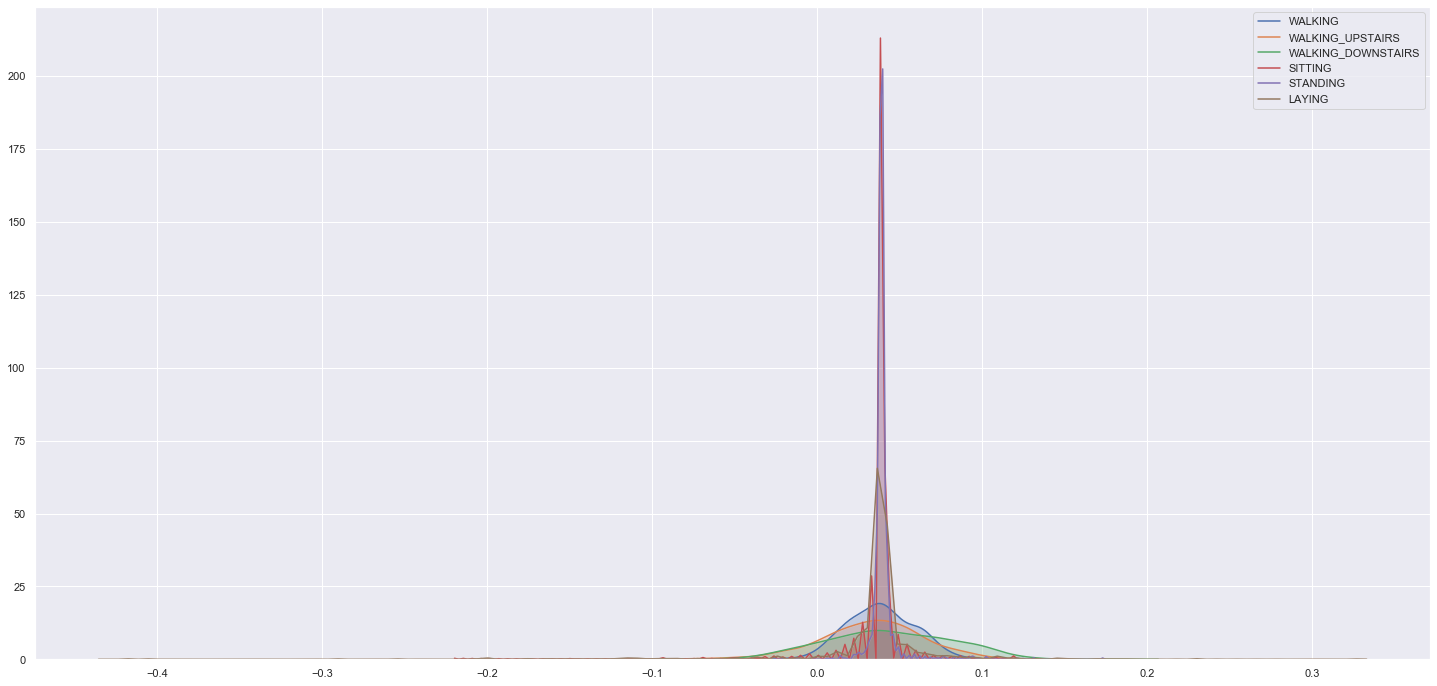

In [31]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyAcc-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyAcc-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'SITTING']['tBodyAcc-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tBodyAcc-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tBodyAcc-Mean-1'], label='LAYING', shade=True )

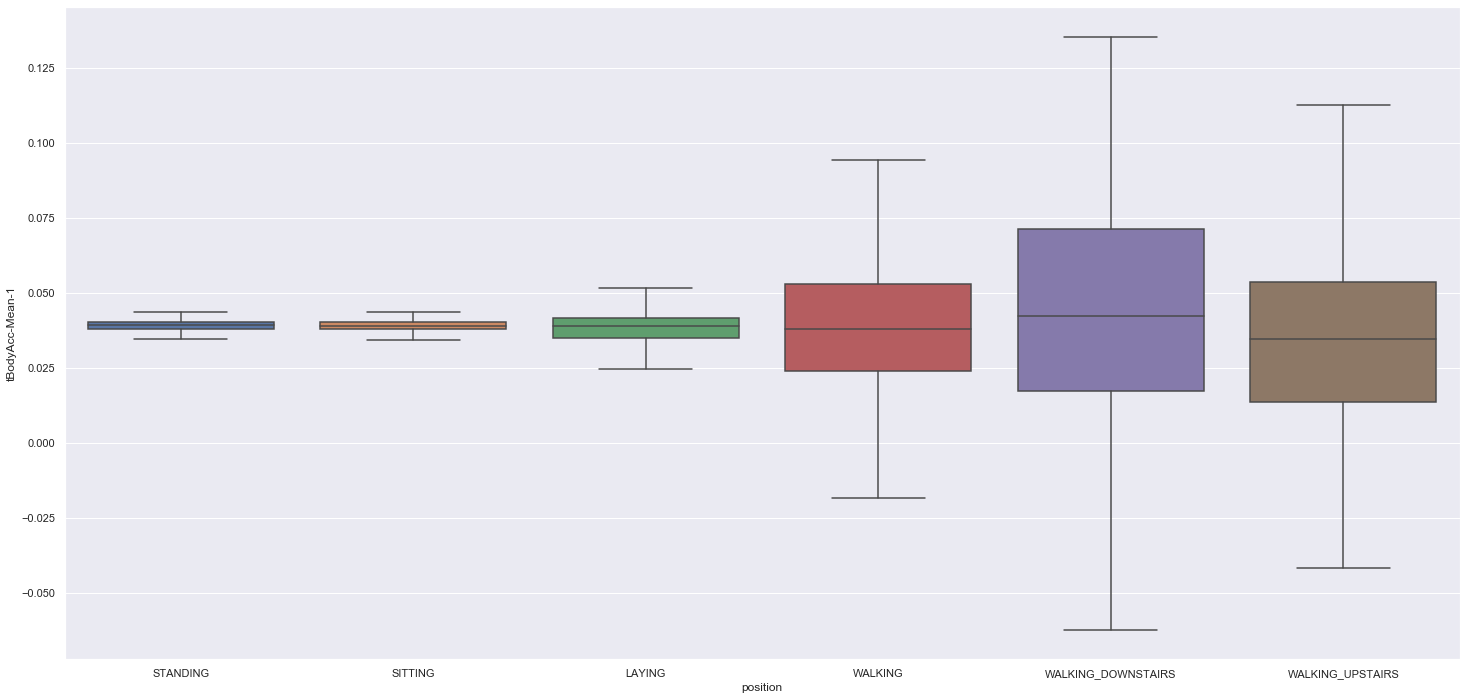

In [32]:
    sns.boxplot(x='position', y='tBodyAcc-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

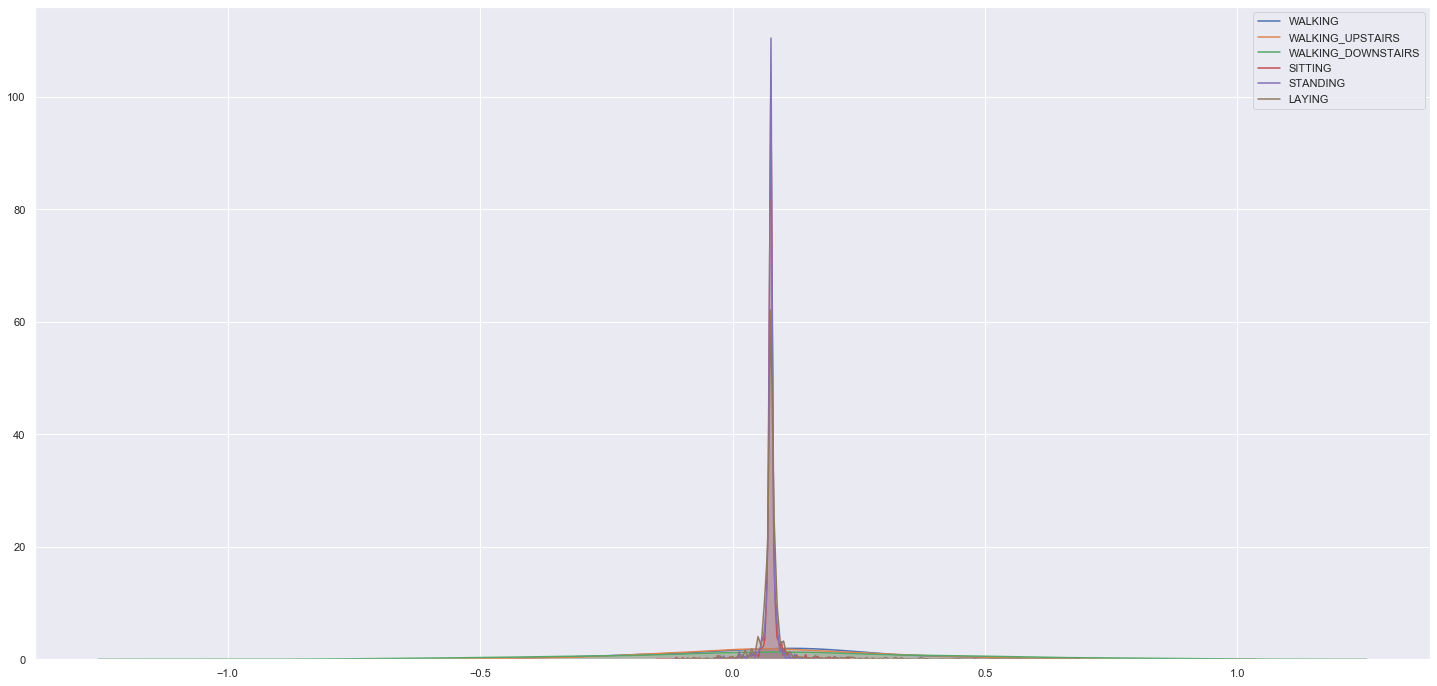

In [33]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyAccJerk-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyAccJerk-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAccJerk-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'SITTING']['tBodyAccJerk-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tBodyAccJerk-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tBodyAccJerk-Mean-1'], label='LAYING', shade=True )

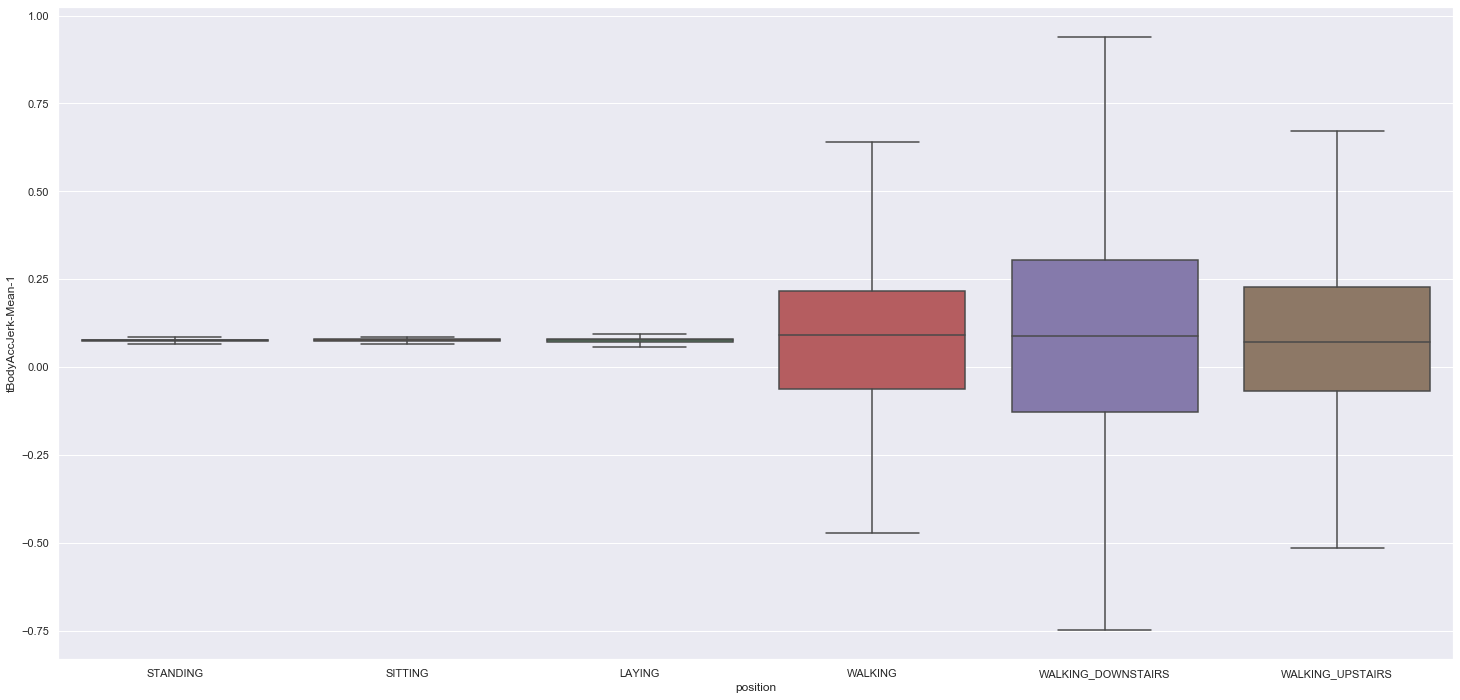

In [34]:
    sns.boxplot(x='position', y='tBodyAccJerk-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

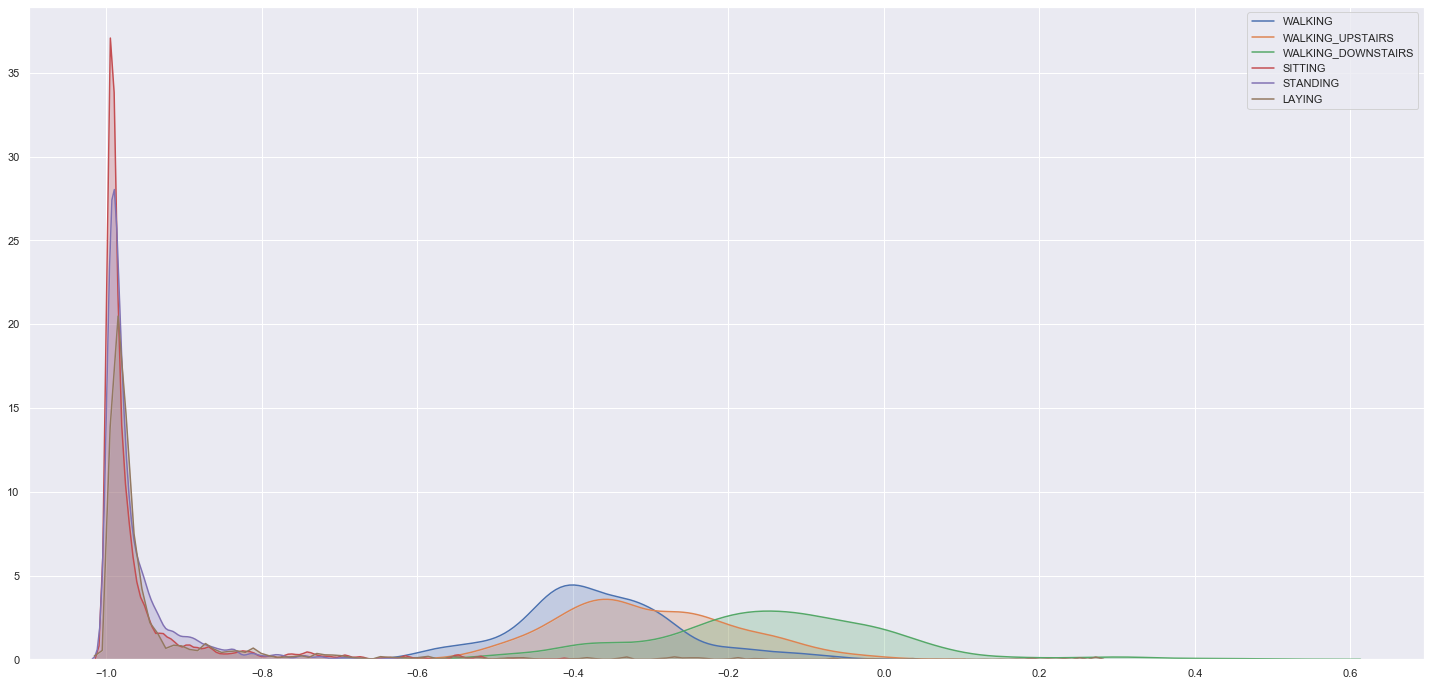

In [35]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyAccMag-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyAccMag-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAccMag-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'SITTING']['tBodyAccMag-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tBodyAccMag-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tBodyAccMag-Mean-1'], label='LAYING', shade=True )

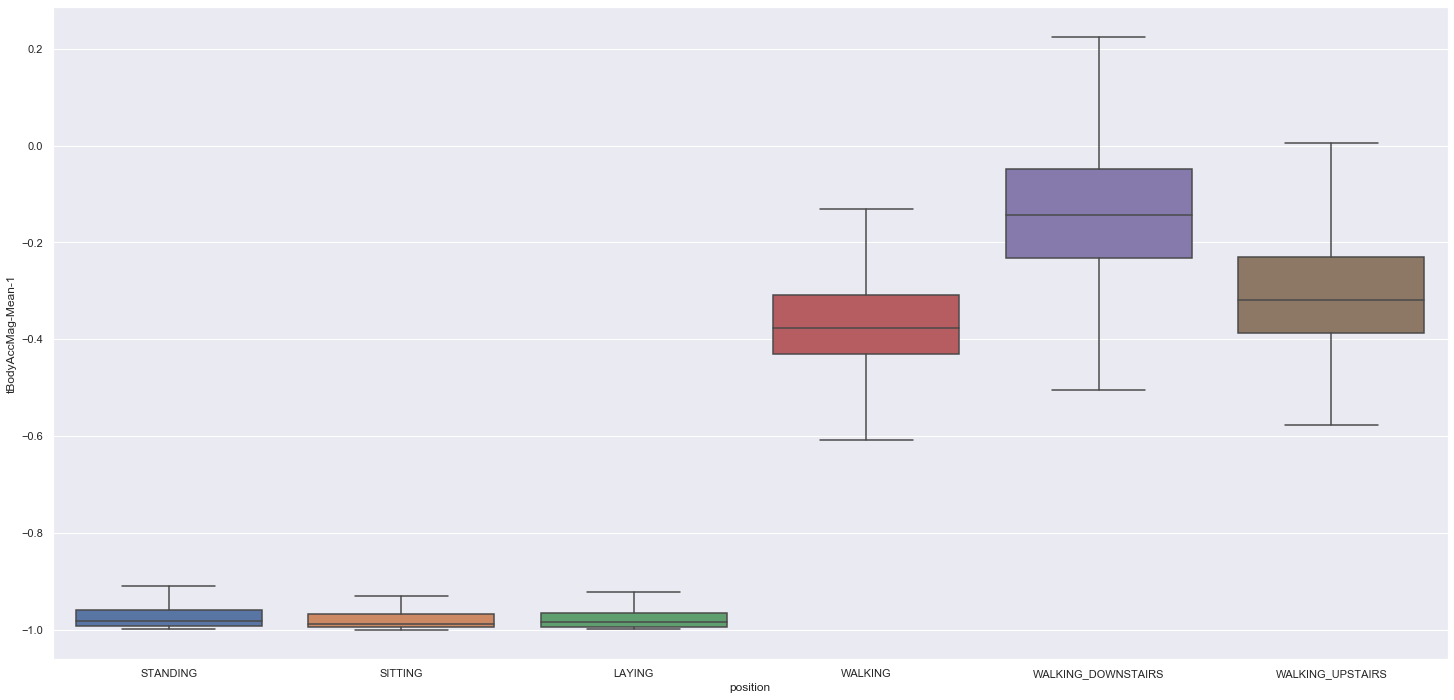

In [36]:
    sns.boxplot(x='position', y='tBodyAccMag-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

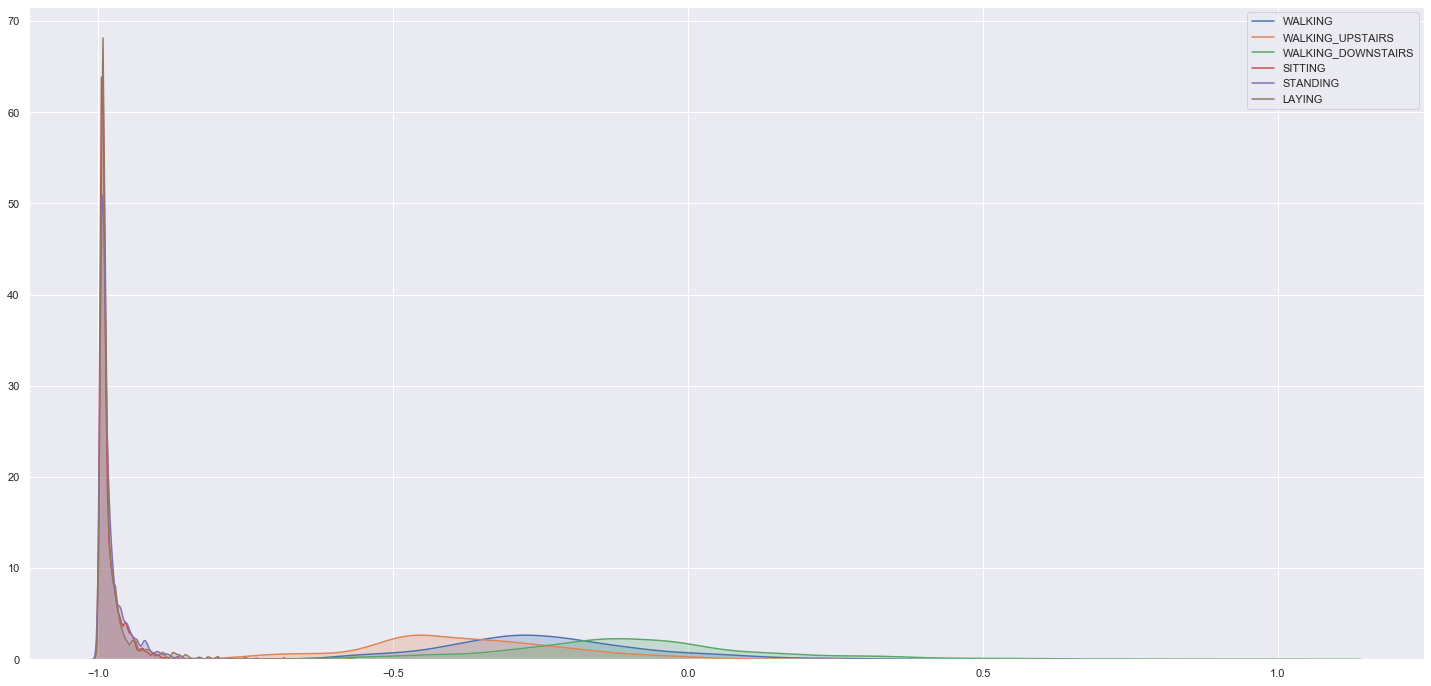

In [37]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyAccJerkMag-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyAccJerkMag-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAccJerkMag-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'SITTING']['tBodyAccJerkMag-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tBodyAccJerkMag-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tBodyAccJerkMag-Mean-1'], label='LAYING', shade=True )

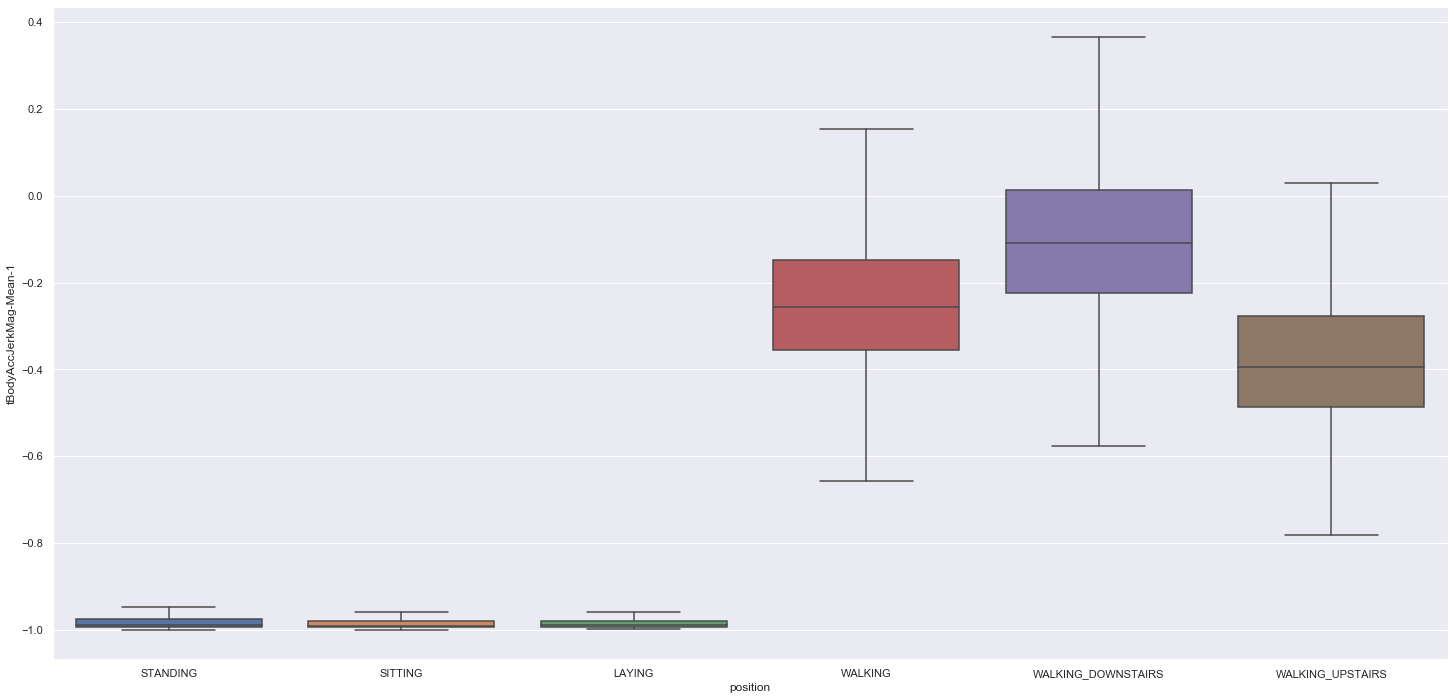

In [38]:
    sns.boxplot(x='position', y='tBodyAccJerkMag-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

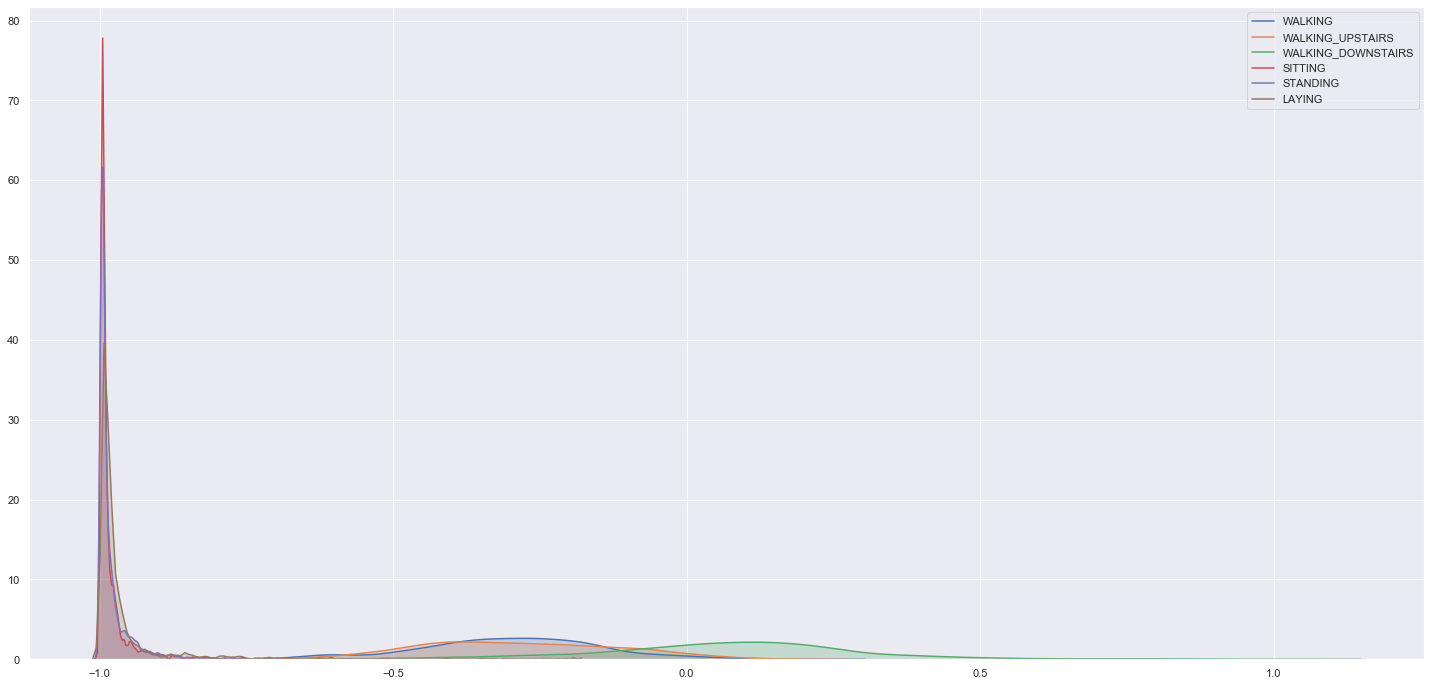

In [39]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['fBodyAcc-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['fBodyAcc-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['fBodyAcc-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'SITTING']['fBodyAcc-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['fBodyAcc-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['fBodyAcc-Mean-1'], label='LAYING', shade=True )

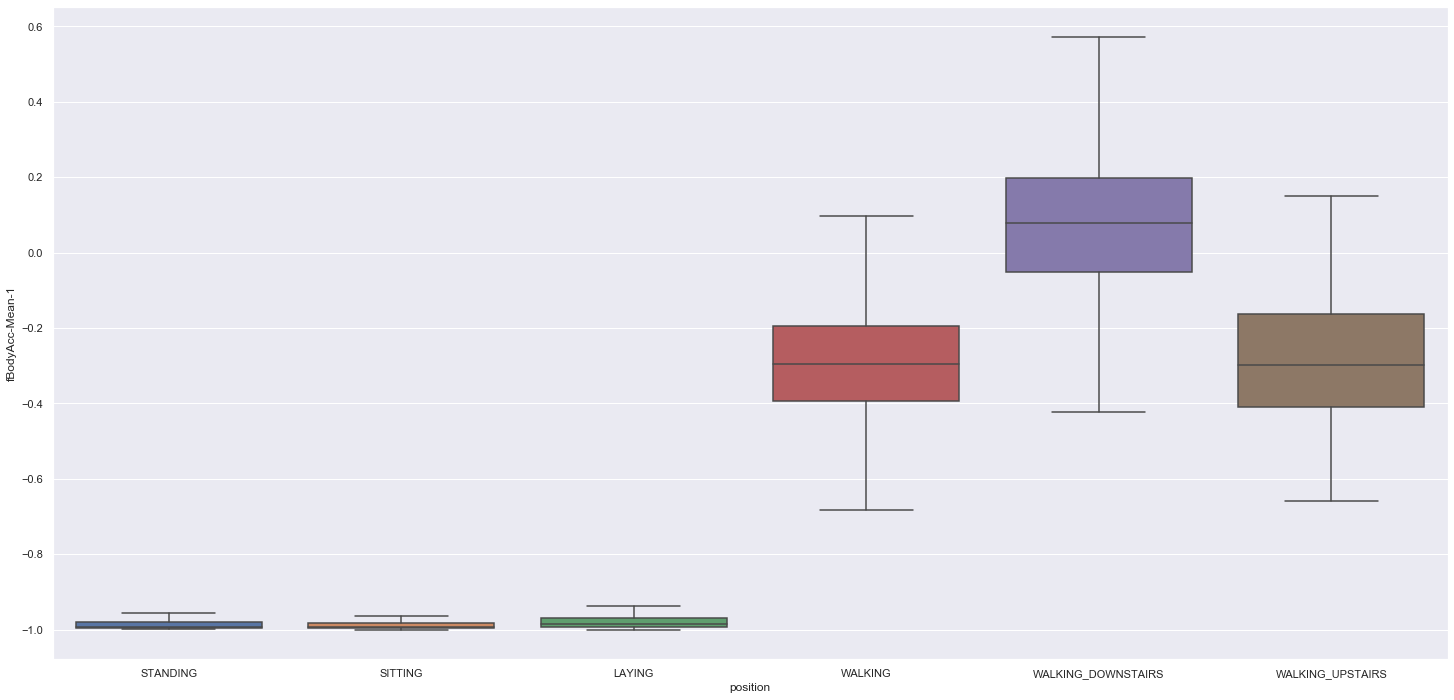

In [40]:
    sns.boxplot(x='position', y='fBodyAcc-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

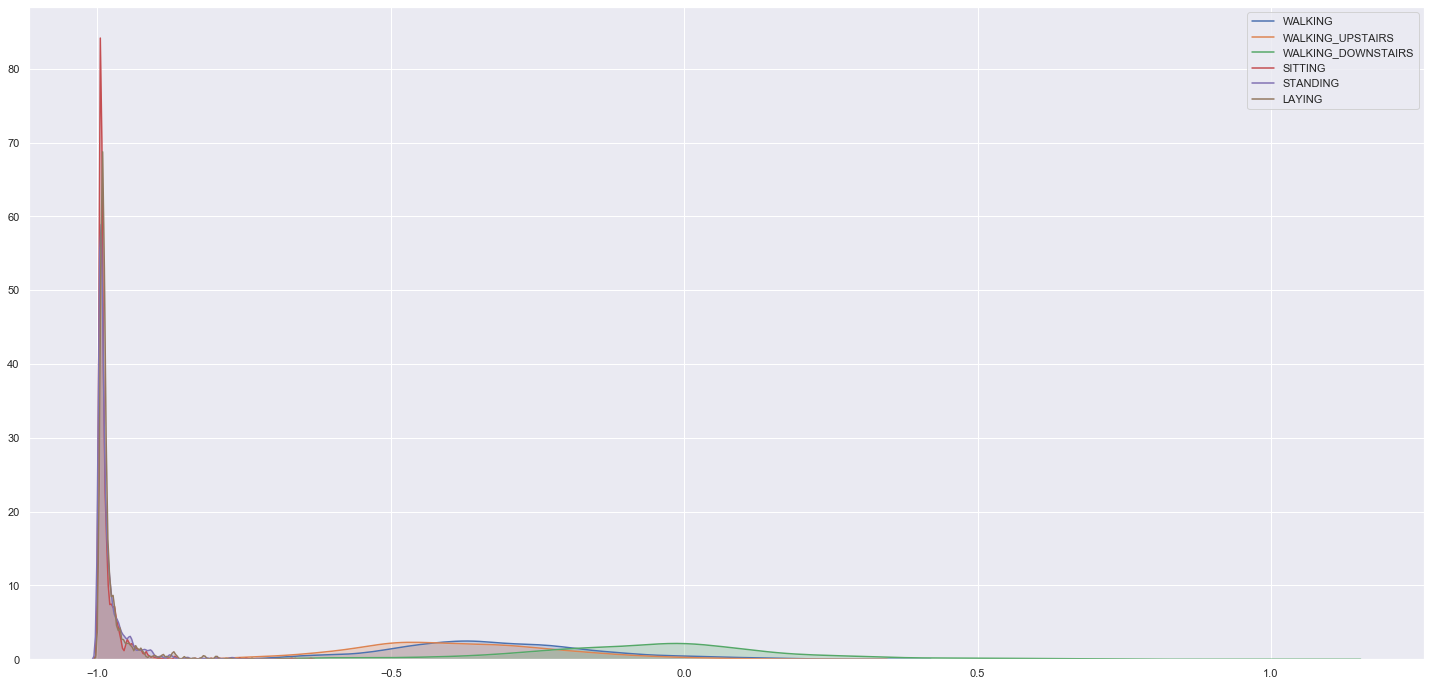

In [41]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['fBodyAccJerk-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['fBodyAccJerk-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['fBodyAccJerk-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'SITTING']['fBodyAccJerk-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['fBodyAccJerk-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['fBodyAccJerk-Mean-1'], label='LAYING', shade=True )

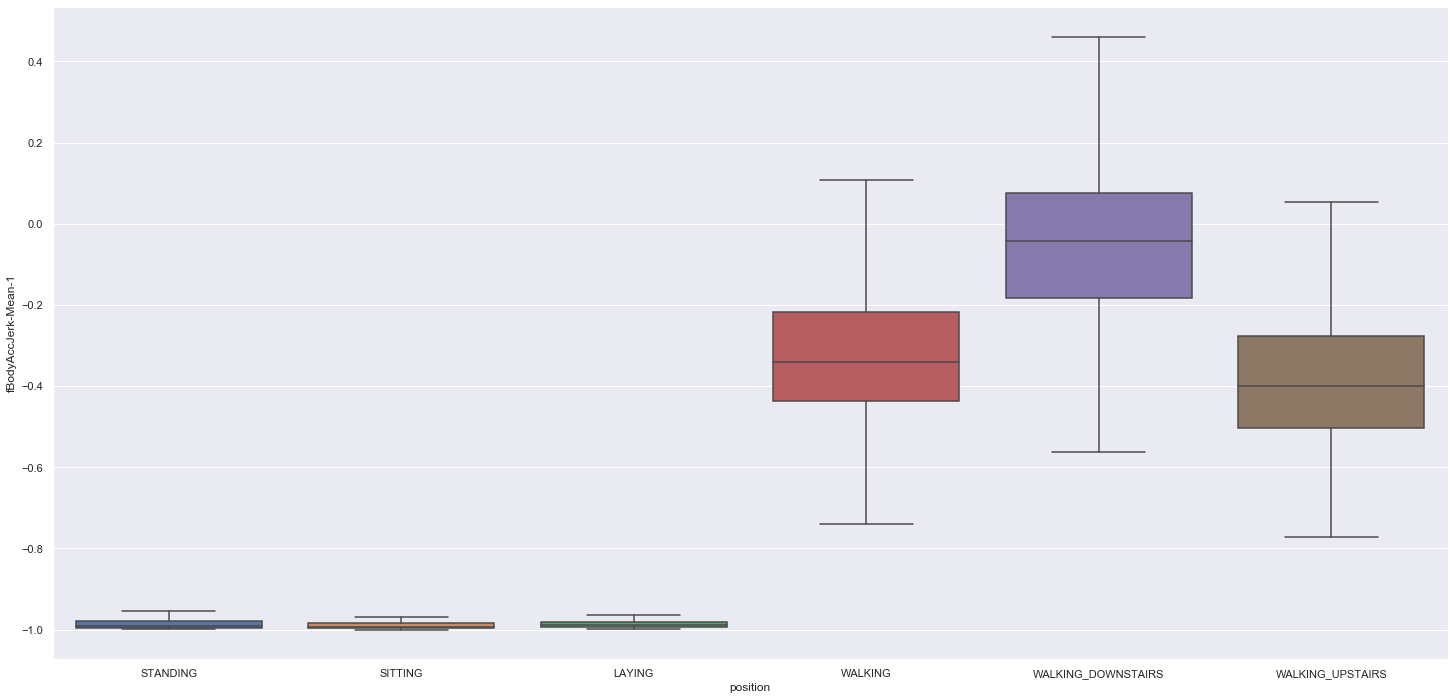

In [42]:
    sns.boxplot(x='position', y='fBodyAccJerk-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

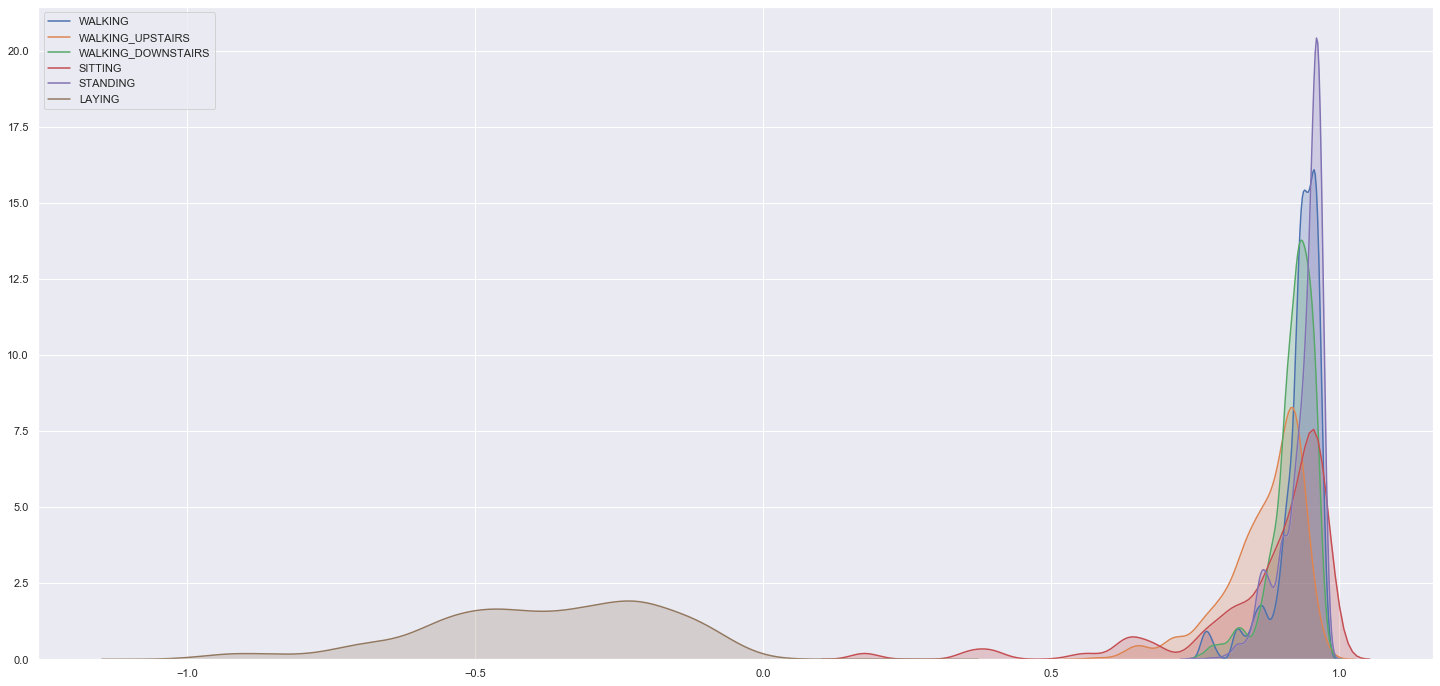

In [43]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tGravityAcc-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tGravityAcc-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tGravityAcc-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'SITTING']['tGravityAcc-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tGravityAcc-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tGravityAcc-Mean-1'], label='LAYING', shade=True )

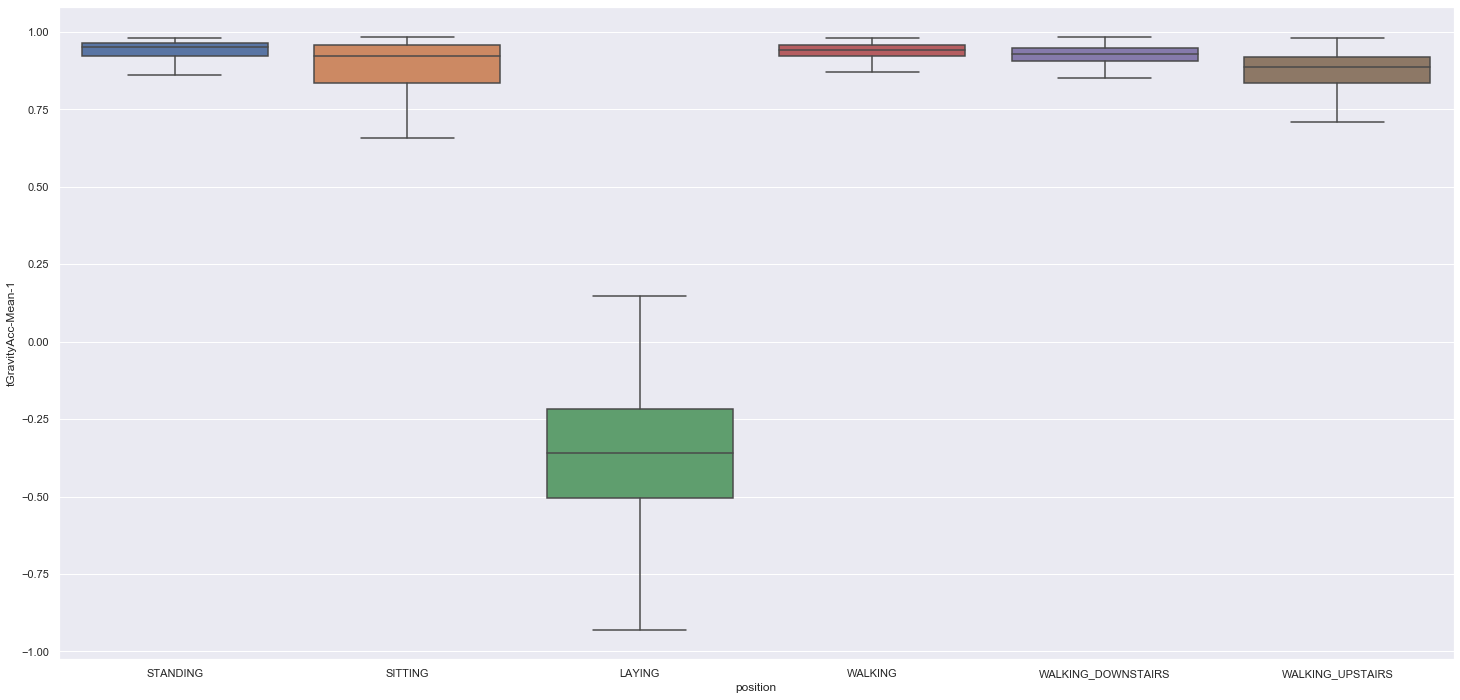

In [44]:
    sns.boxplot(x='position', y='tGravityAcc-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

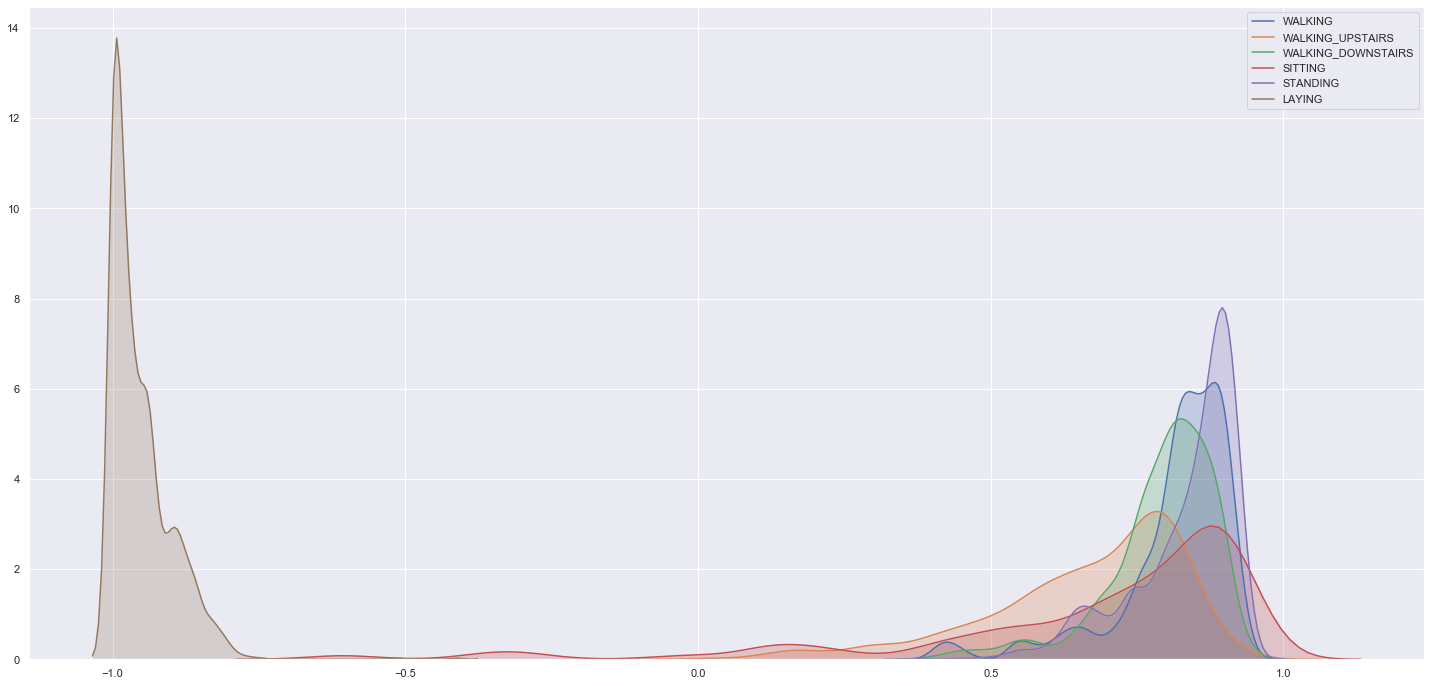

In [45]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tGravityAcc-Energy-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tGravityAcc-Energy-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tGravityAcc-Energy-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'SITTING']['tGravityAcc-Energy-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tGravityAcc-Energy-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tGravityAcc-Energy-1'], label='LAYING', shade=True )

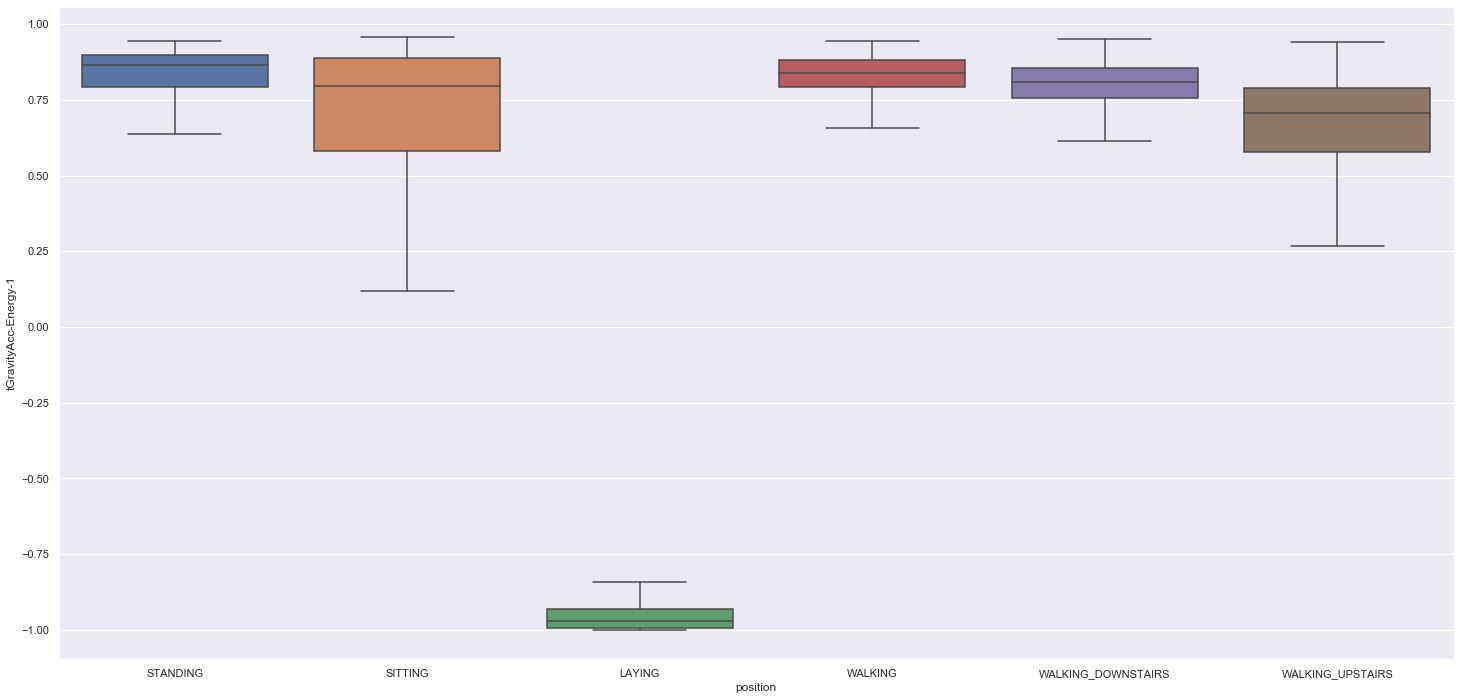

In [46]:
    sns.boxplot(x='position', y='tGravityAcc-Energy-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

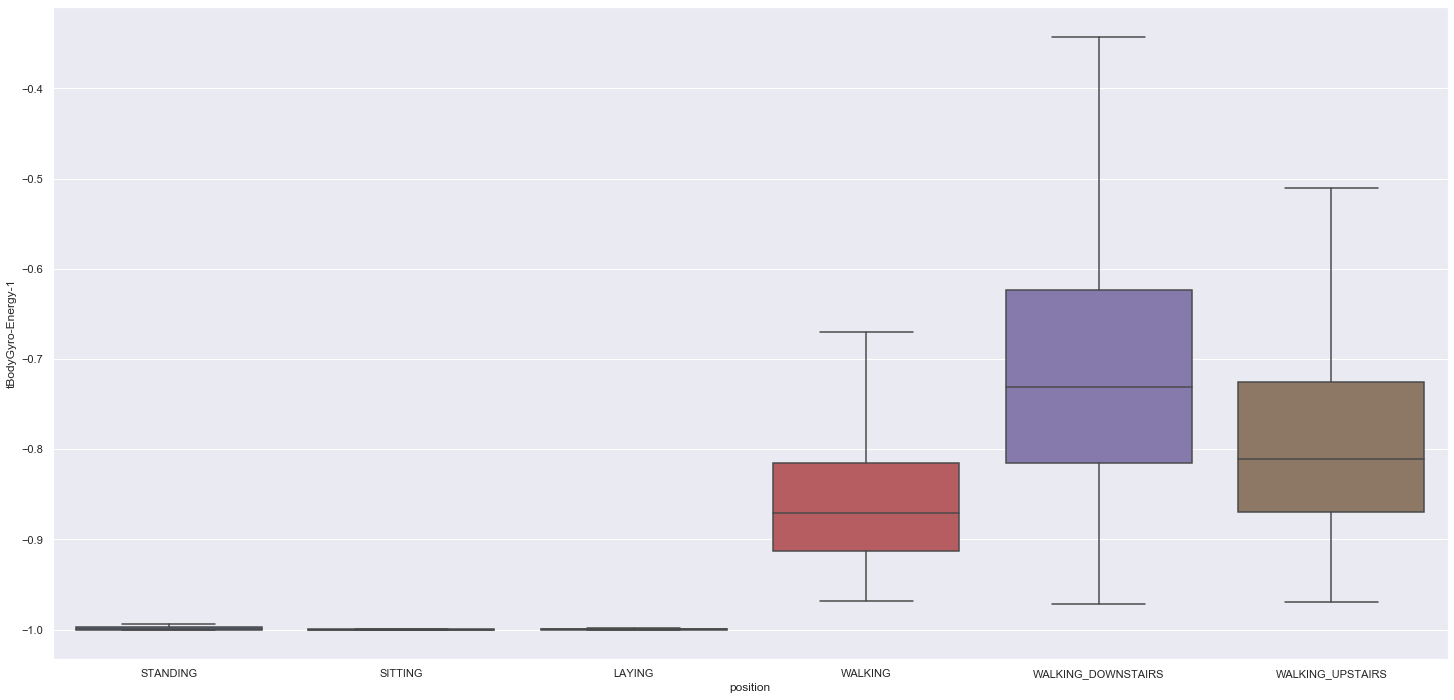

In [47]:
    sns.boxplot(x='position', y='tBodyGyro-Energy-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

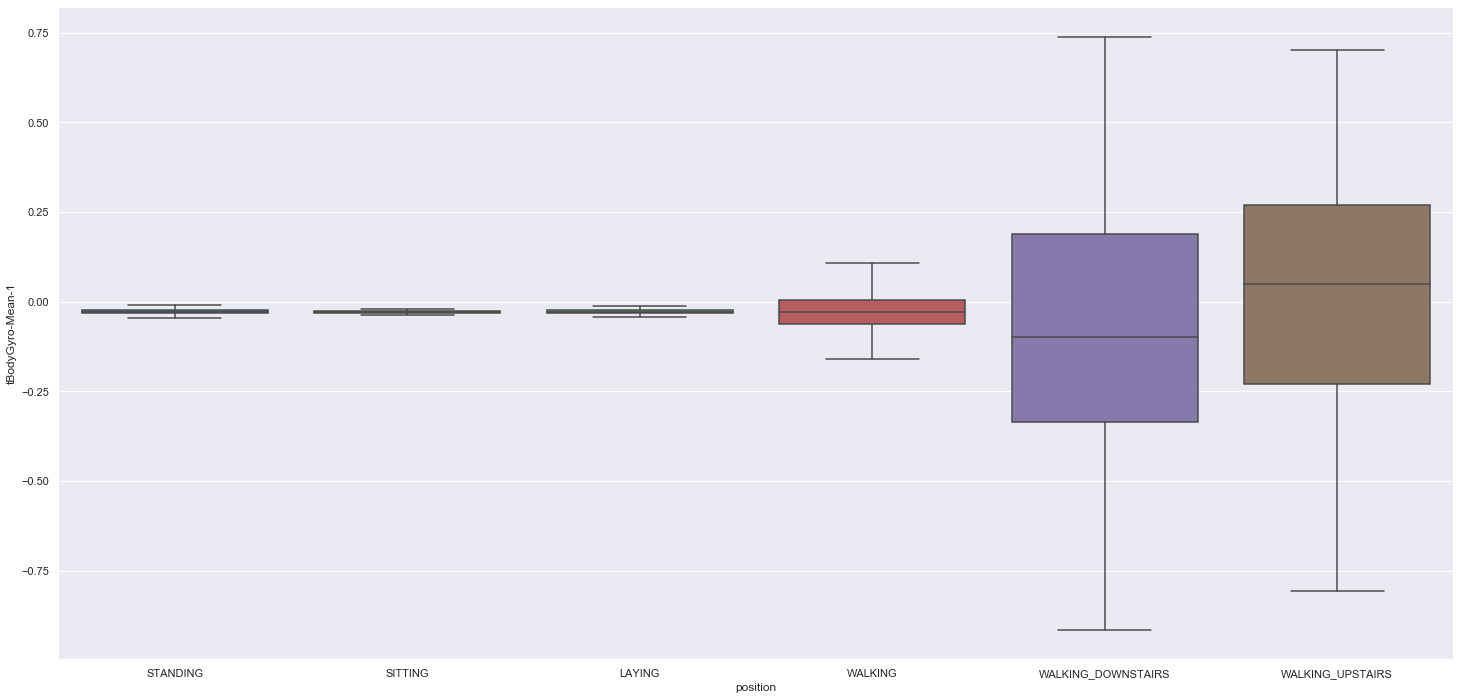

In [48]:
    sns.boxplot(x='position', y='tBodyGyro-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

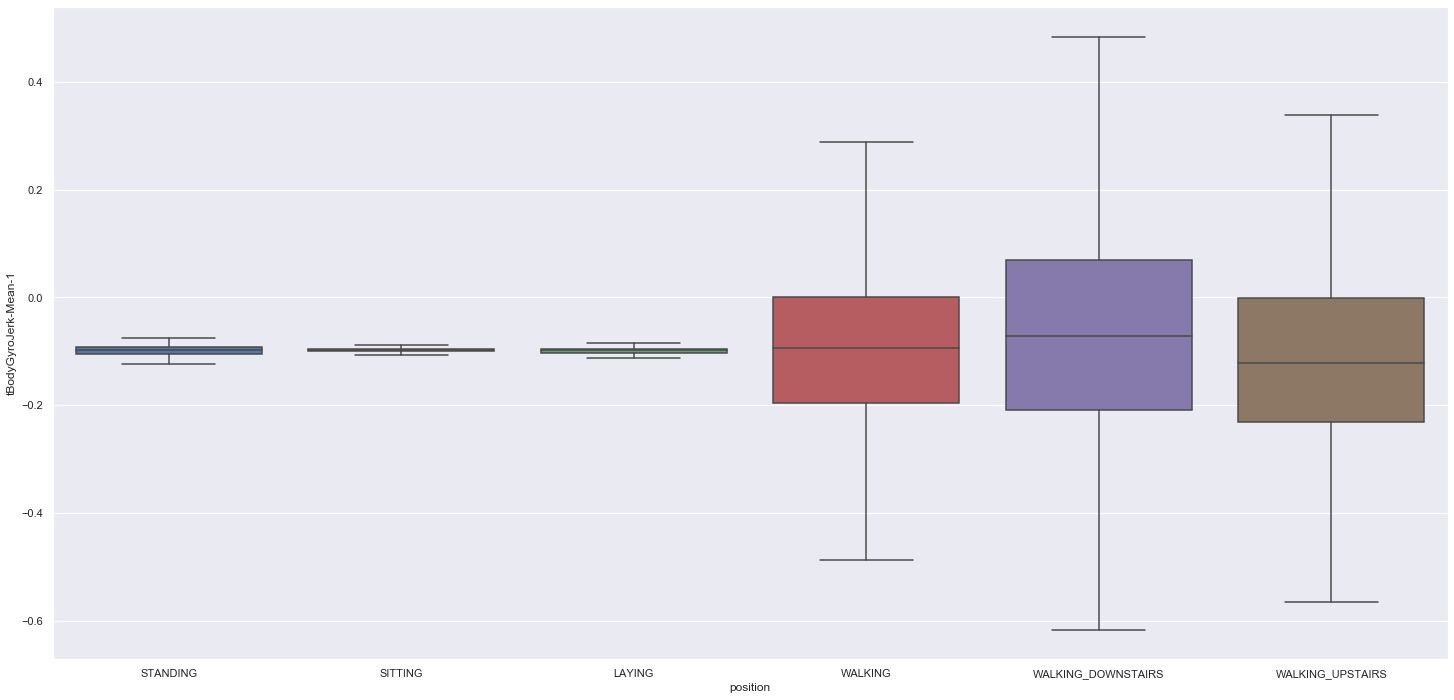

In [49]:
    sns.boxplot(x='position', y='tBodyGyroJerk-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

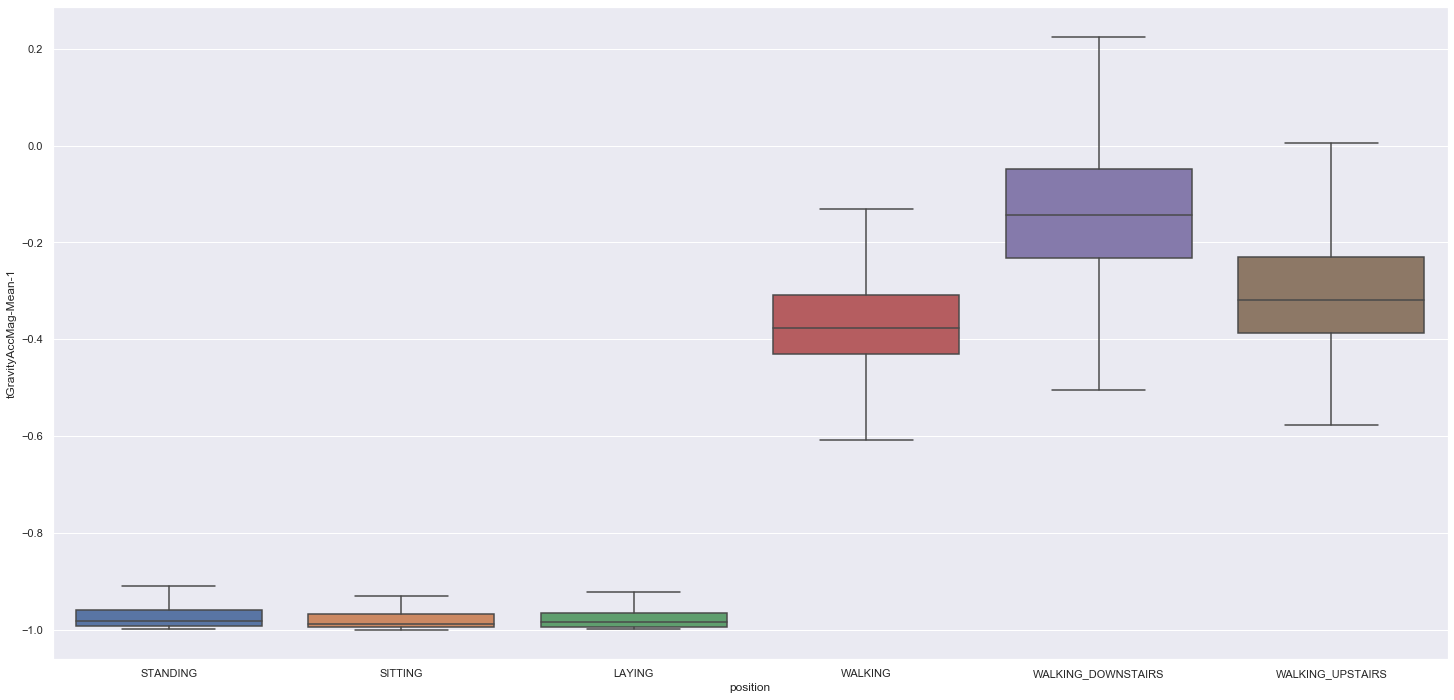

In [50]:
    sns.boxplot(x='position', y='tGravityAccMag-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

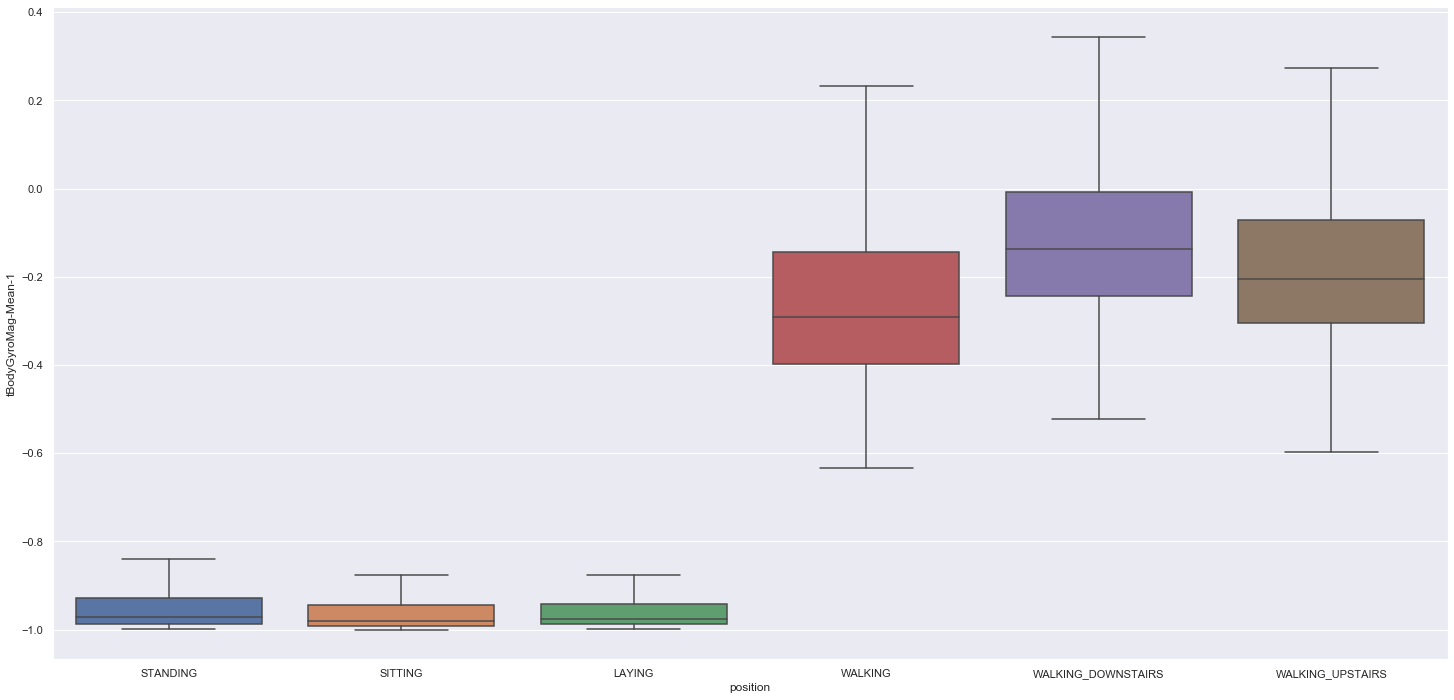

In [51]:
    sns.boxplot(x='position', y='tBodyGyroMag-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

### H2. Analyzing Static Activities and Postural Transitions.
**Static -** SITTING, STADING and LAYING <br>
**Transition -** STAND TO SIT, SIT TO STAND, SIT TO LIE, LIE TO SIT, STAND TO LIE and LIE TO STAND

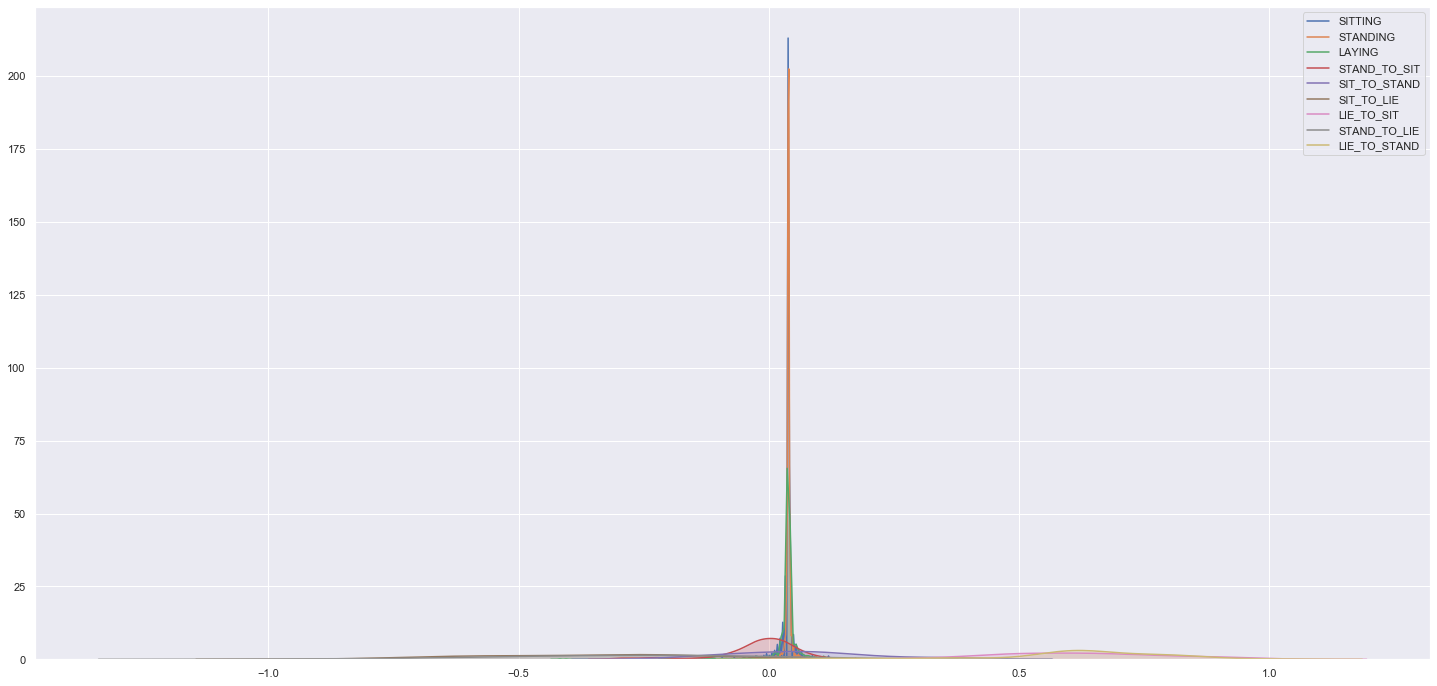

In [52]:
sns.kdeplot( df51[df51['position'] == 'SITTING']['tBodyAcc-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tBodyAcc-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tBodyAcc-Mean-1'], label='LAYING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_SIT']['tBodyAcc-Mean-1'], label='STAND_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_STAND']['tBodyAcc-Mean-1'], label='SIT_TO_STAND', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_LIE']['tBodyAcc-Mean-1'], label='SIT_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_SIT']['tBodyAcc-Mean-1'], label='LIE_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_LIE']['tBodyAcc-Mean-1'], label='STAND_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_STAND']['tBodyAcc-Mean-1'], label='LIE_TO_STAND', shade=True  )

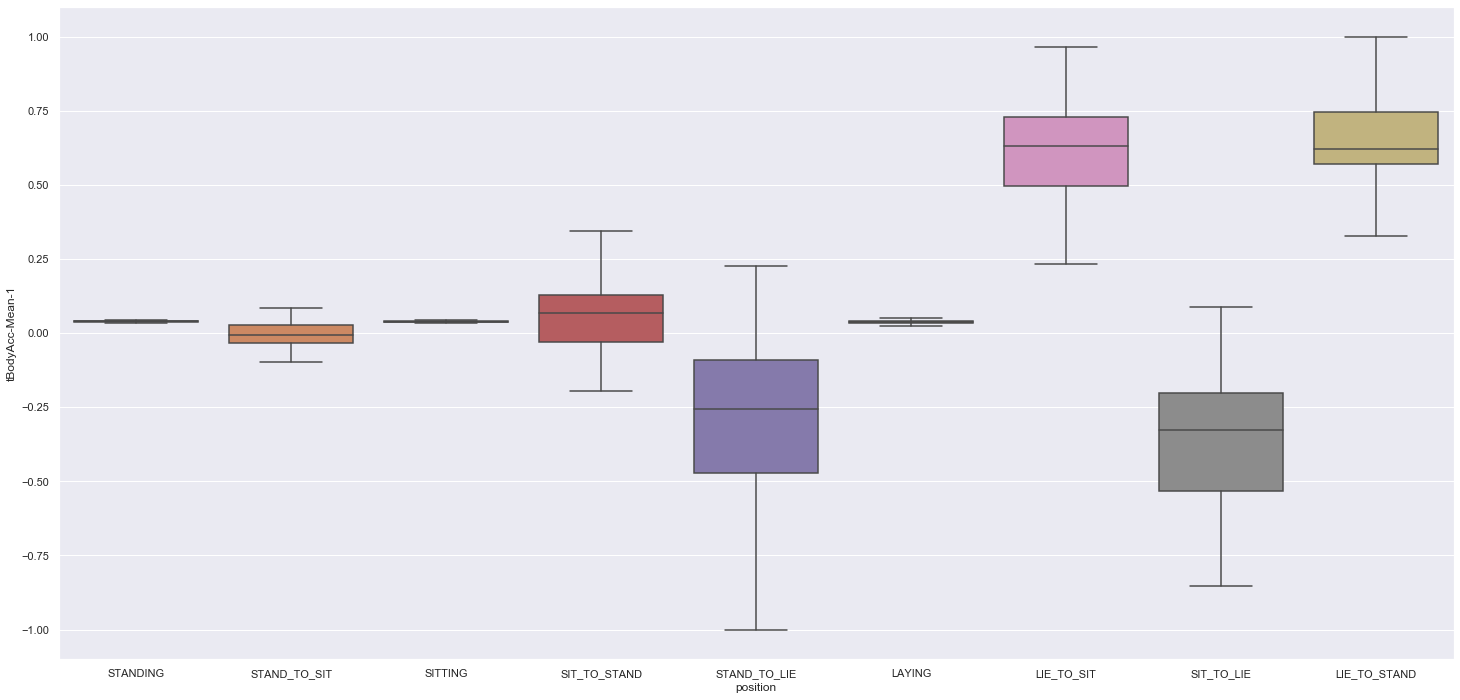

In [53]:
    sns.boxplot(x='position', y='tBodyAcc-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

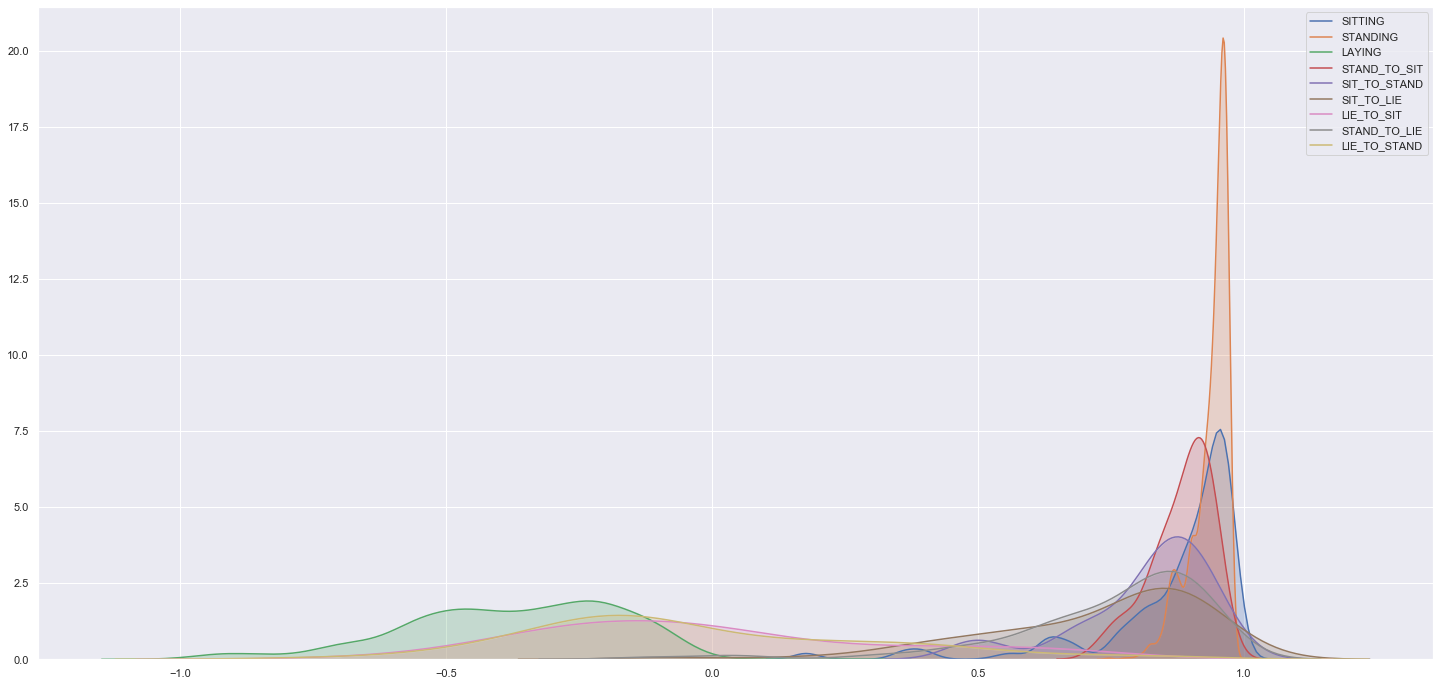

In [54]:
sns.kdeplot( df51[df51['position'] == 'SITTING']['tGravityAcc-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tGravityAcc-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tGravityAcc-Mean-1'], label='LAYING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_SIT']['tGravityAcc-Mean-1'], label='STAND_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_STAND']['tGravityAcc-Mean-1'], label='SIT_TO_STAND', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_LIE']['tGravityAcc-Mean-1'], label='SIT_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_SIT']['tGravityAcc-Mean-1'], label='LIE_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_LIE']['tGravityAcc-Mean-1'], label='STAND_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_STAND']['tGravityAcc-Mean-1'], label='LIE_TO_STAND', shade=True  )

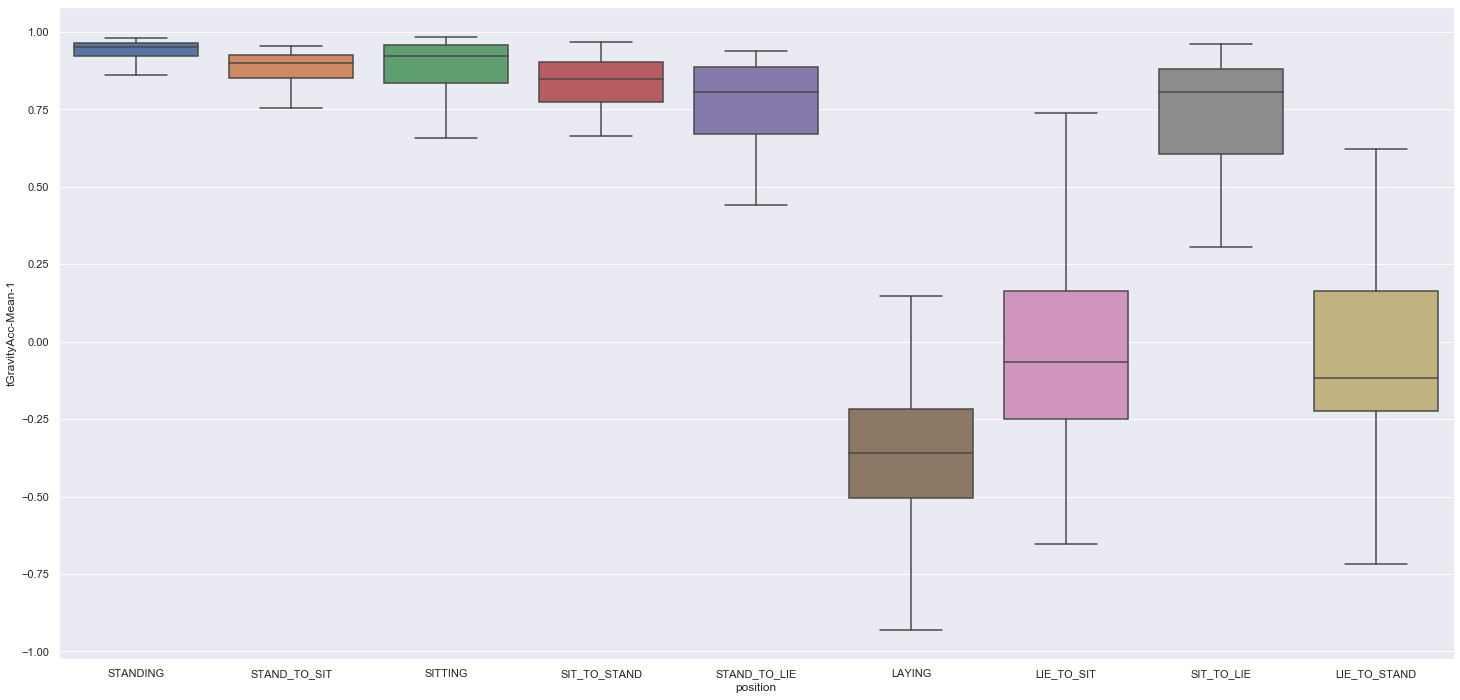

In [55]:
    sns.boxplot(x='position', y='tGravityAcc-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

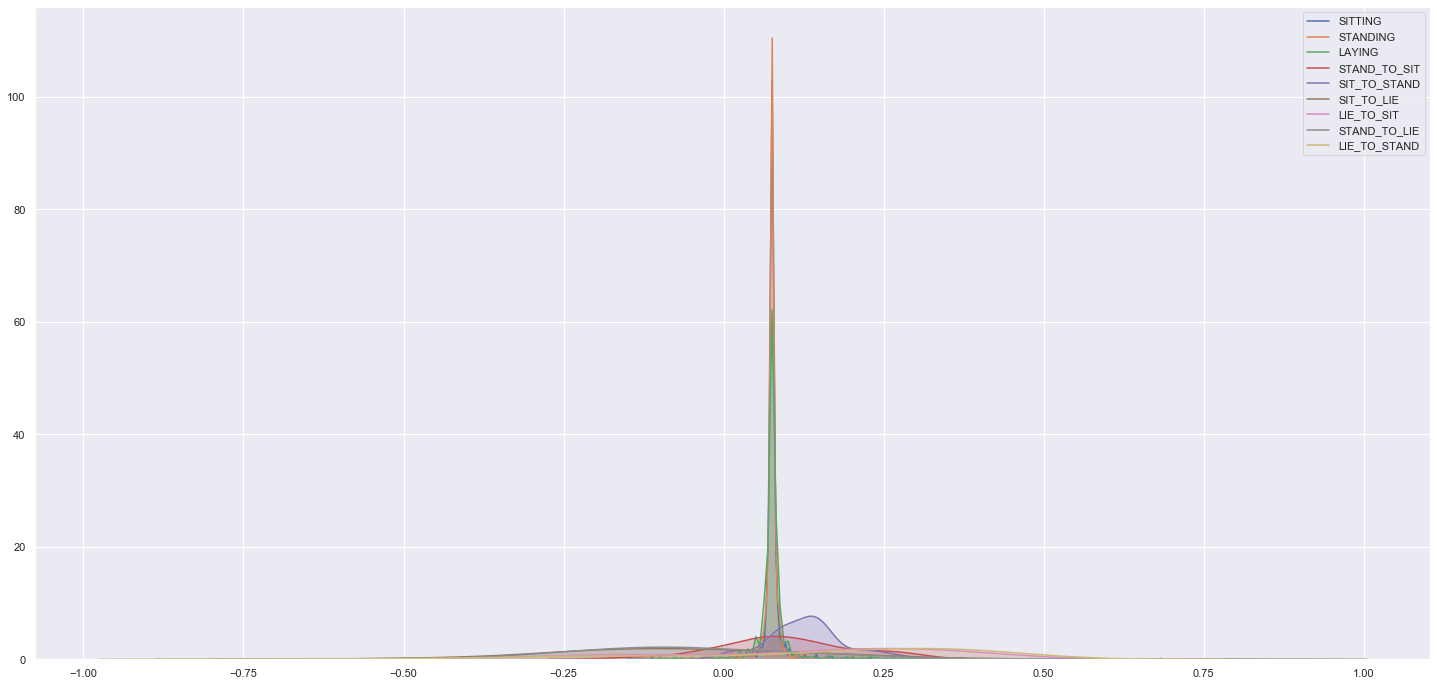

In [56]:
sns.kdeplot( df51[df51['position'] == 'SITTING']['tBodyAccJerk-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tBodyAccJerk-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tBodyAccJerk-Mean-1'], label='LAYING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_SIT']['tBodyAccJerk-Mean-1'], label='STAND_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_STAND']['tBodyAccJerk-Mean-1'], label='SIT_TO_STAND', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_LIE']['tBodyAccJerk-Mean-1'], label='SIT_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_SIT']['tBodyAccJerk-Mean-1'], label='LIE_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_LIE']['tBodyAccJerk-Mean-1'], label='STAND_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_STAND']['tBodyAccJerk-Mean-1'], label='LIE_TO_STAND', shade=True  )

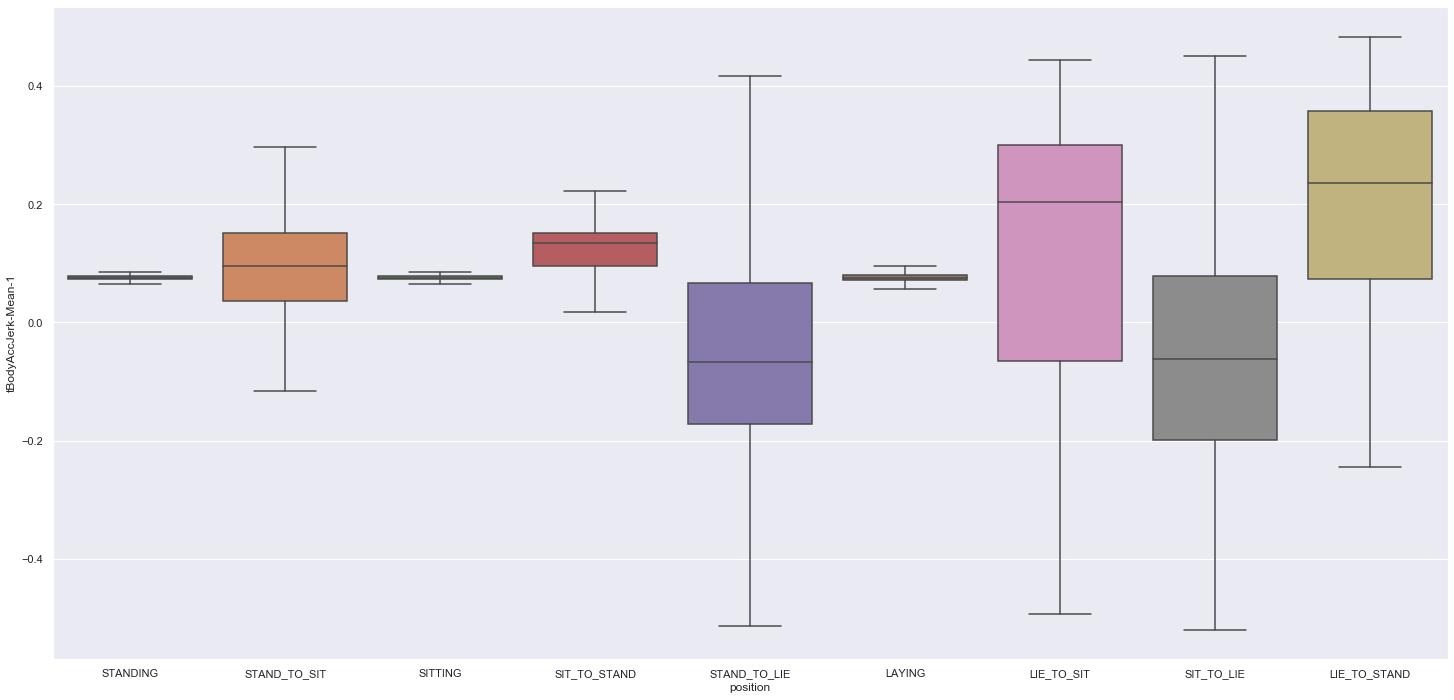

In [57]:
    sns.boxplot(x='position', y='tBodyAccJerk-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

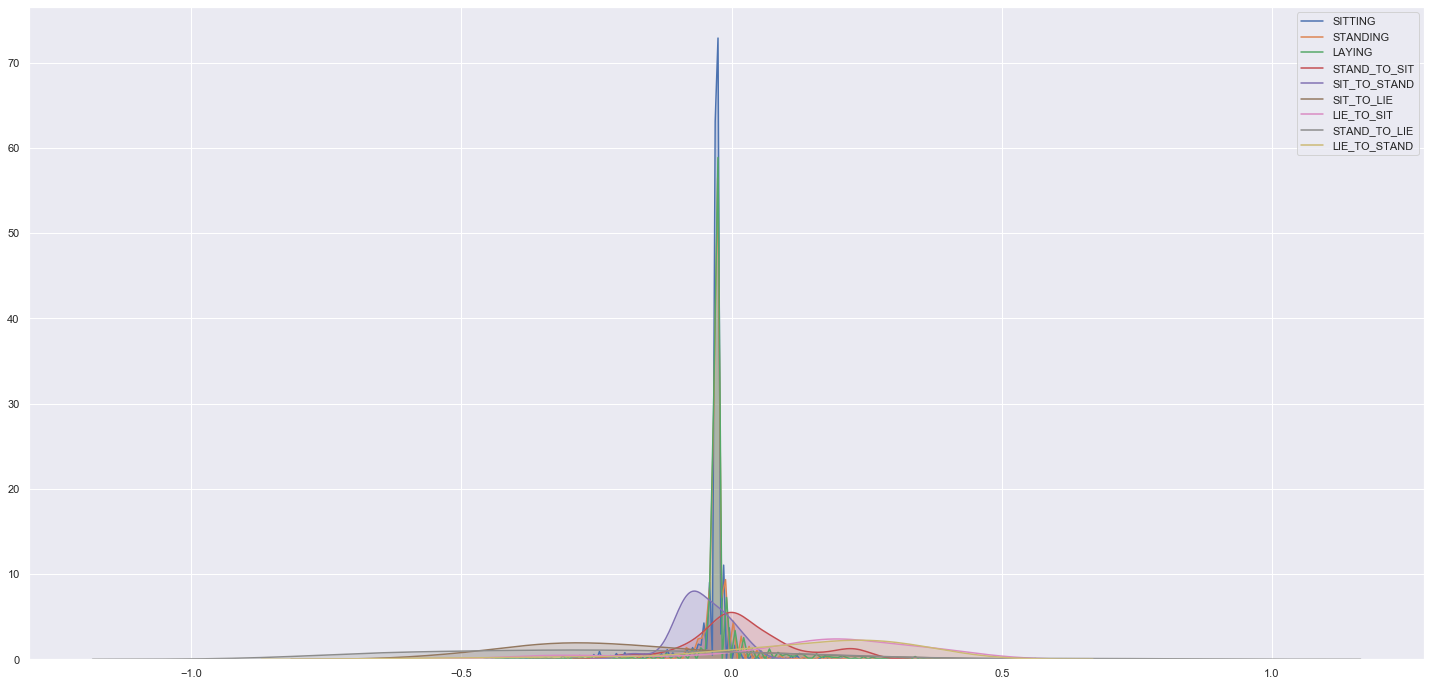

In [58]:
sns.kdeplot( df51[df51['position'] == 'SITTING']['tBodyGyro-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tBodyGyro-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tBodyGyro-Mean-1'], label='LAYING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_SIT']['tBodyGyro-Mean-1'], label='STAND_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_STAND']['tBodyGyro-Mean-1'], label='SIT_TO_STAND', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_LIE']['tBodyGyro-Mean-1'], label='SIT_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_SIT']['tBodyGyro-Mean-1'], label='LIE_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_LIE']['tBodyGyro-Mean-1'], label='STAND_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_STAND']['tBodyGyro-Mean-1'], label='LIE_TO_STAND', shade=True  )

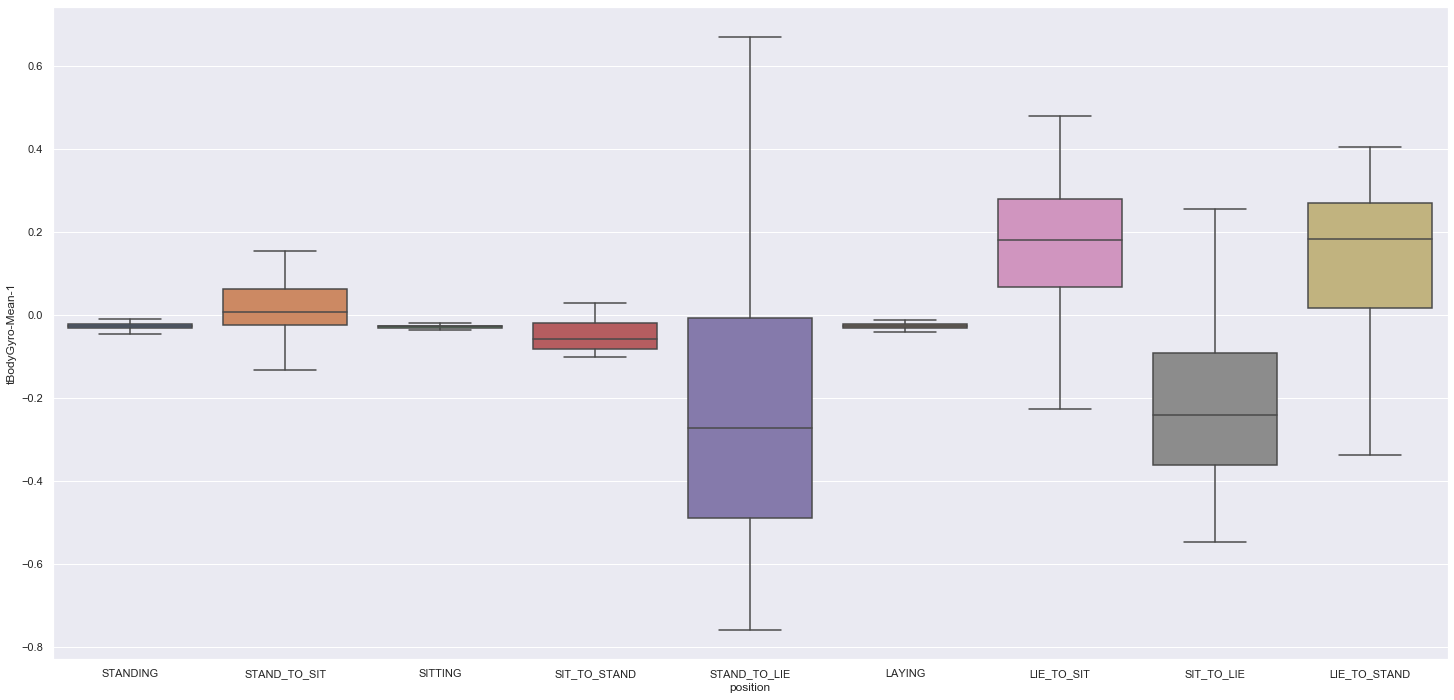

In [59]:
    sns.boxplot(x='position', y='tBodyGyro-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

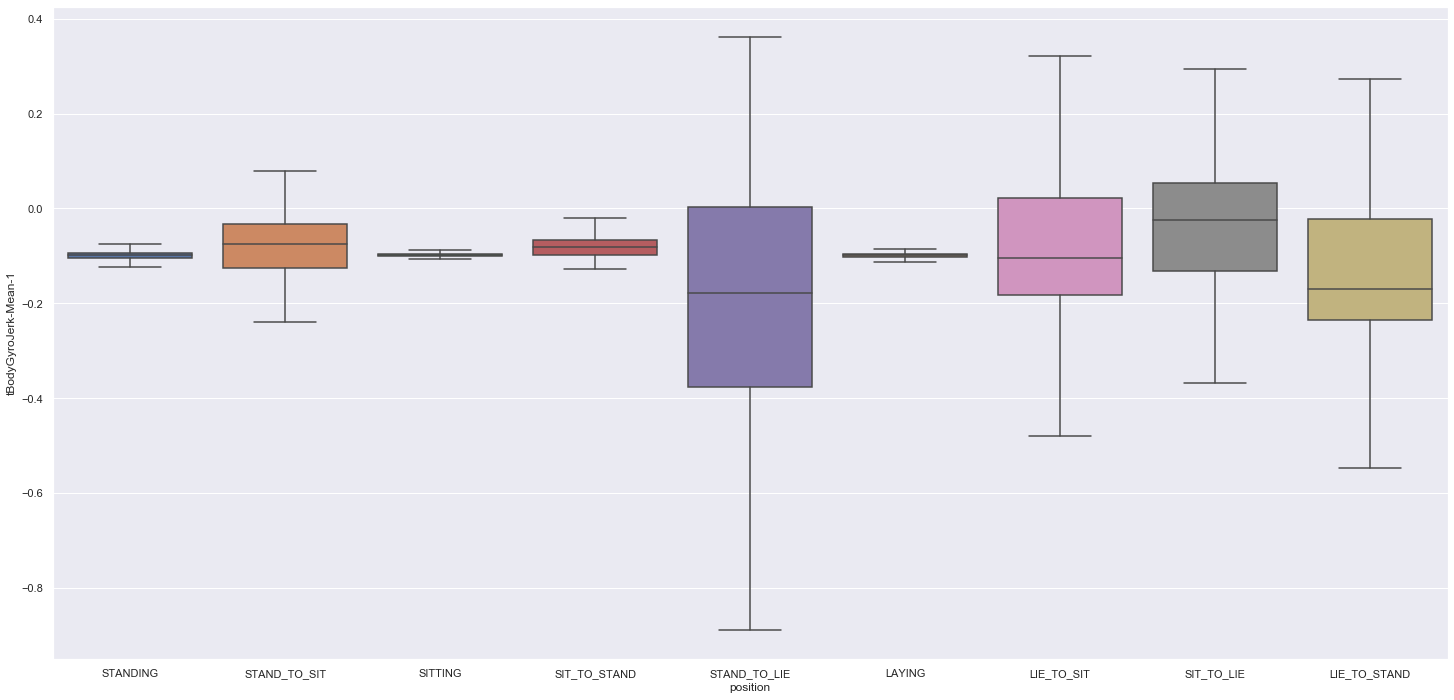

In [60]:
    sns.boxplot(x='position', y='tBodyGyroJerk-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

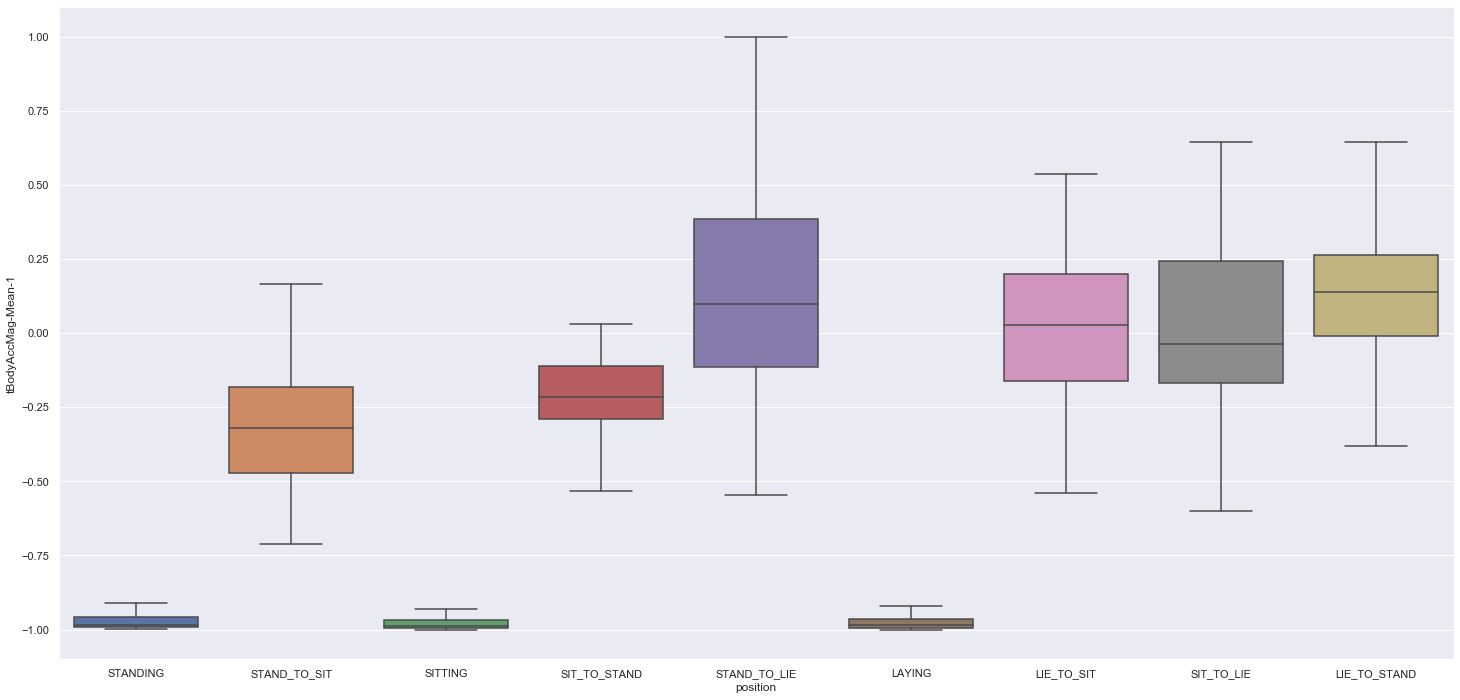

In [61]:
    sns.boxplot(x='position', y='tBodyAccMag-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

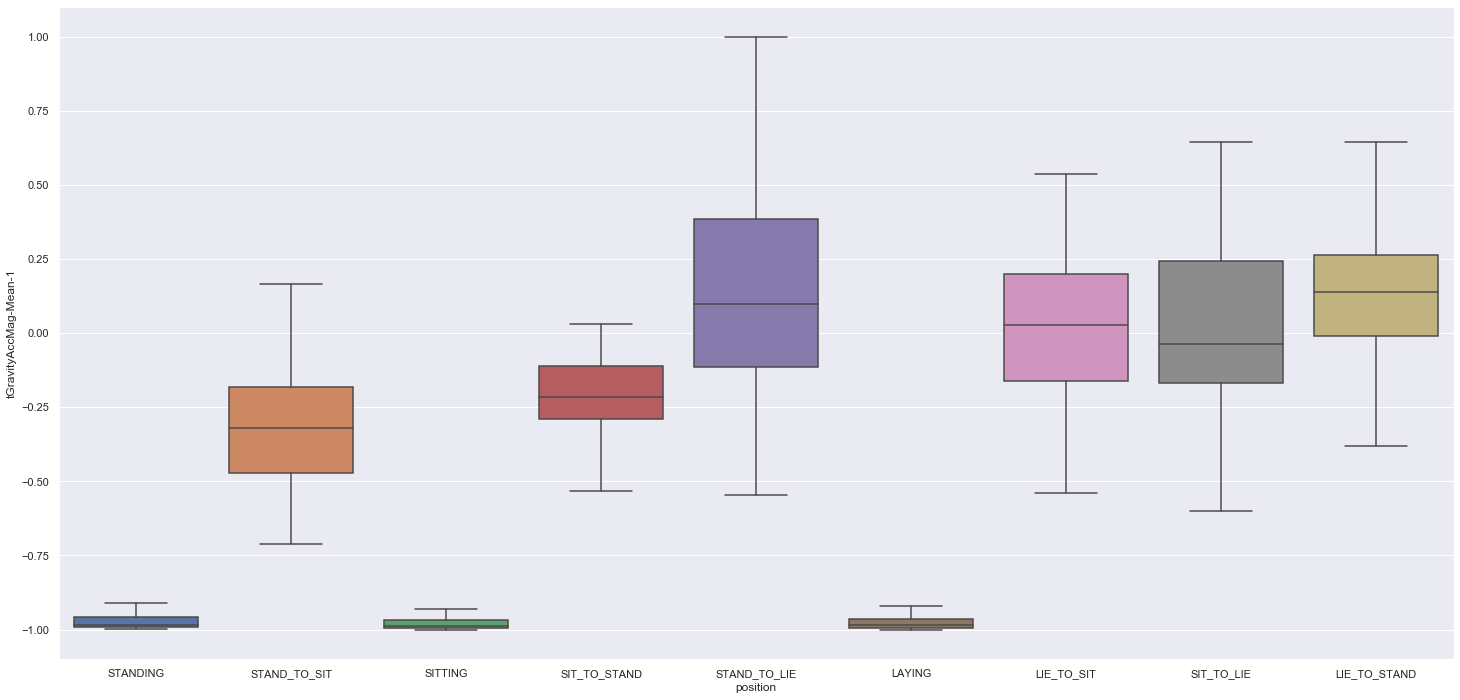

In [62]:
    sns.boxplot(x='position', y='tGravityAccMag-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

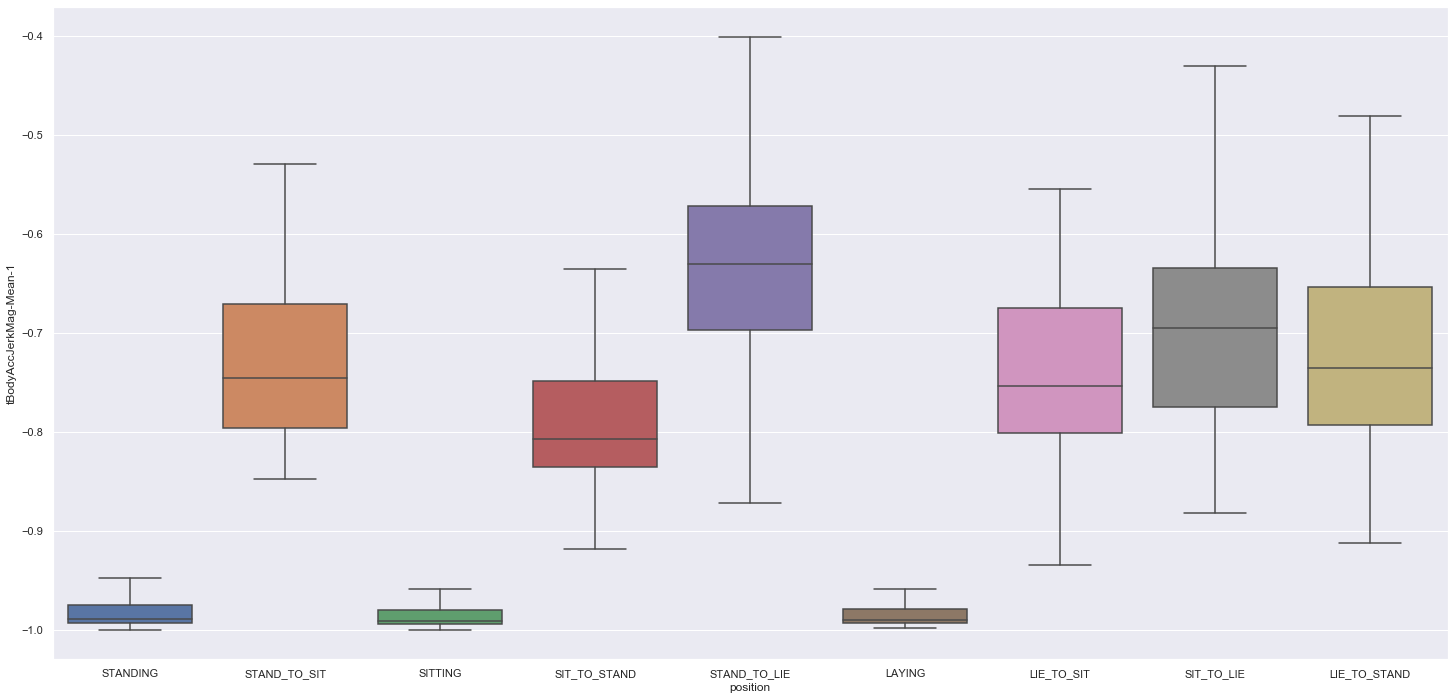

In [63]:
    sns.boxplot(x='position', y='tBodyAccJerkMag-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

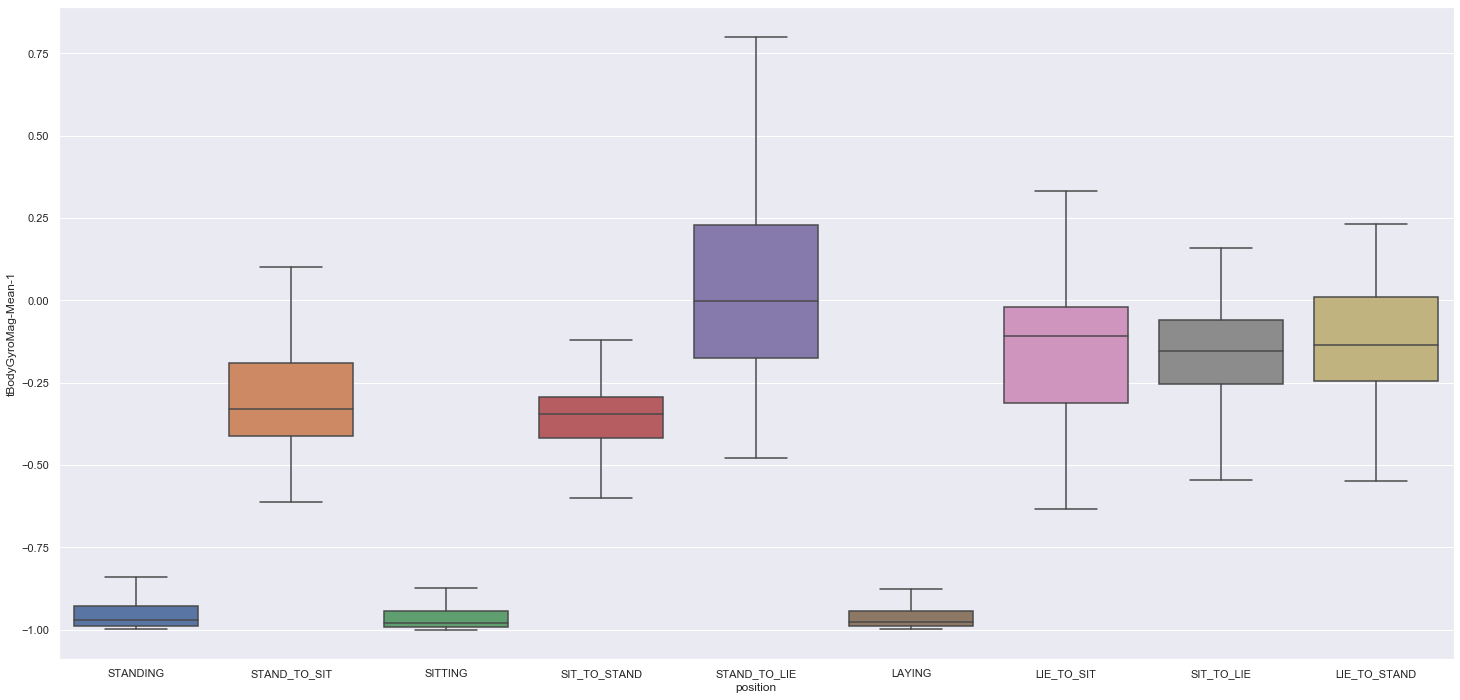

In [64]:
    sns.boxplot(x='position', y='tBodyGyroMag-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

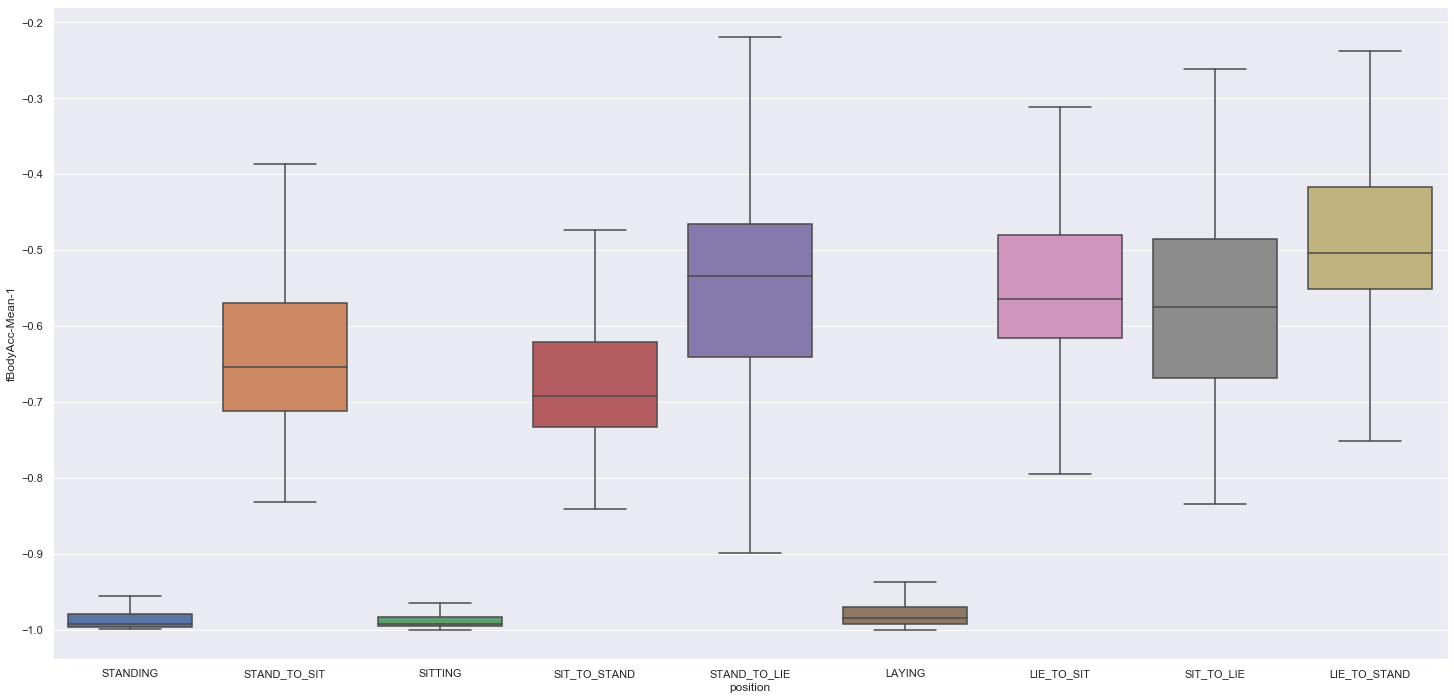

In [65]:
    sns.boxplot(x='position', y='fBodyAcc-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

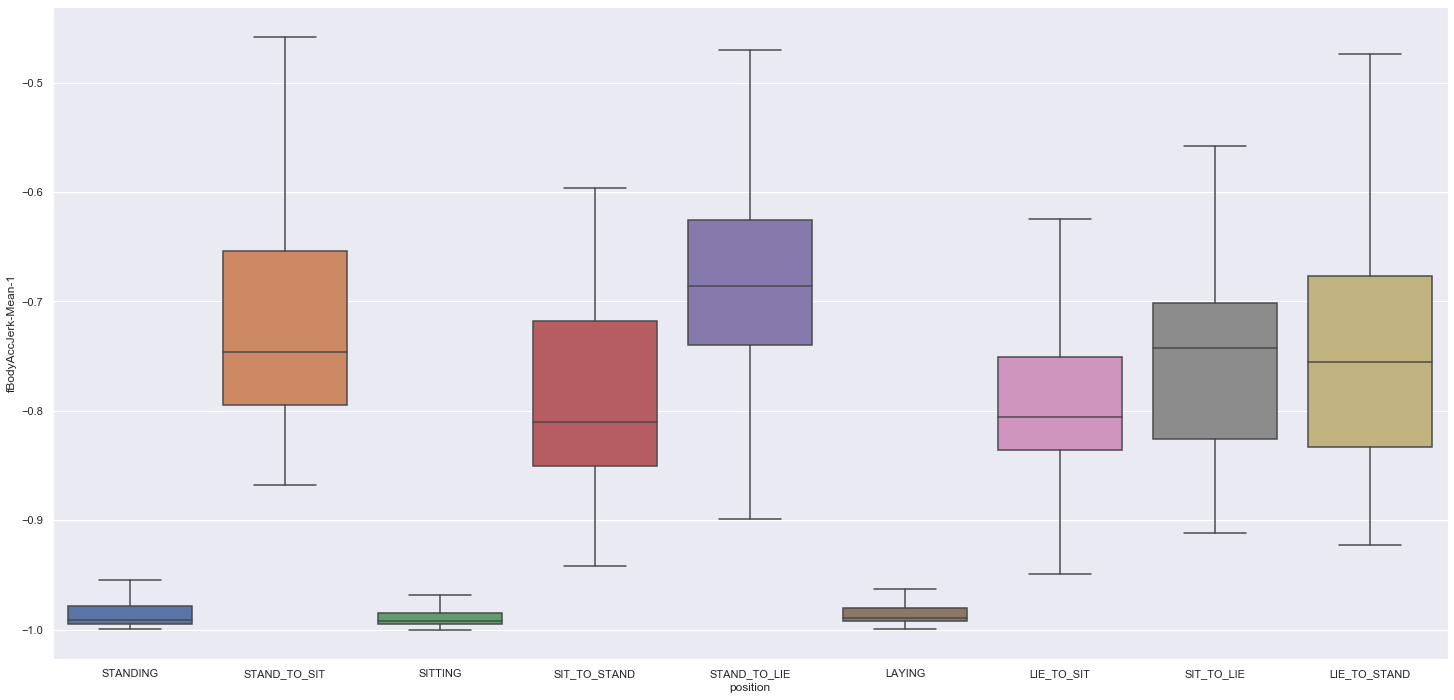

In [66]:
    sns.boxplot(x='position', y='fBodyAccJerk-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

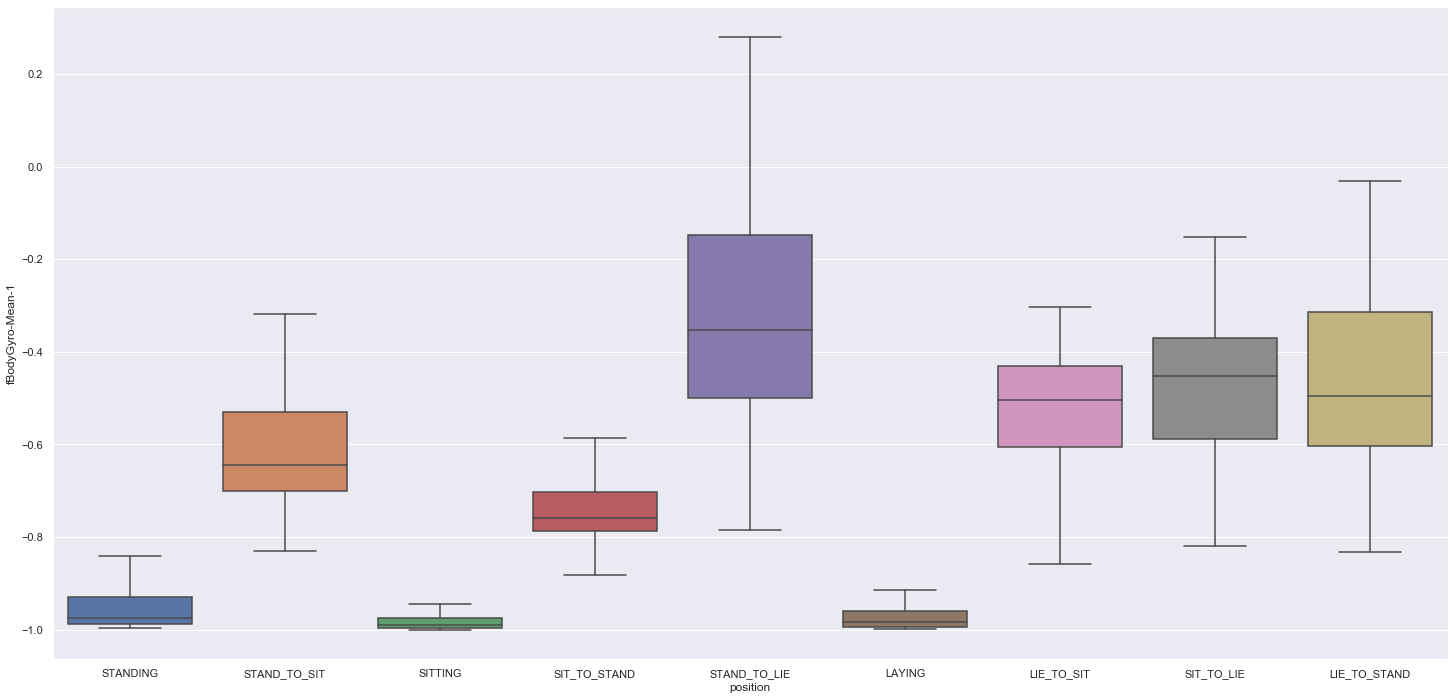

In [67]:
    sns.boxplot(x='position', y='fBodyGyro-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

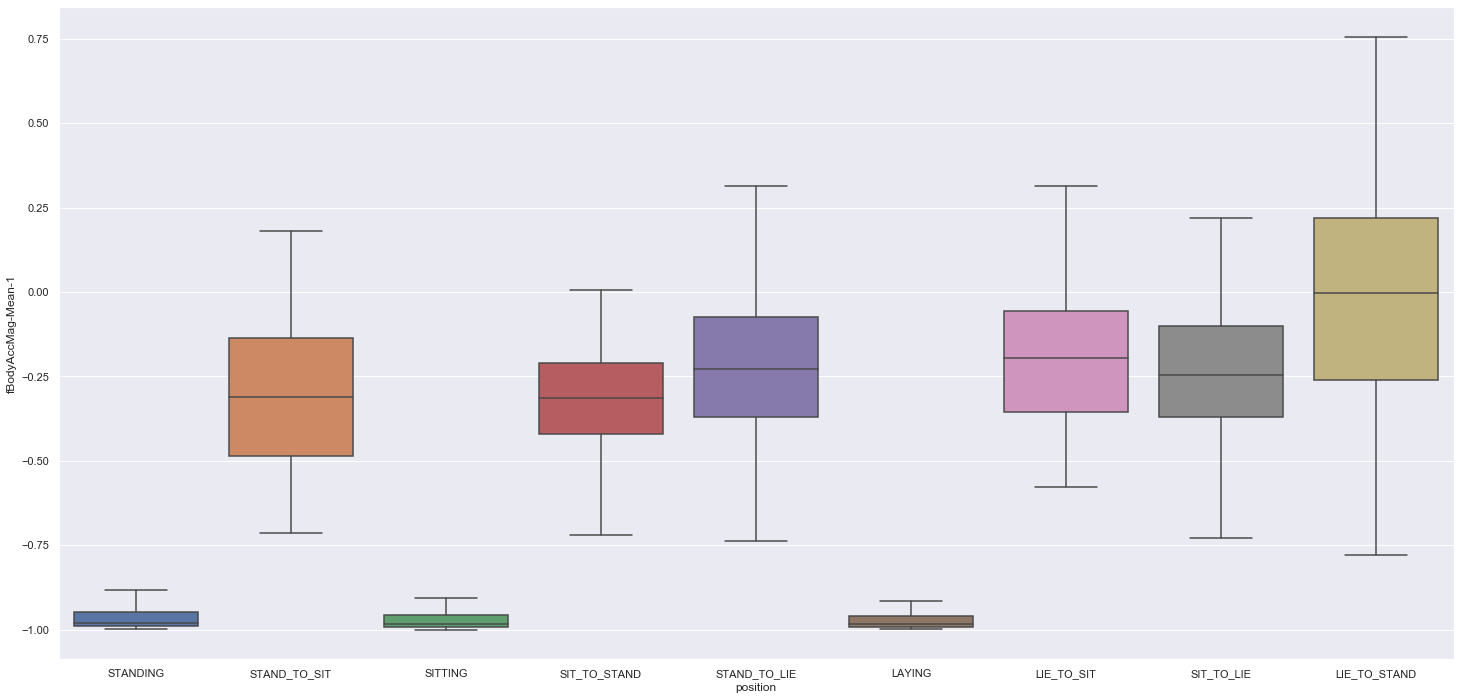

In [68]:
    sns.boxplot(x='position', y='fBodyAccMag-Mean-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

### H3. Analyzing Between Dynamic Activities.
**Dynamic -** WALKING, WALKING UPSTAIRS and WALKING DOWNSTAIRS

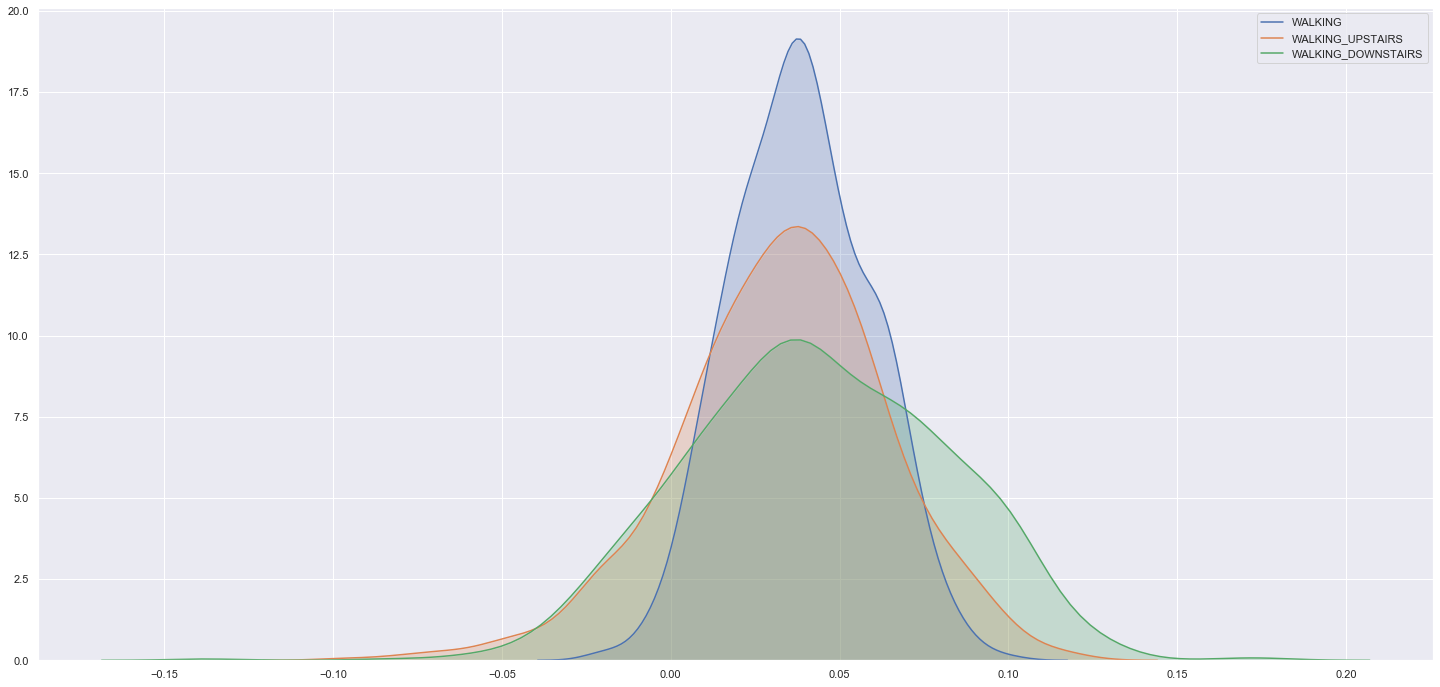

In [69]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyAcc-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyAcc-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )

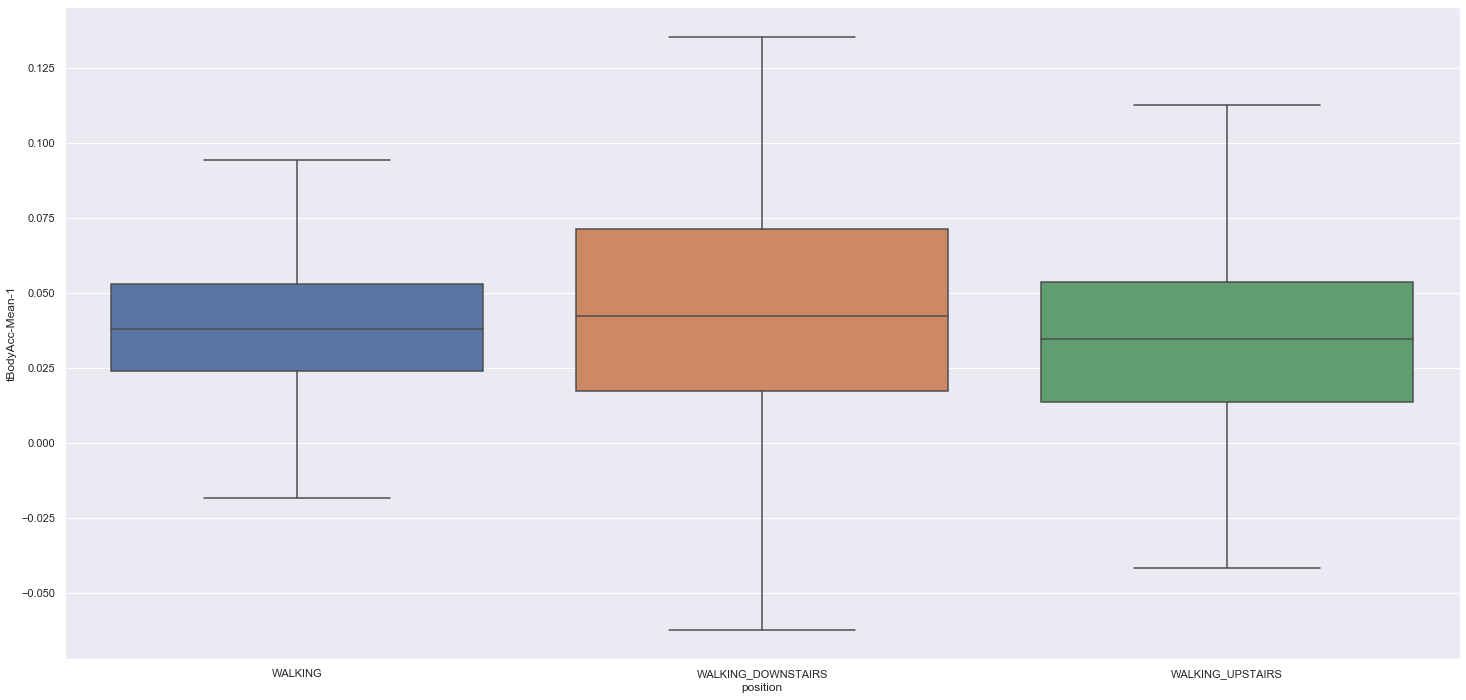

In [70]:
    sns.boxplot(x='position', y='tBodyAcc-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

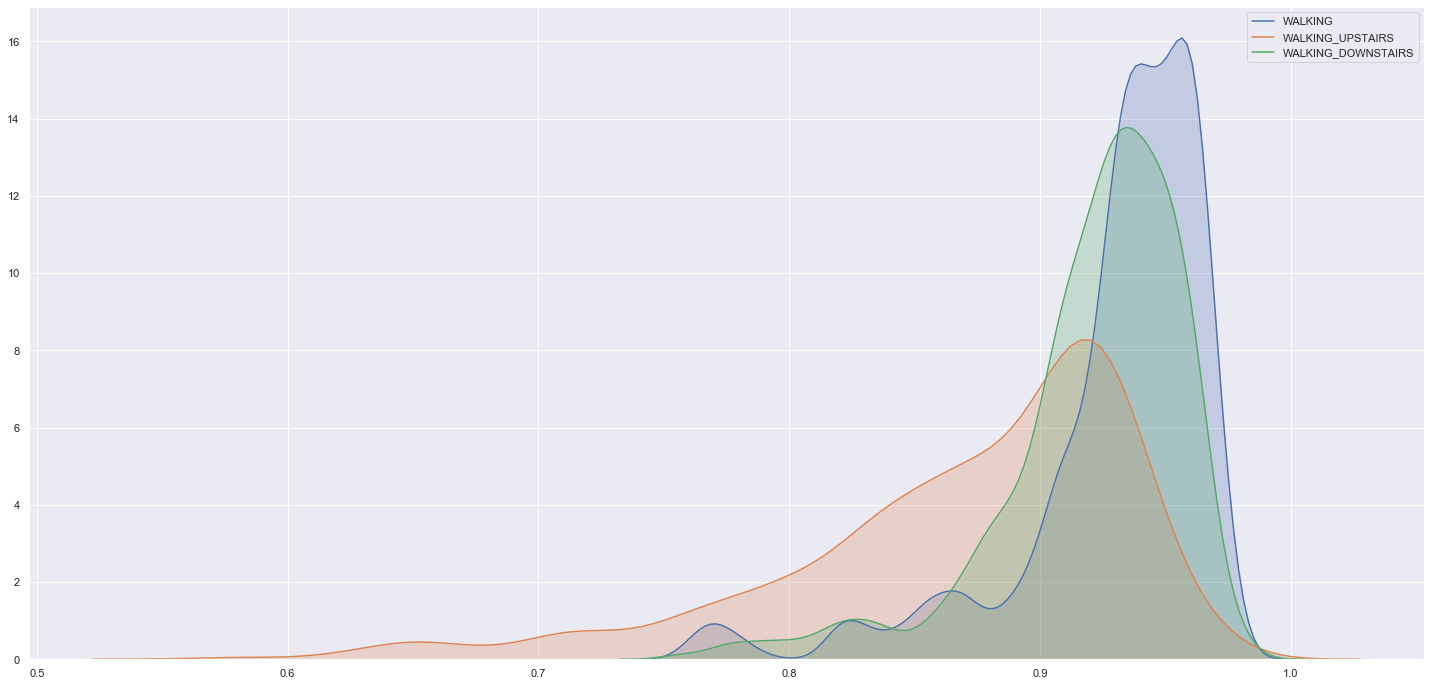

In [71]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tGravityAcc-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tGravityAcc-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tGravityAcc-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )

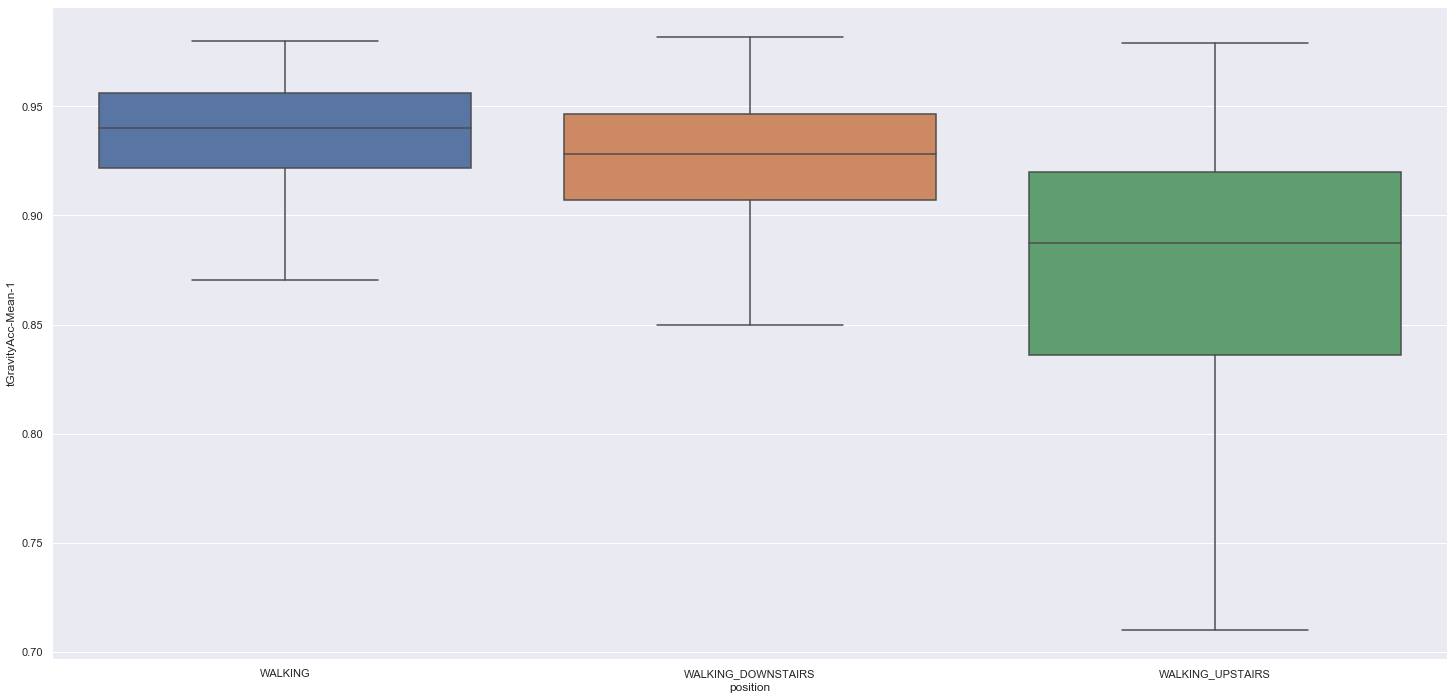

In [72]:
    sns.boxplot(x='position', y='tGravityAcc-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

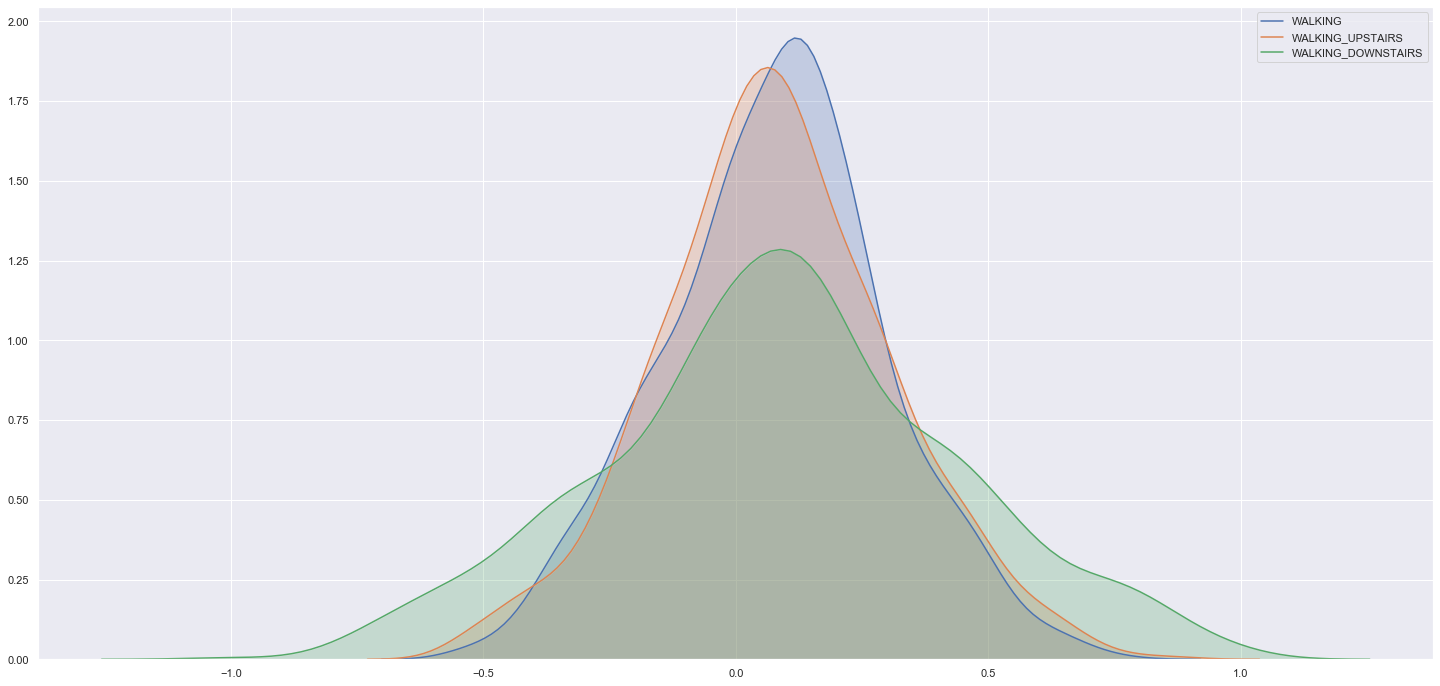

In [73]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyAccJerk-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyAccJerk-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAccJerk-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )

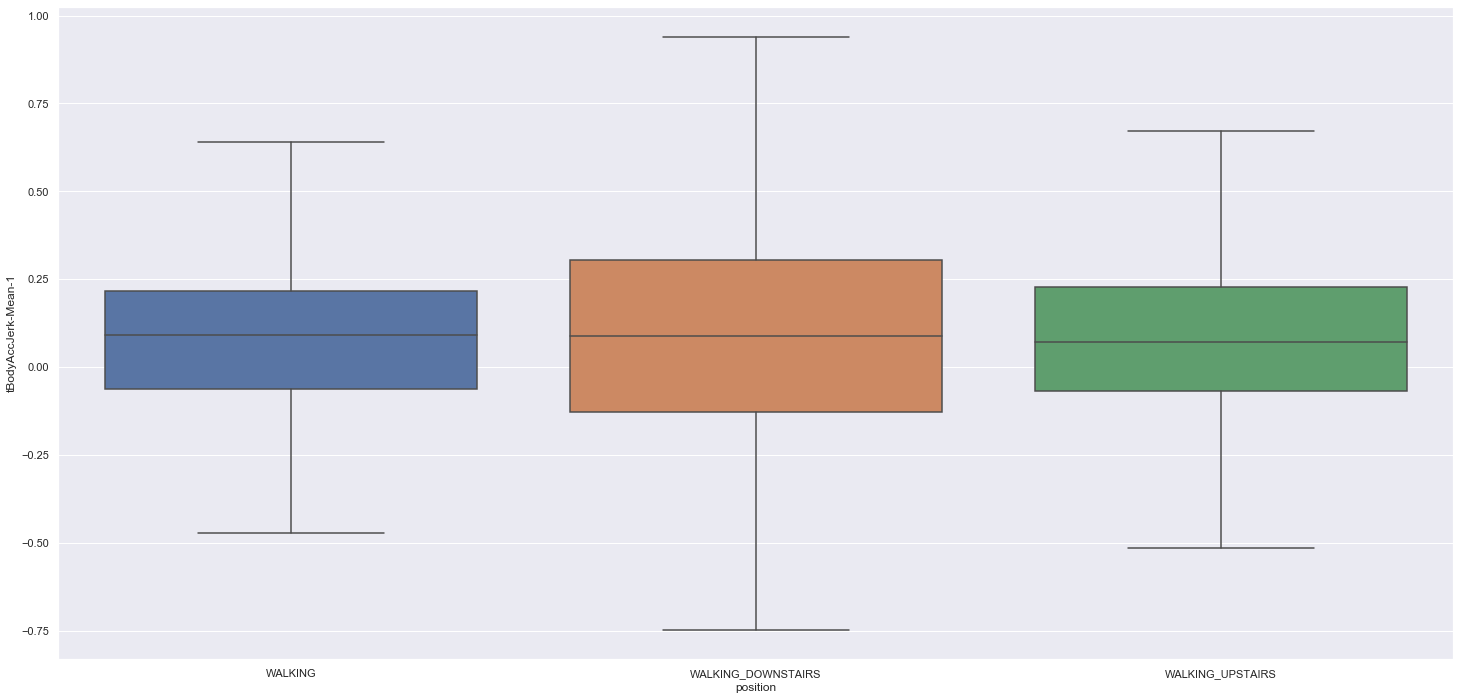

In [74]:
    sns.boxplot(x='position', y='tBodyAccJerk-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

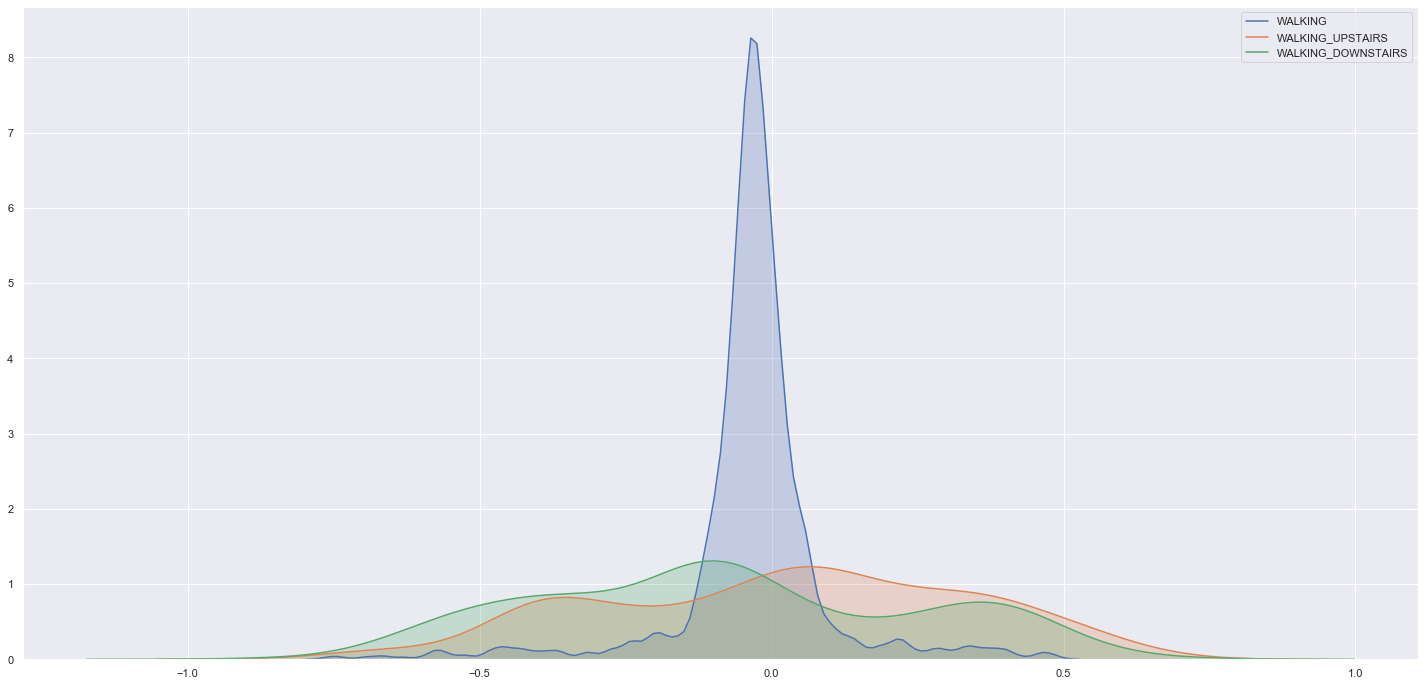

In [75]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyGyro-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyGyro-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyGyro-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )

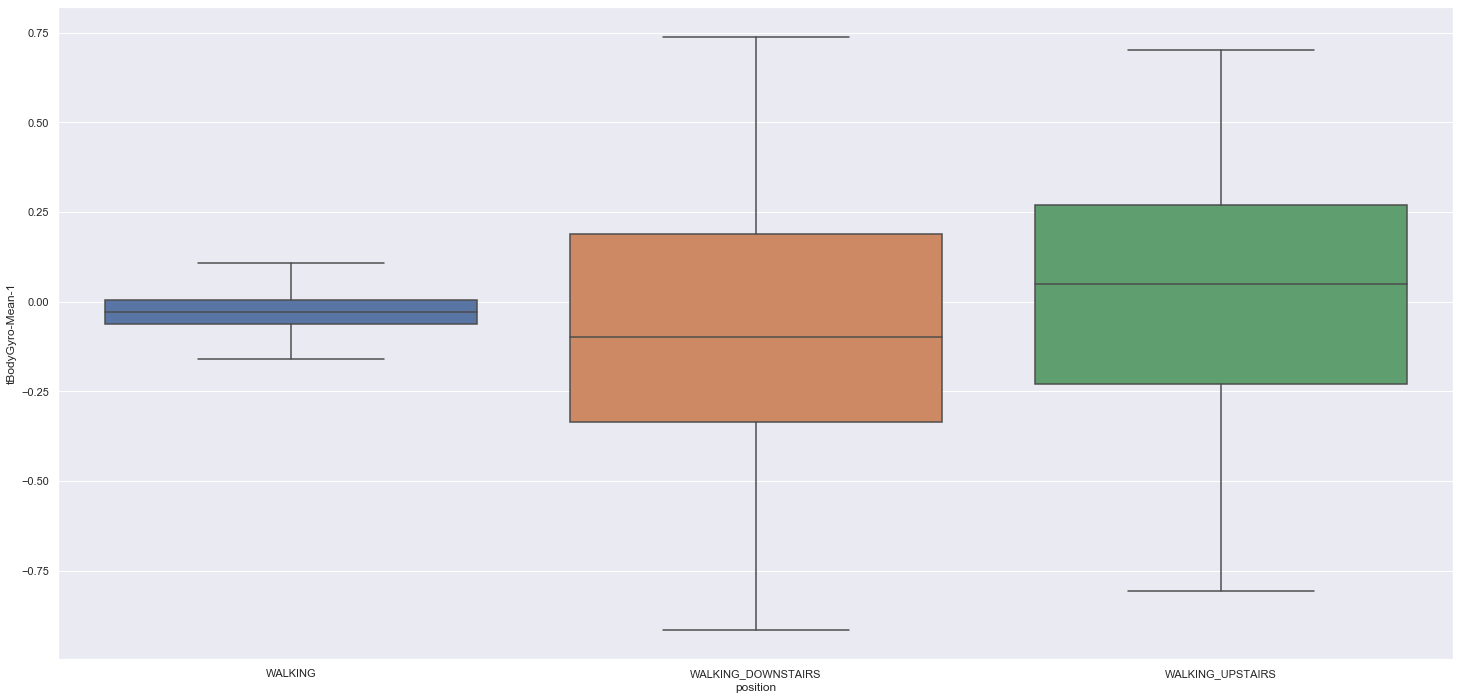

In [76]:
    sns.boxplot(x='position', y='tBodyGyro-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

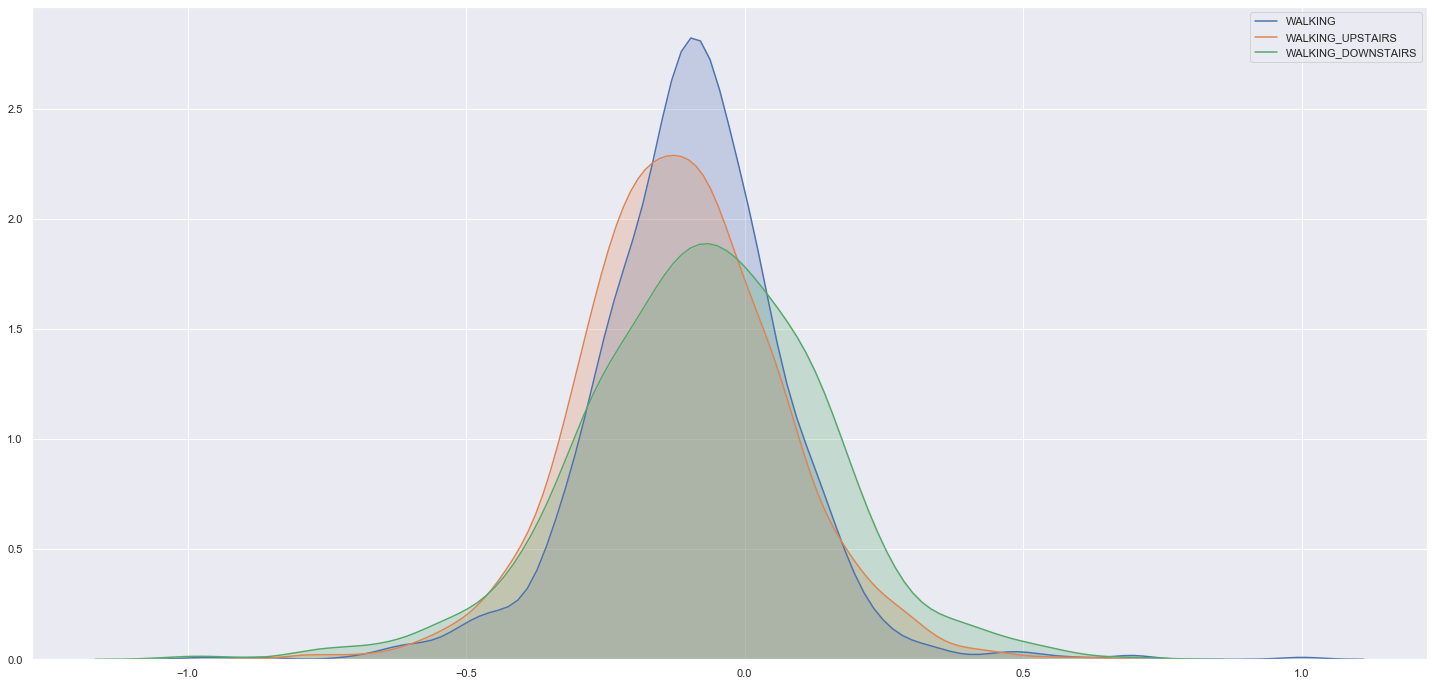

In [77]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyGyroJerk-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyGyroJerk-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyGyroJerk-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )

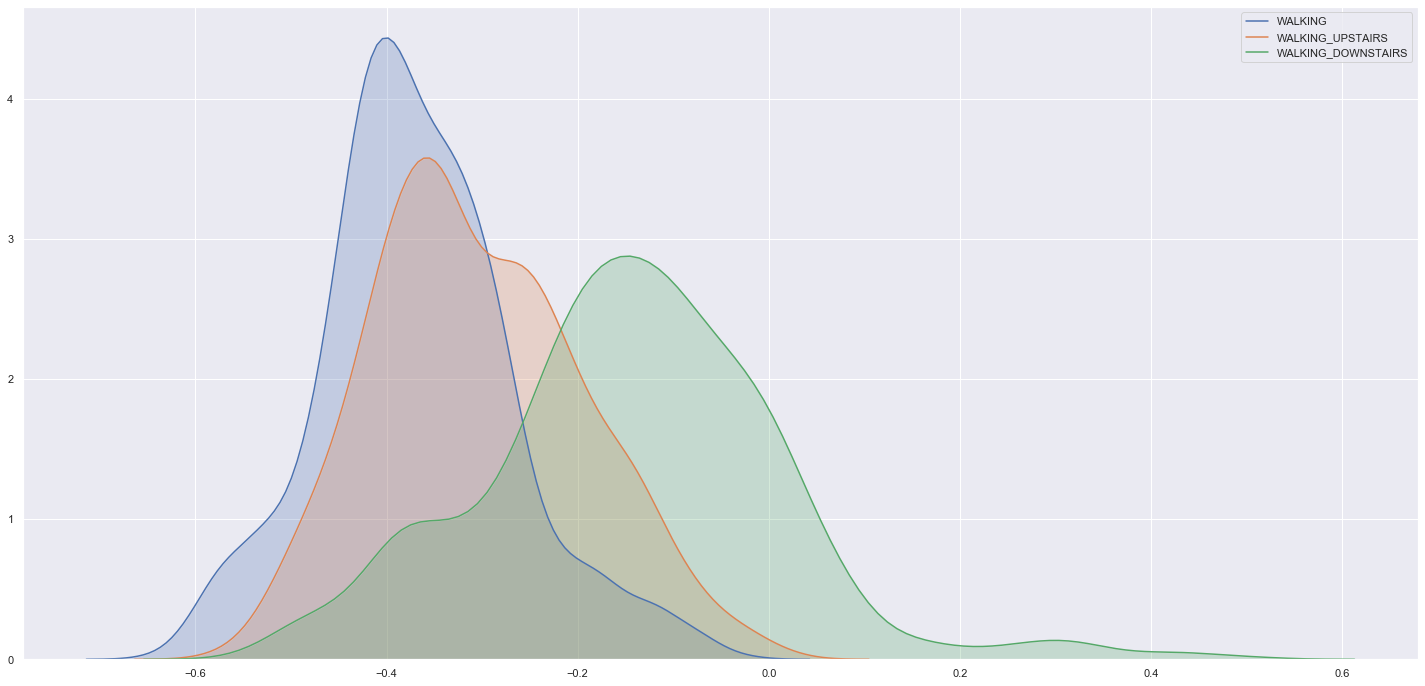

In [78]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyAccMag-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyAccMag-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAccMag-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )

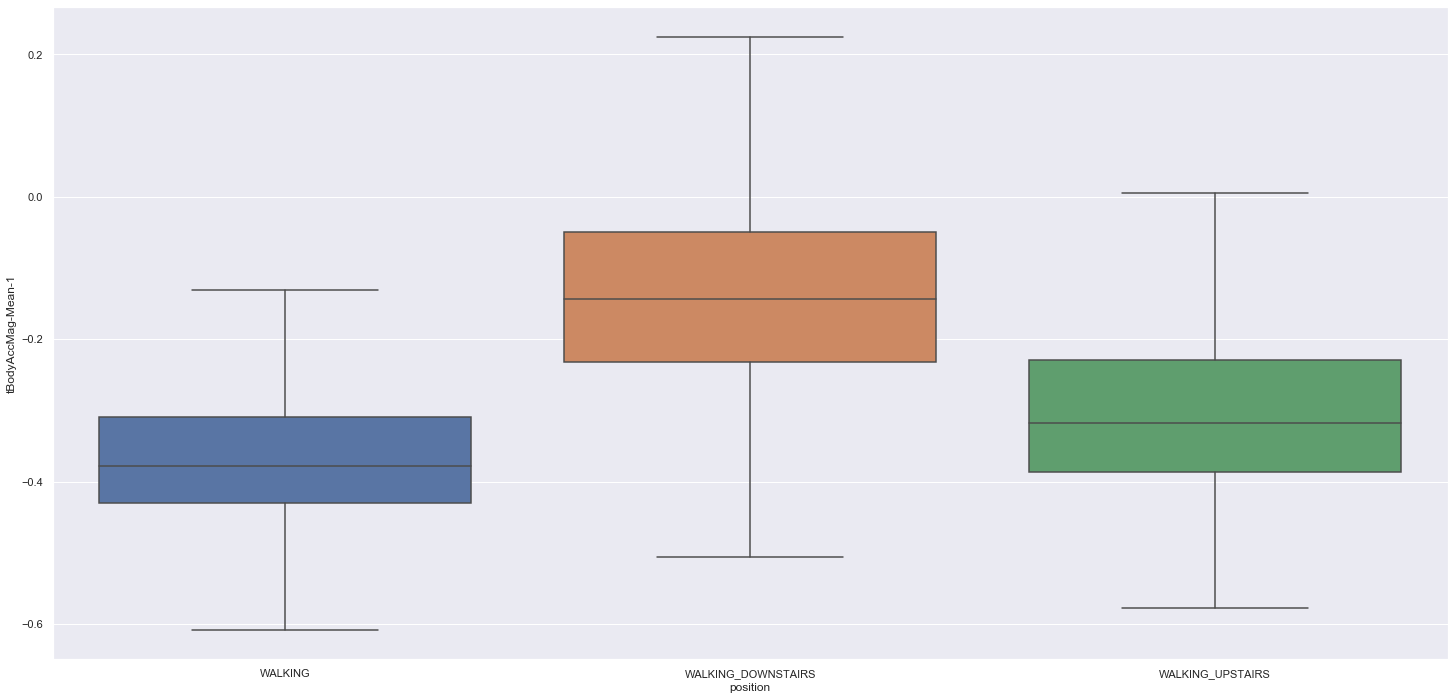

In [79]:
    sns.boxplot(x='position', y='tBodyAccMag-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

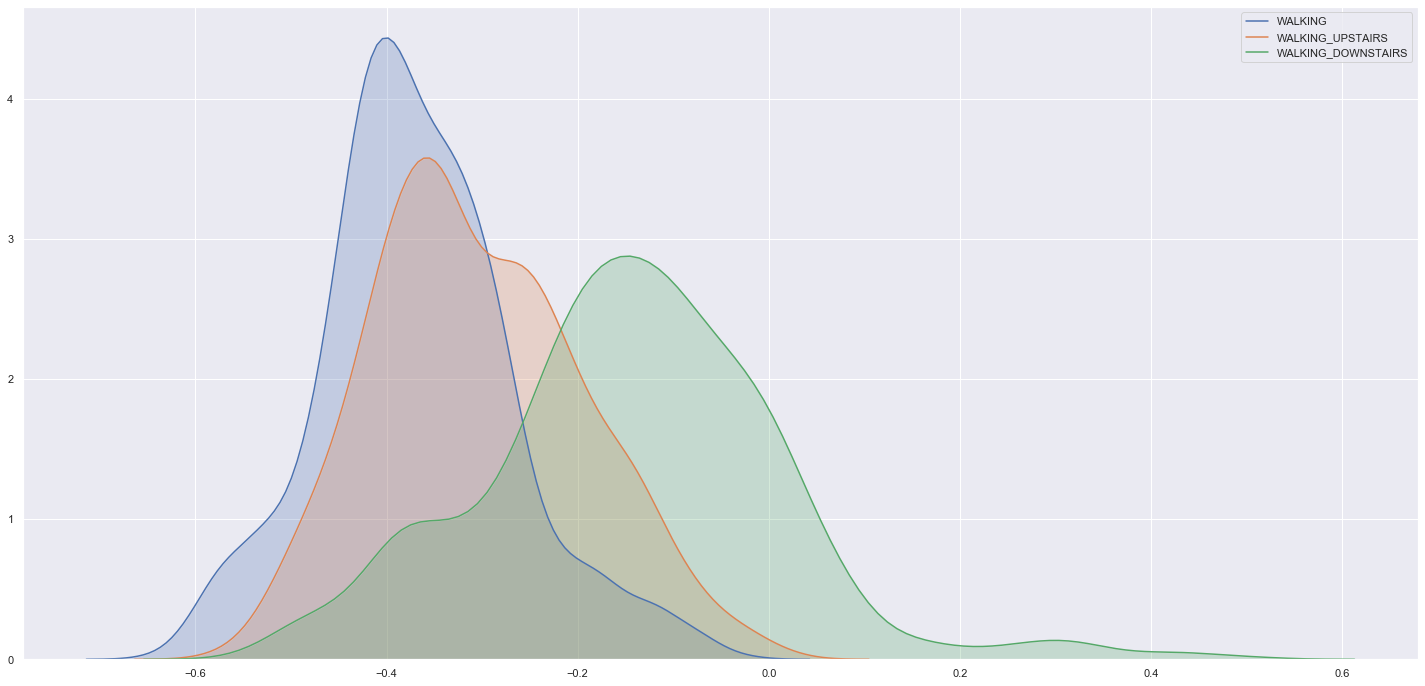

In [80]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tGravityAccMag-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tGravityAccMag-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tGravityAccMag-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )

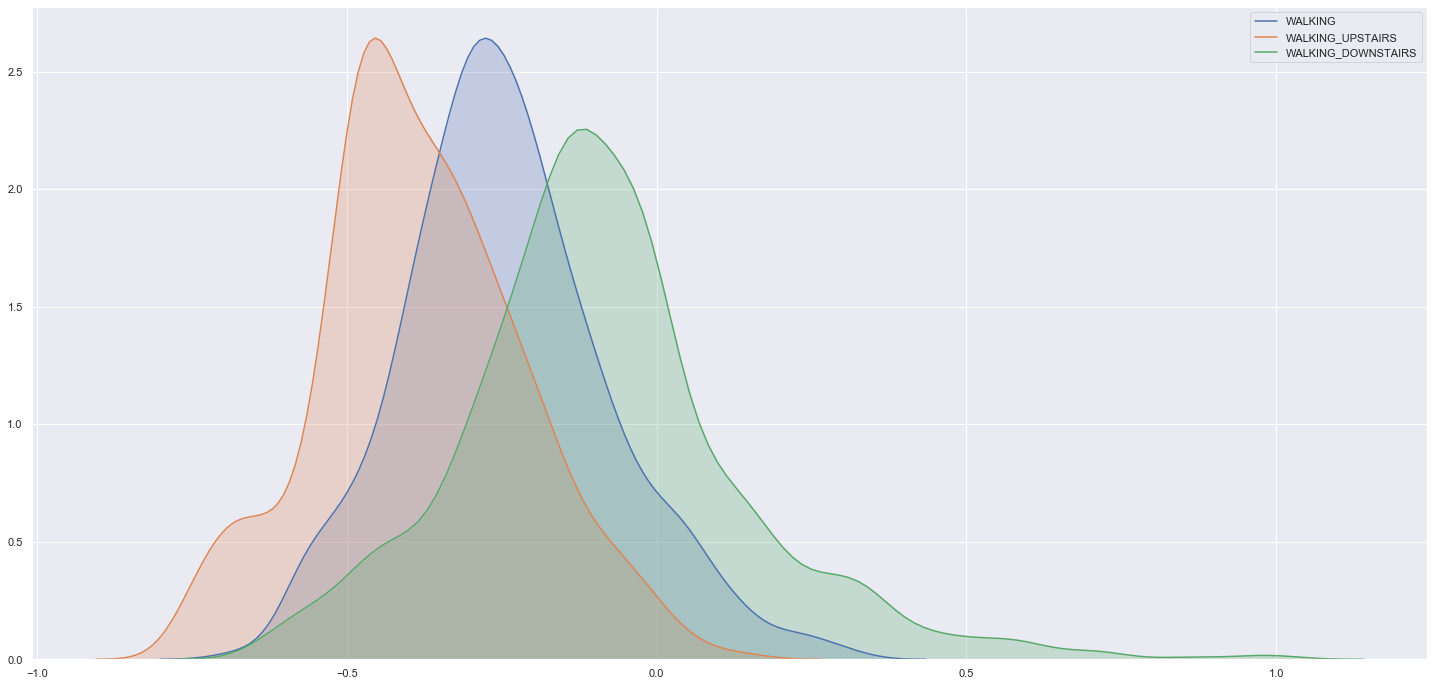

In [81]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyAccJerkMag-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyAccJerkMag-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAccJerkMag-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )

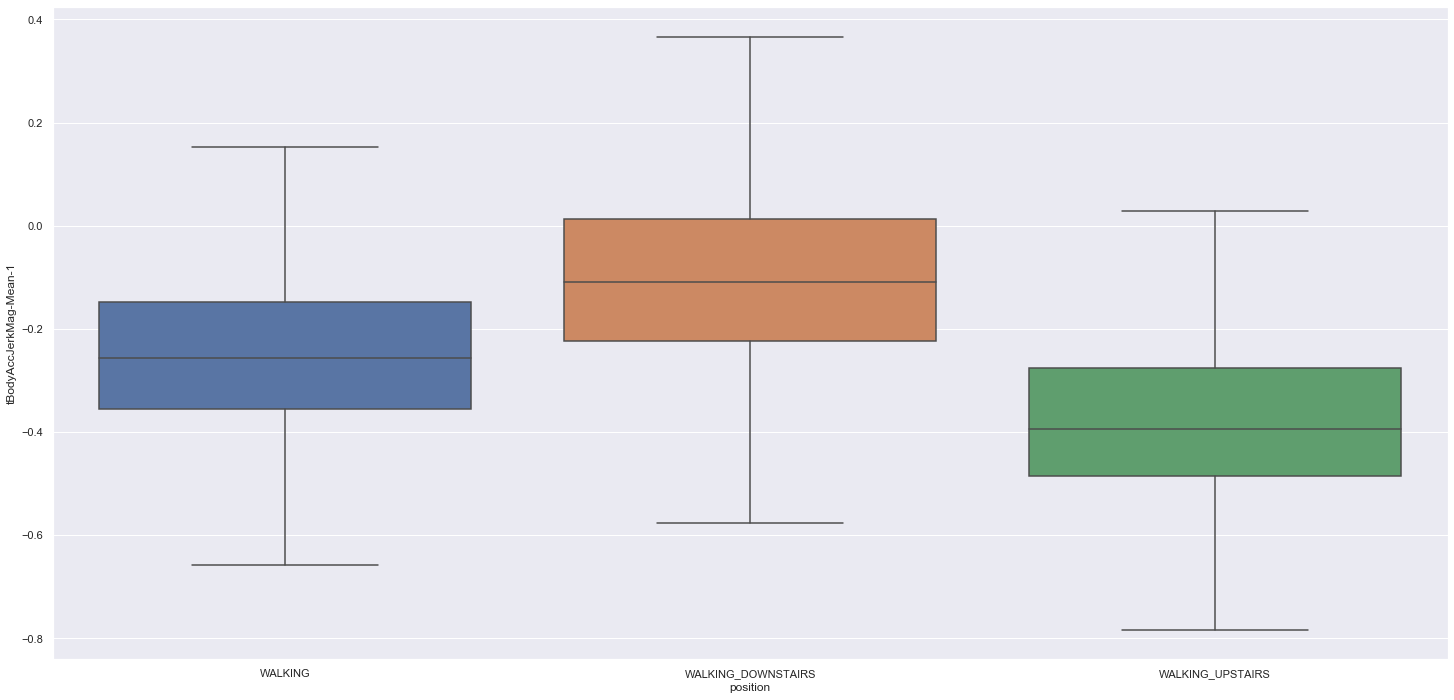

In [82]:
    sns.boxplot(x='position', y='tBodyAccJerkMag-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

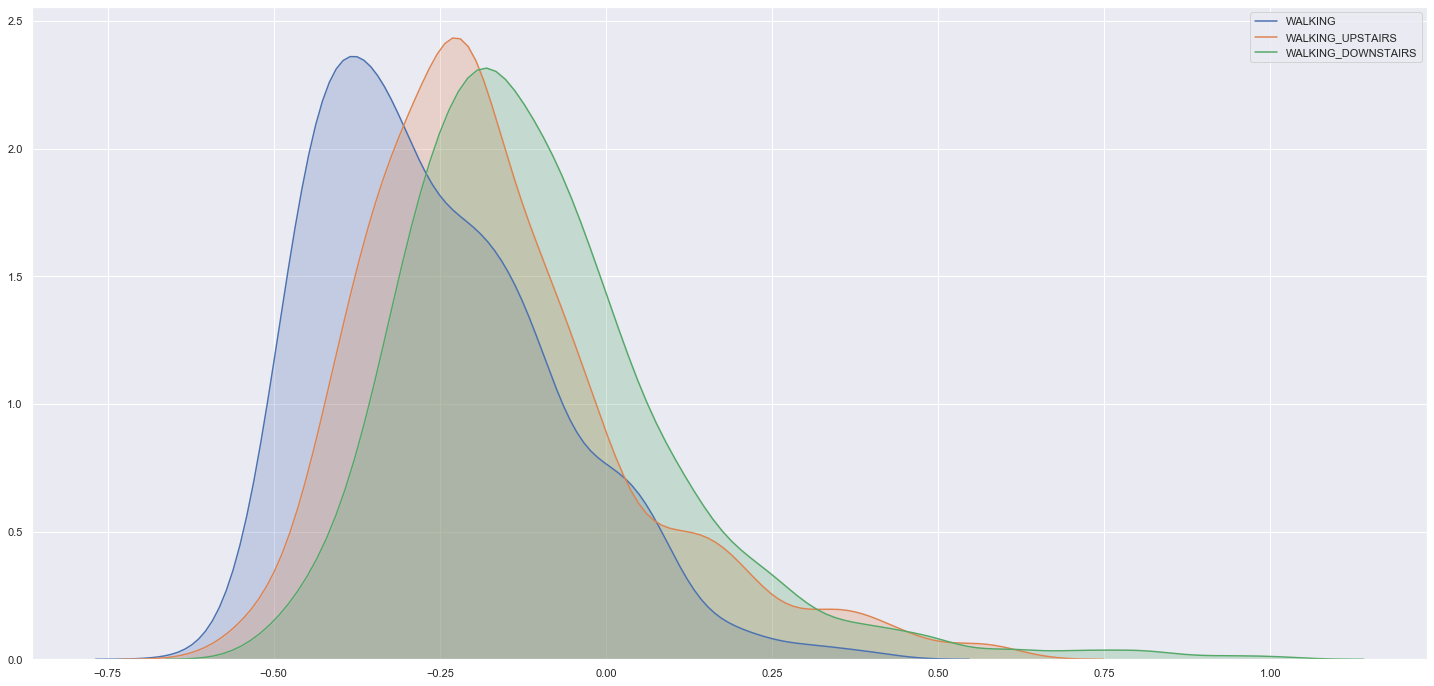

In [83]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyGyroMag-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyGyroMag-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyGyroMag-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )

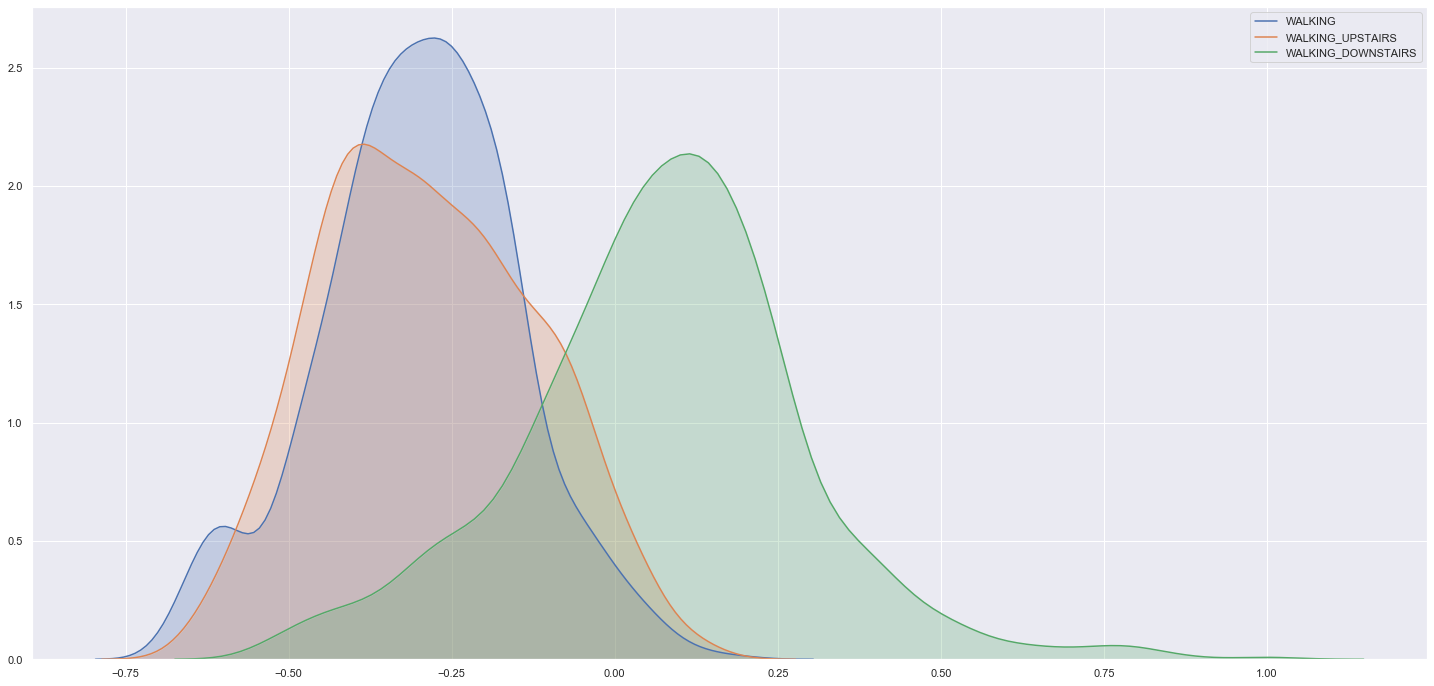

In [84]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['fBodyAcc-Mean-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['fBodyAcc-Mean-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['fBodyAcc-Mean-1'], label='WALKING_DOWNSTAIRS', shade=True )

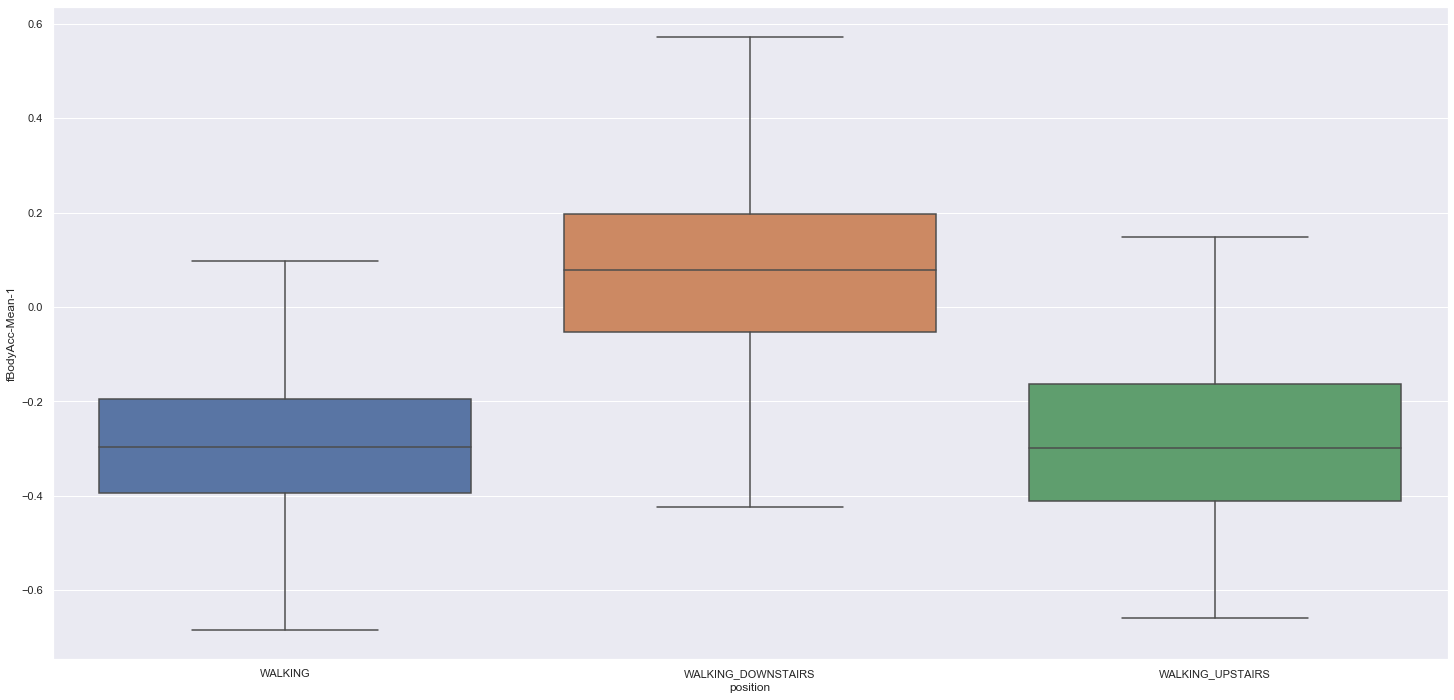

In [85]:
    sns.boxplot(x='position', y='fBodyAcc-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

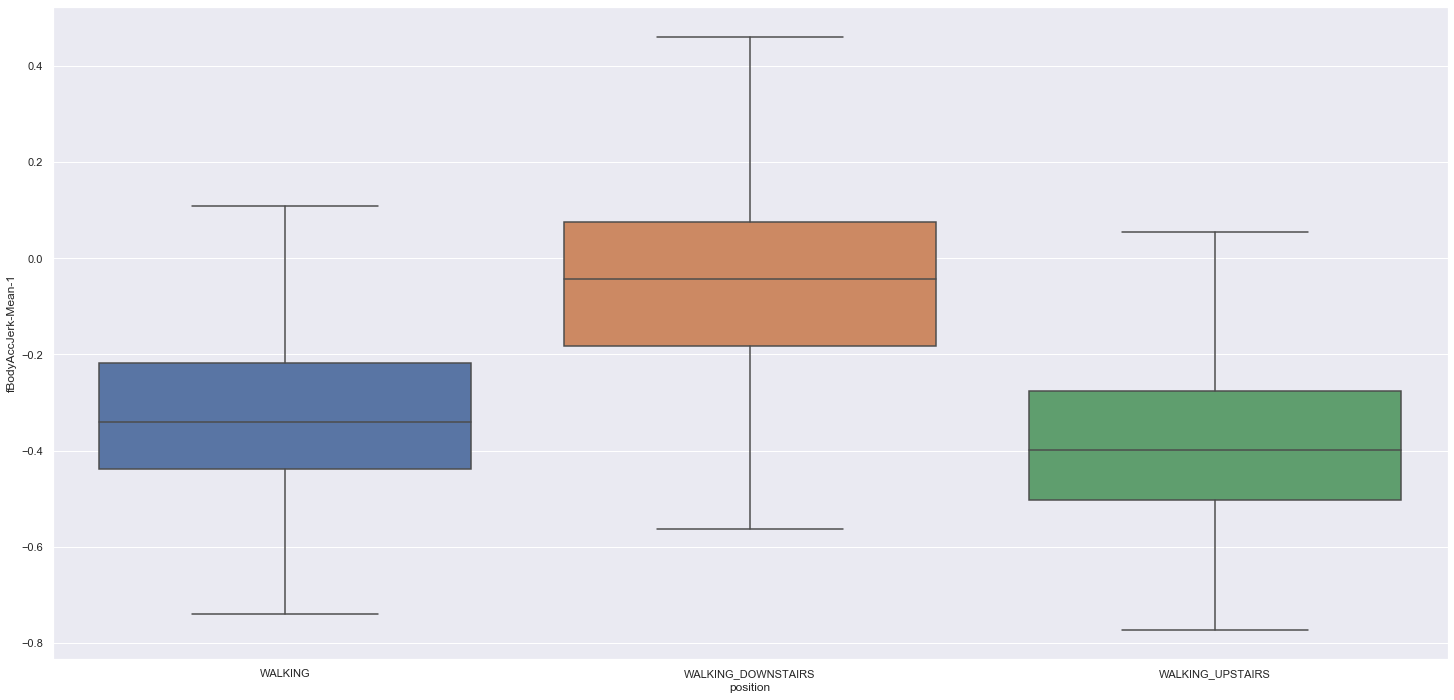

In [86]:
    sns.boxplot(x='position', y='fBodyAccJerk-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

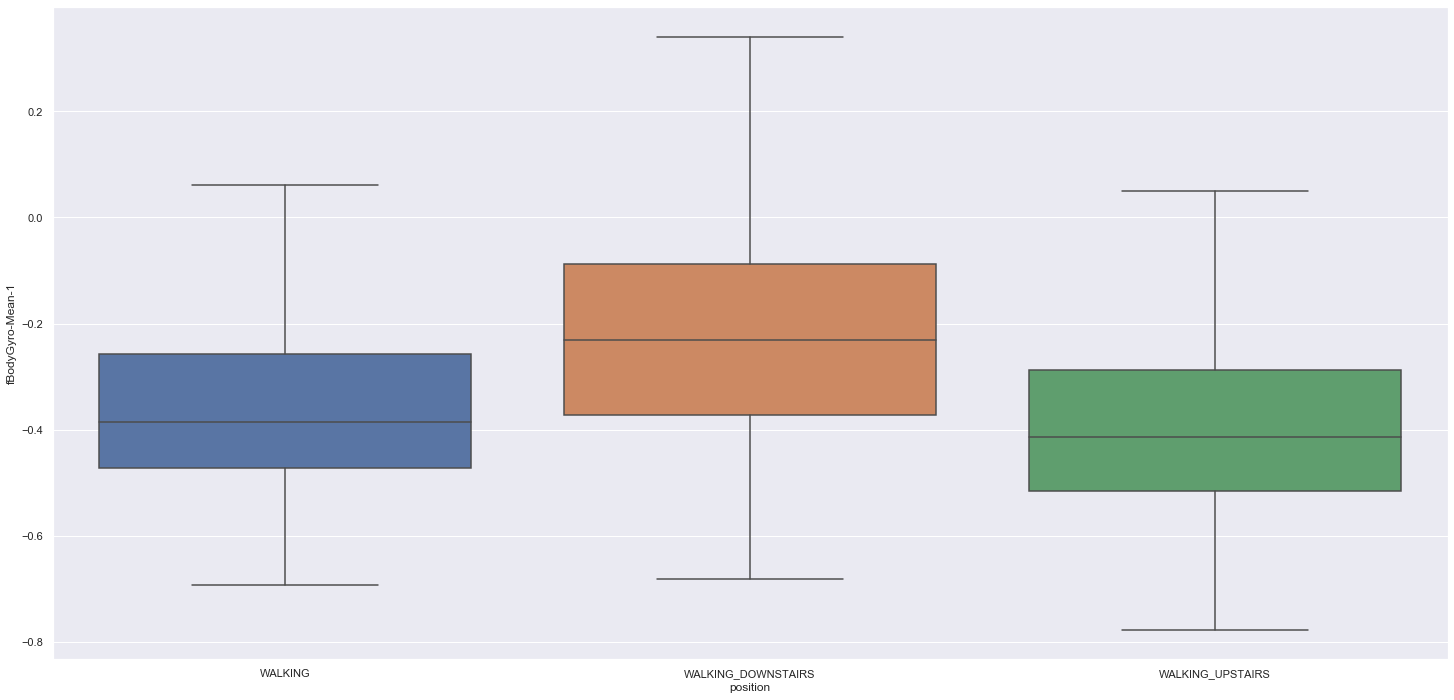

In [87]:
    sns.boxplot(x='position', y='fBodyGyro-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

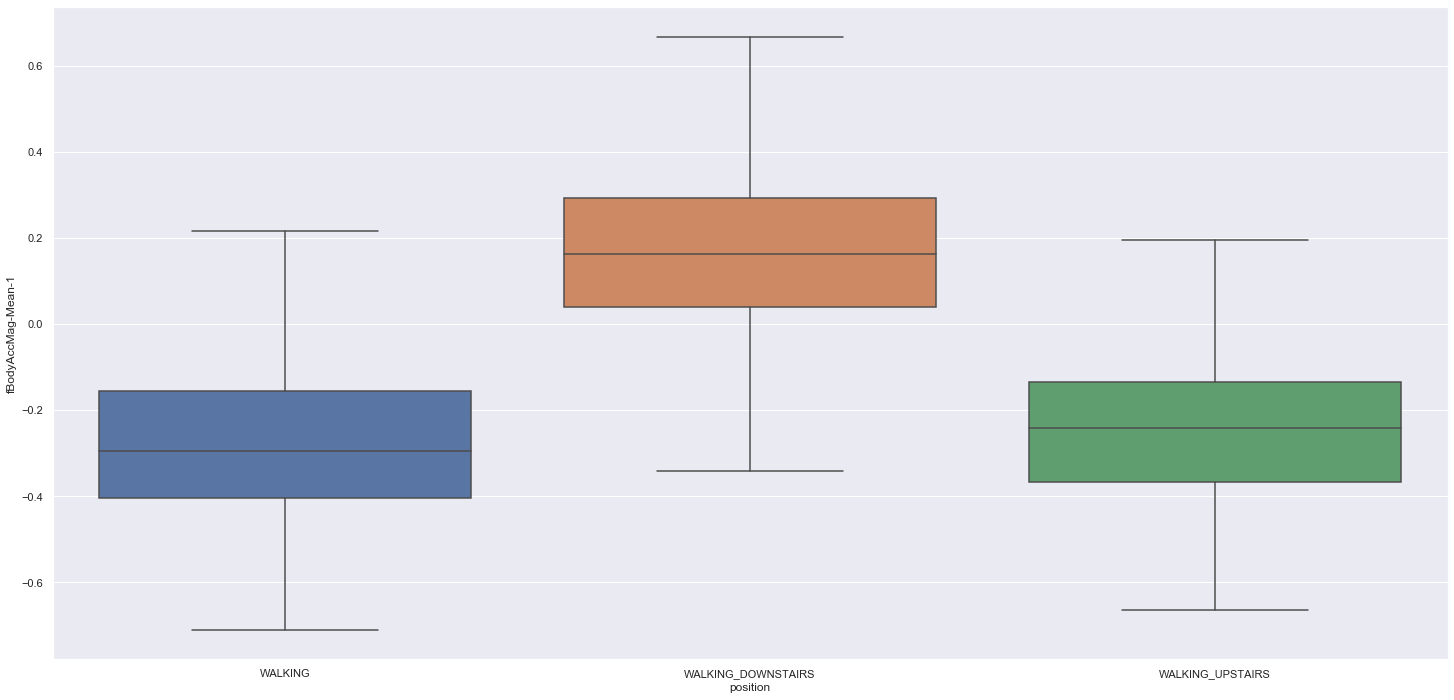

In [88]:
    sns.boxplot(x='position', y='fBodyAccMag-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

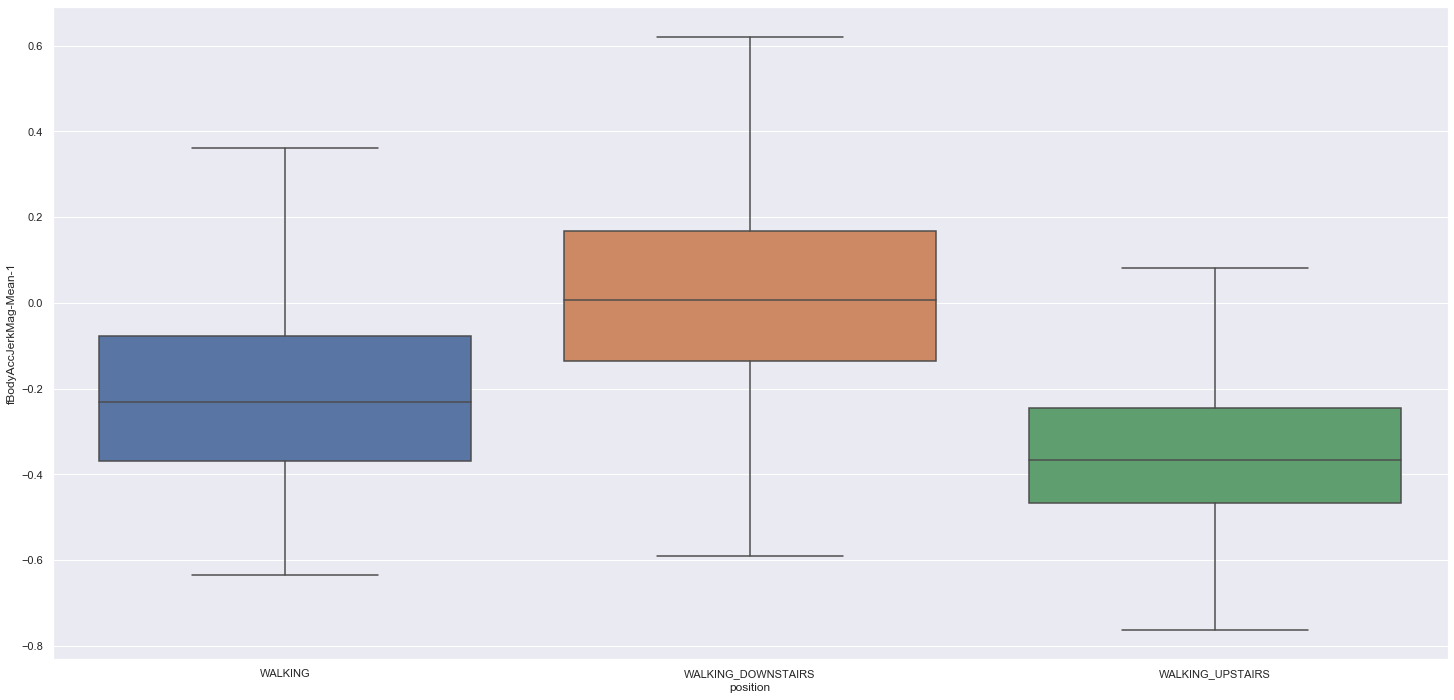

In [89]:
    sns.boxplot(x='position', y='fBodyAccJerkMag-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

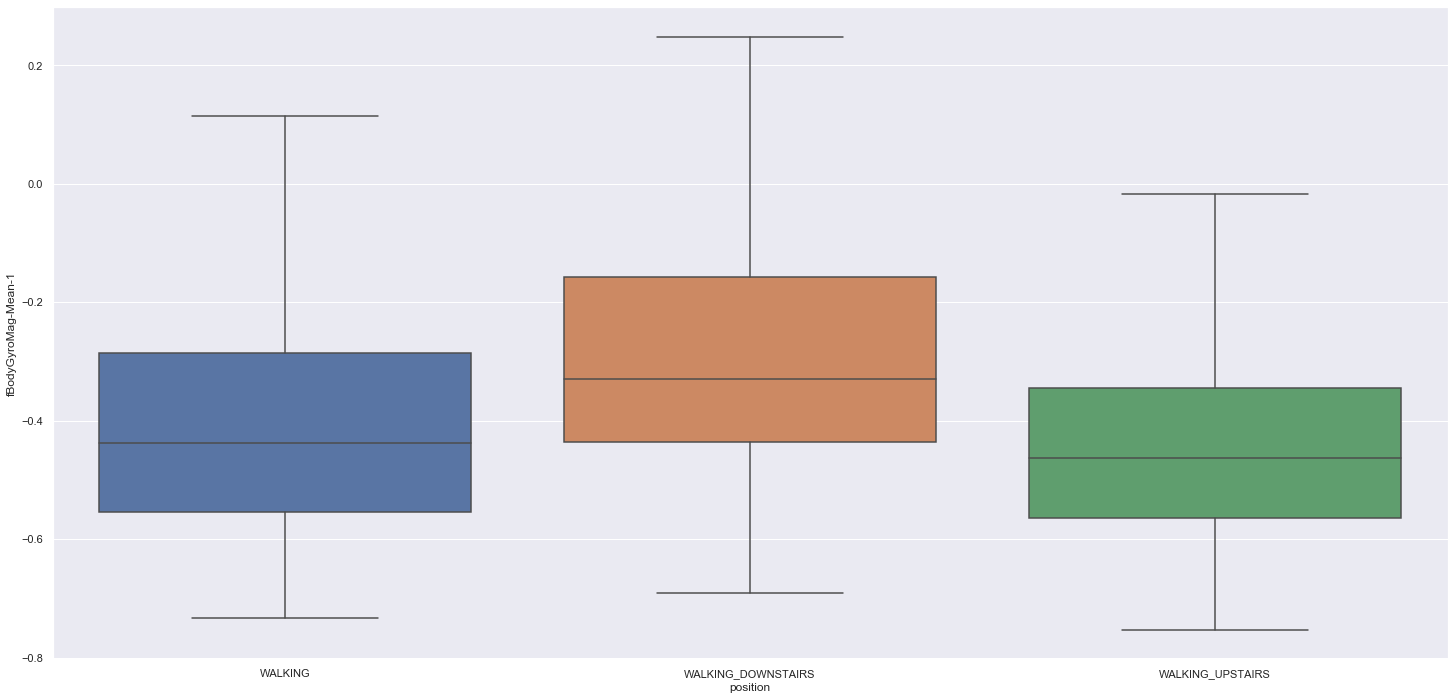

In [90]:
    sns.boxplot(x='position', y='fBodyGyroMag-Mean-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

### H4. Analyzing Between Static Activities.
**Static -** STANDING, SITTING and LAYING

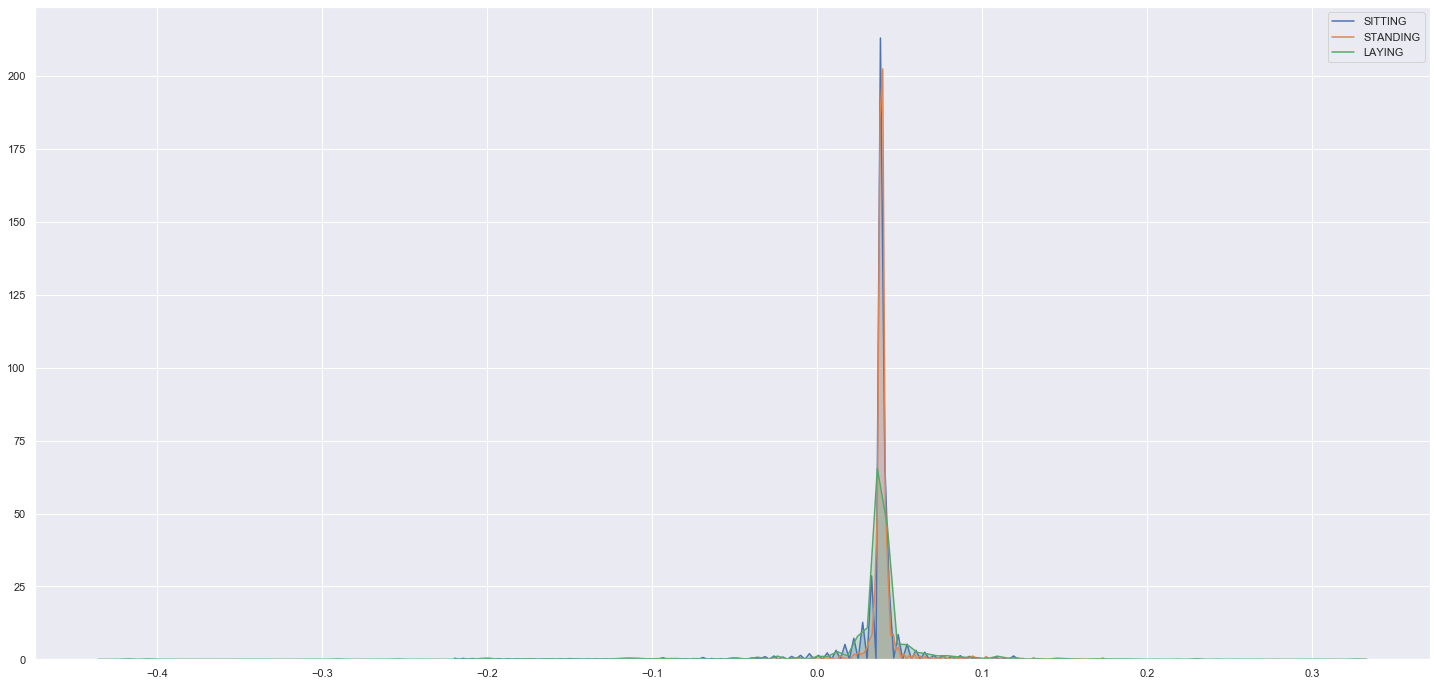

In [91]:
sns.kdeplot( df51[df51['position'] == 'SITTING']['tBodyAcc-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tBodyAcc-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tBodyAcc-Mean-1'], label='LAYING', shade=True )

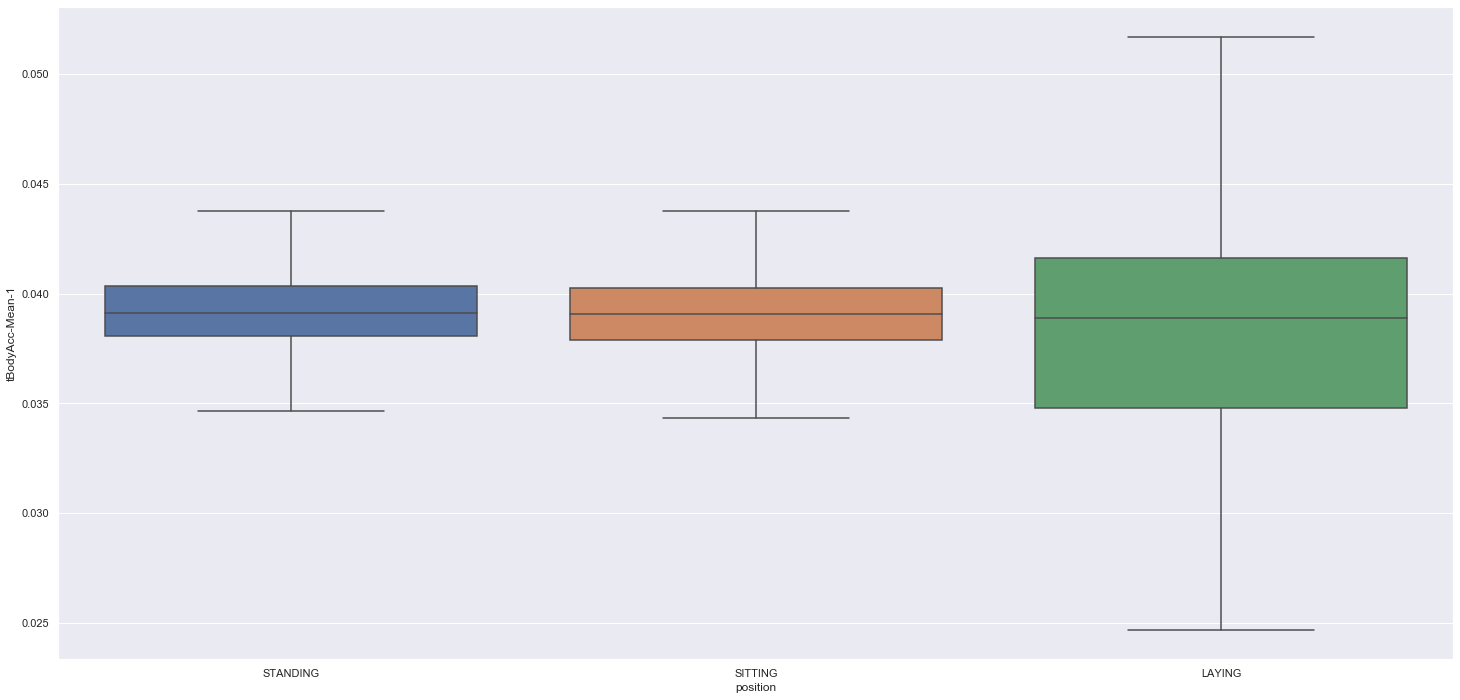

In [92]:
sns.boxplot(x='position', y='tBodyAcc-Mean-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

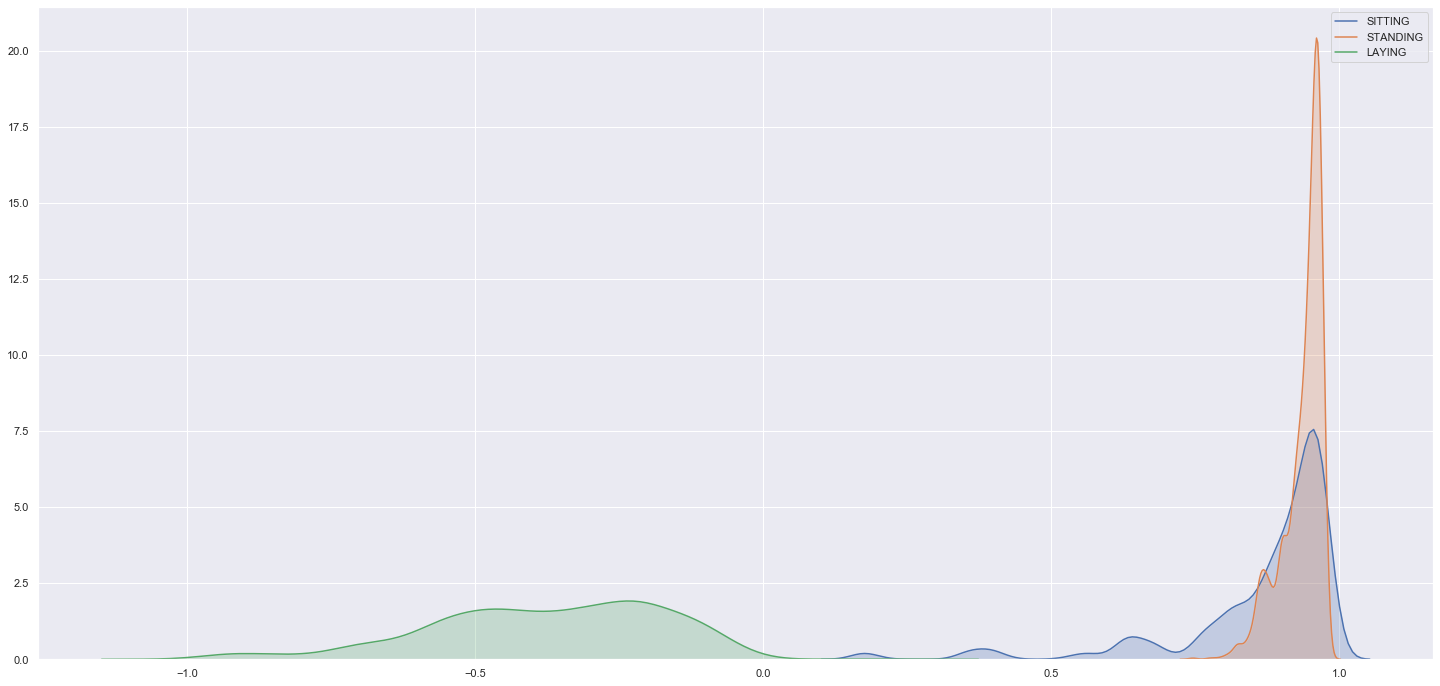

In [93]:
sns.kdeplot( df51[df51['position'] == 'SITTING']['tGravityAcc-Mean-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tGravityAcc-Mean-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tGravityAcc-Mean-1'], label='LAYING', shade=True )

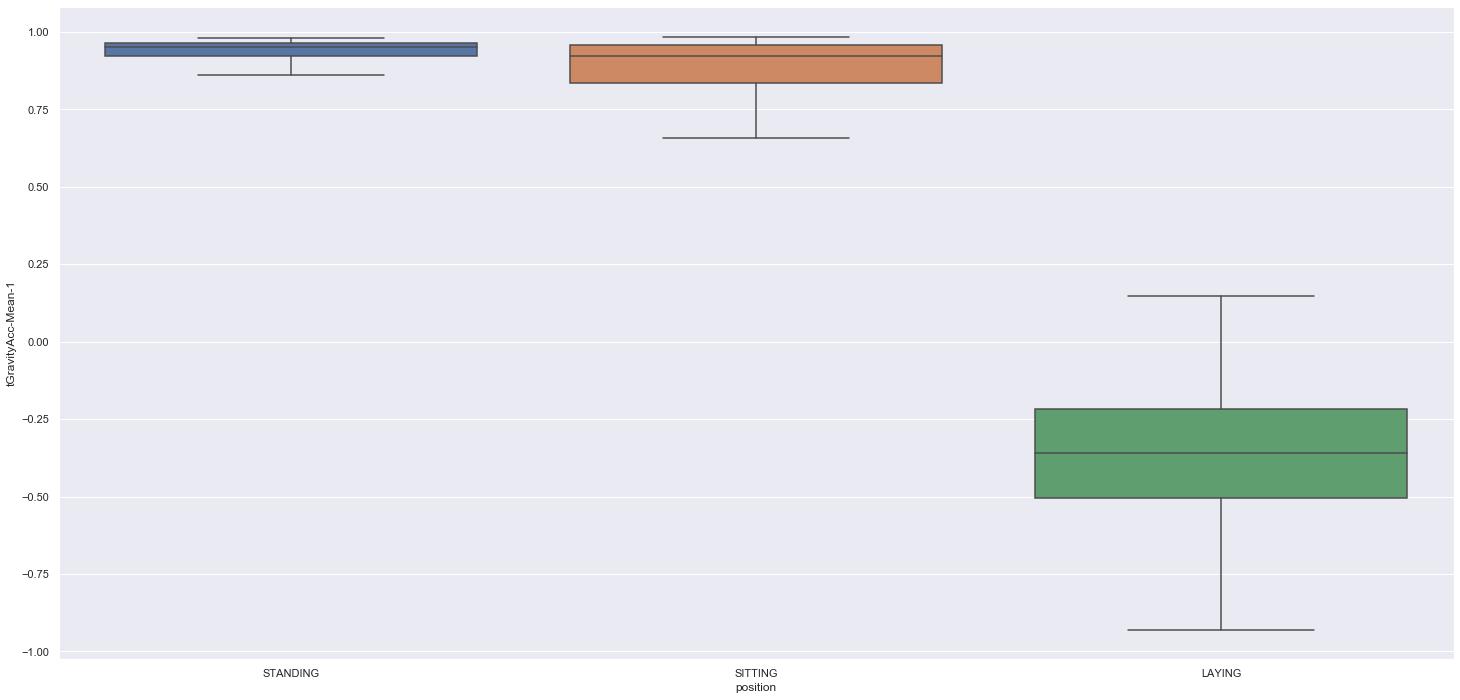

In [94]:
sns.boxplot(x='position', y='tGravityAcc-Mean-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

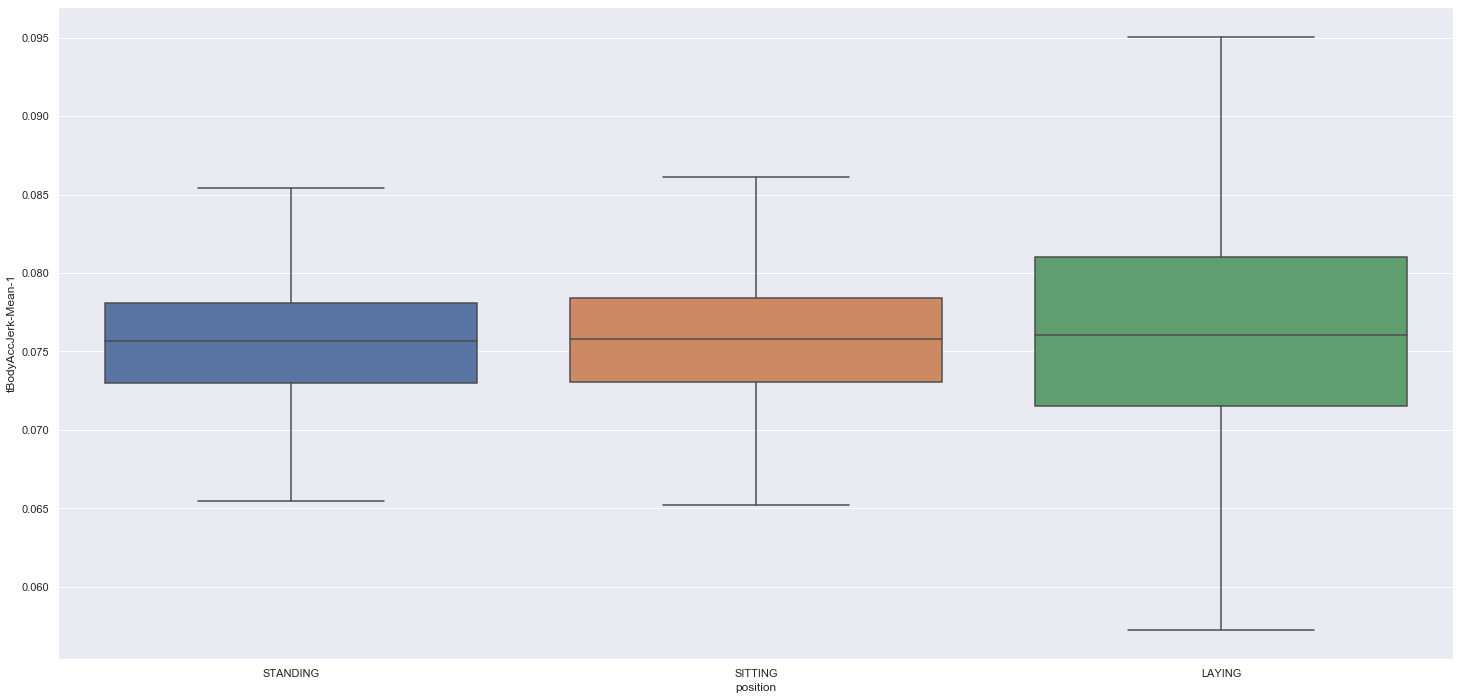

In [95]:
sns.boxplot(x='position', y='tBodyAccJerk-Mean-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

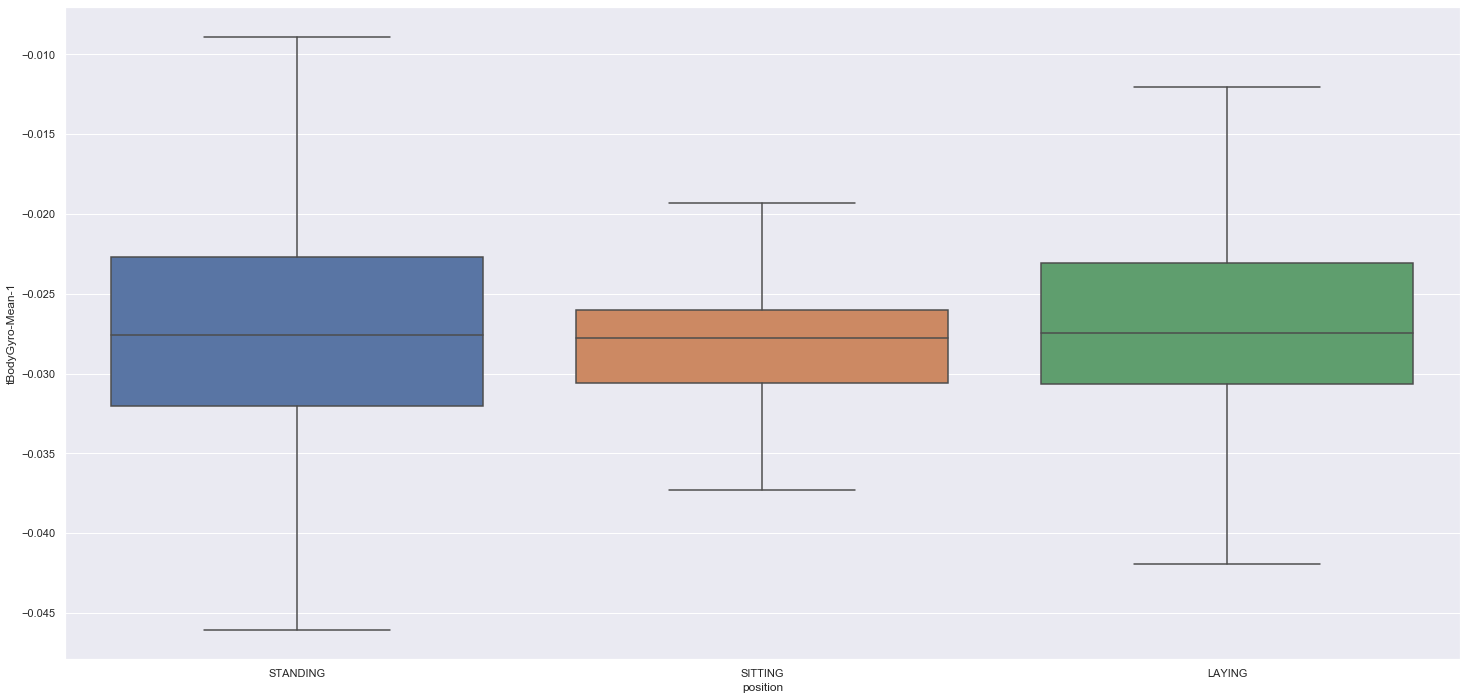

In [96]:
sns.boxplot(x='position', y='tBodyGyro-Mean-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

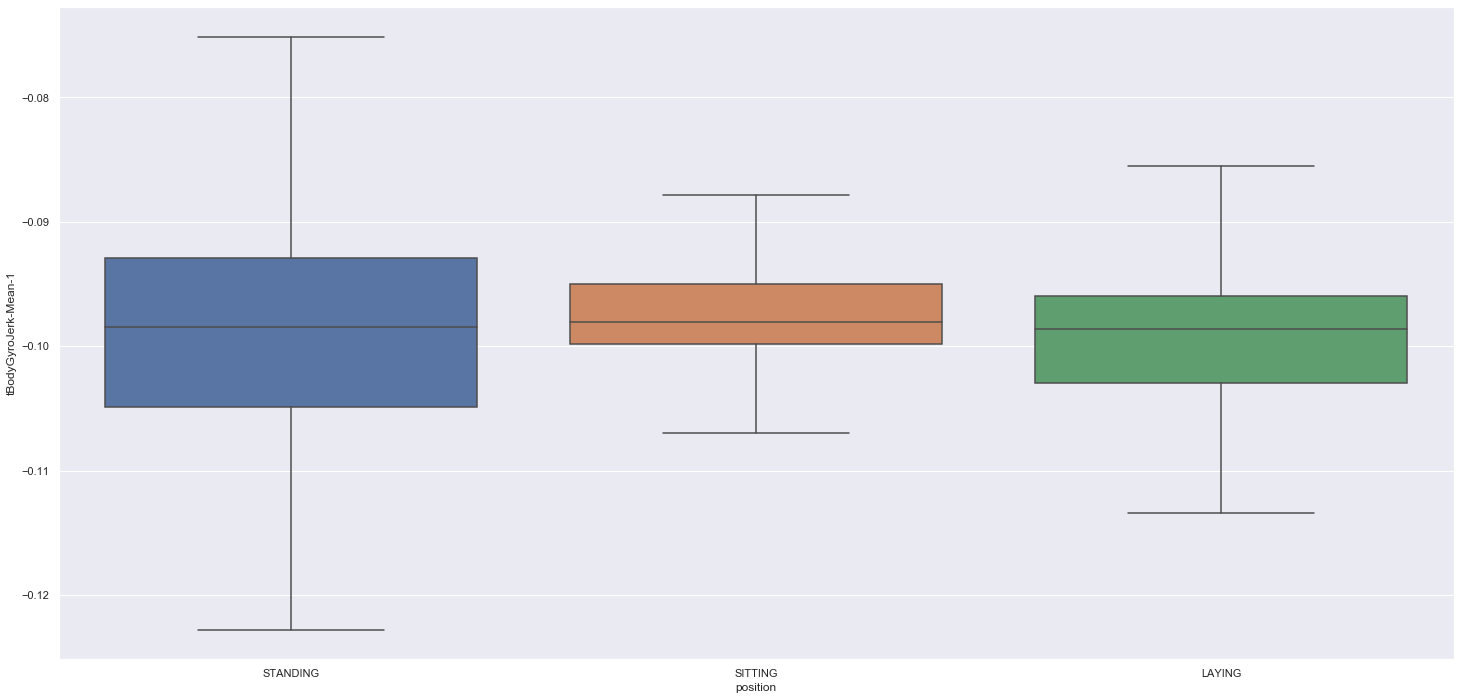

In [97]:
sns.boxplot(x='position', y='tBodyGyroJerk-Mean-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

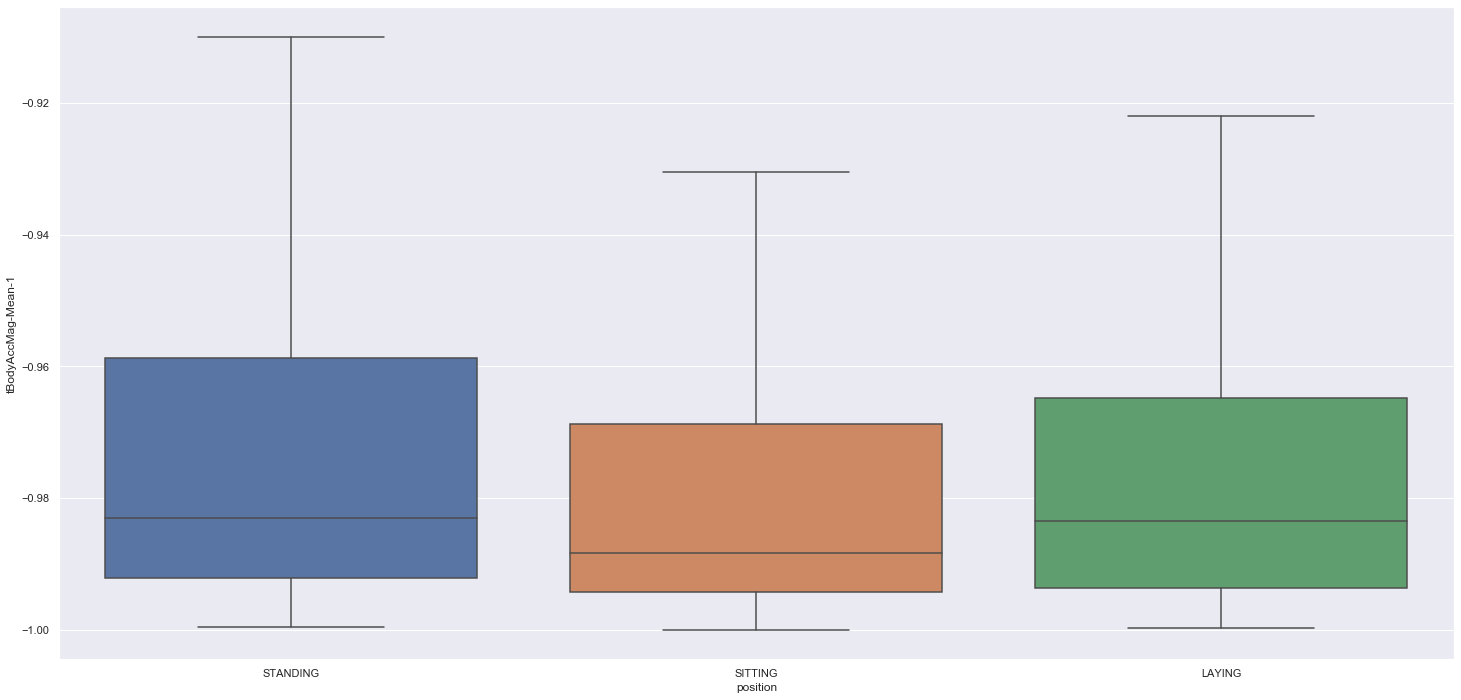

In [98]:
sns.boxplot(x='position', y='tBodyAccMag-Mean-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

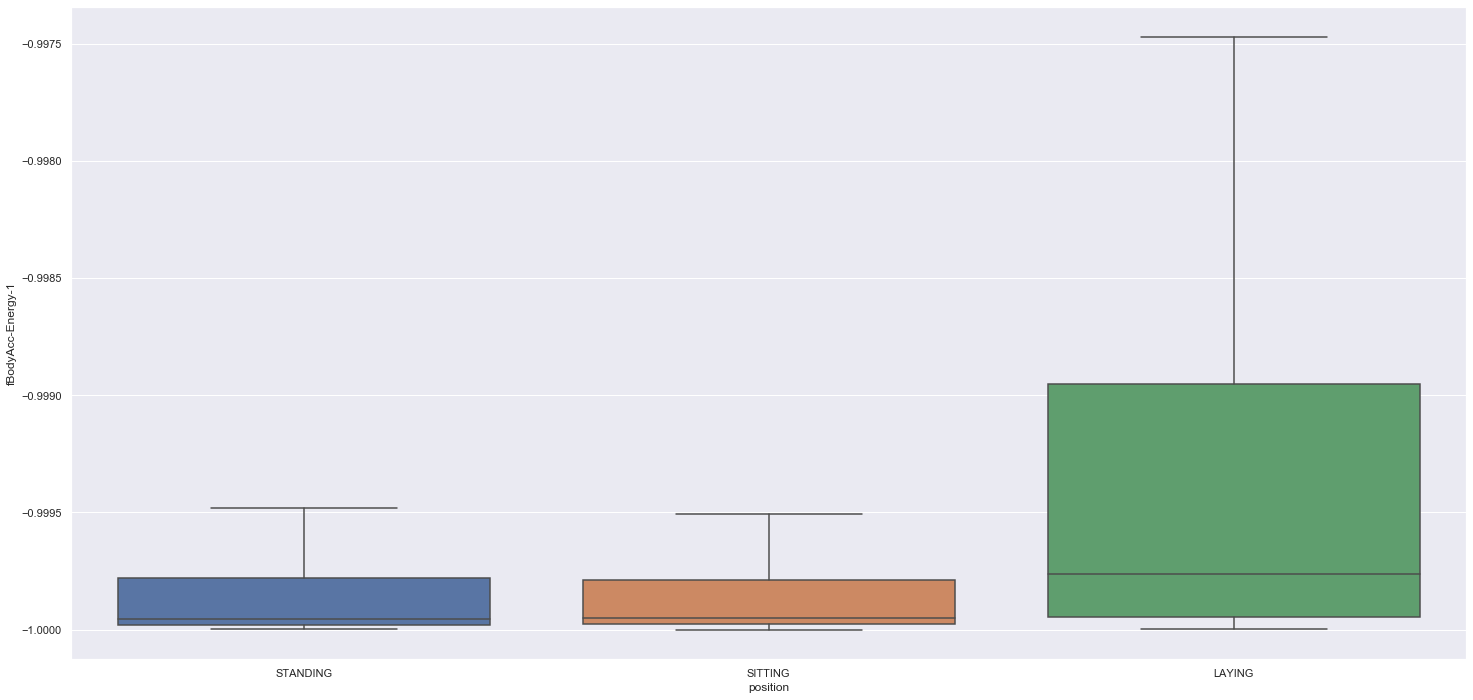

In [99]:
sns.boxplot(x='position', y='fBodyAcc-Energy-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

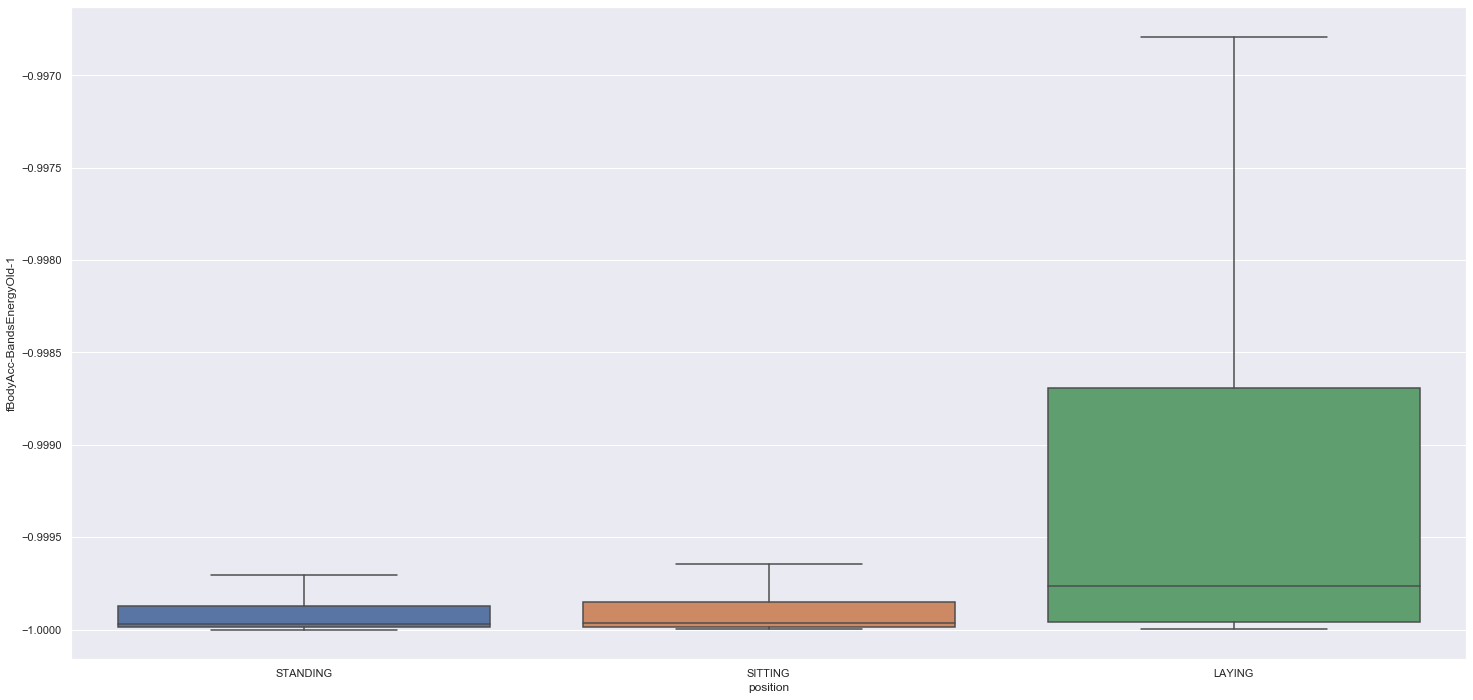

In [100]:
sns.boxplot(x='position', y='fBodyAcc-BandsEnergyOld-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

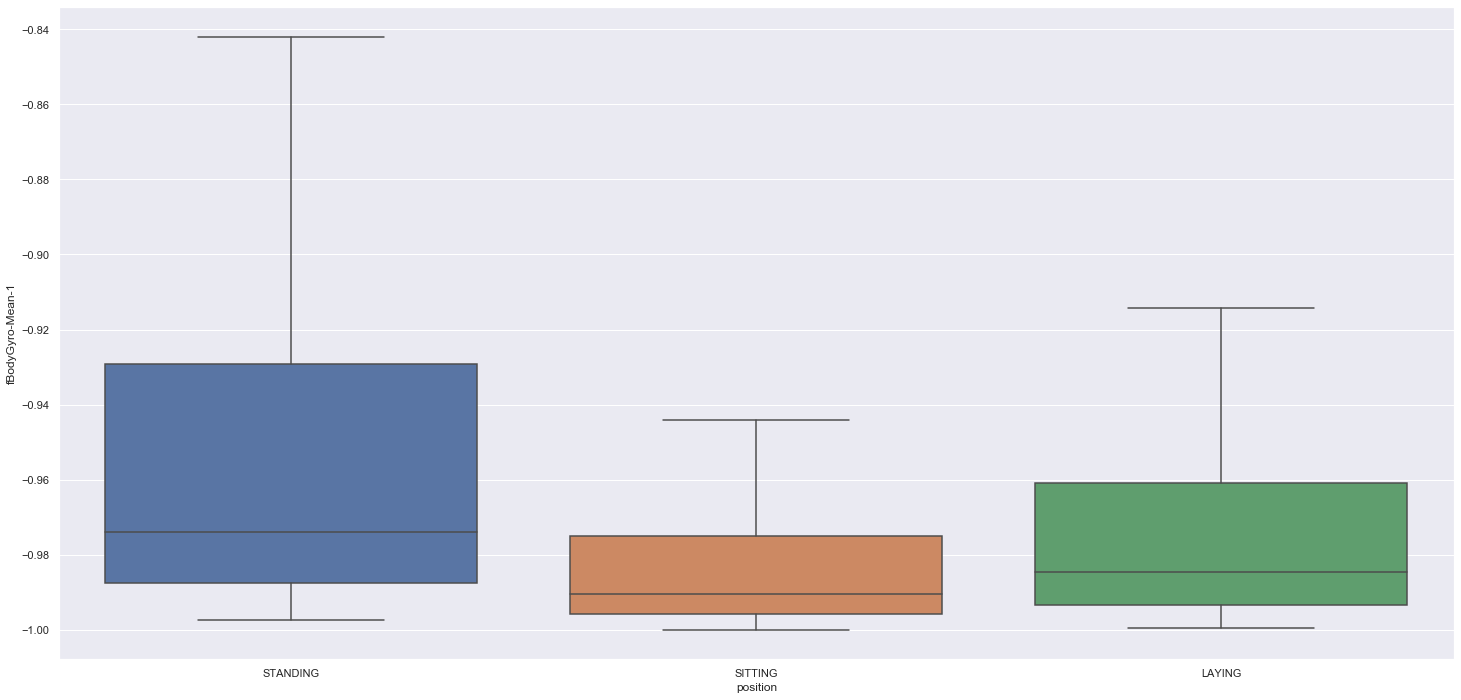

In [101]:
sns.boxplot(x='position', y='fBodyGyro-Mean-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

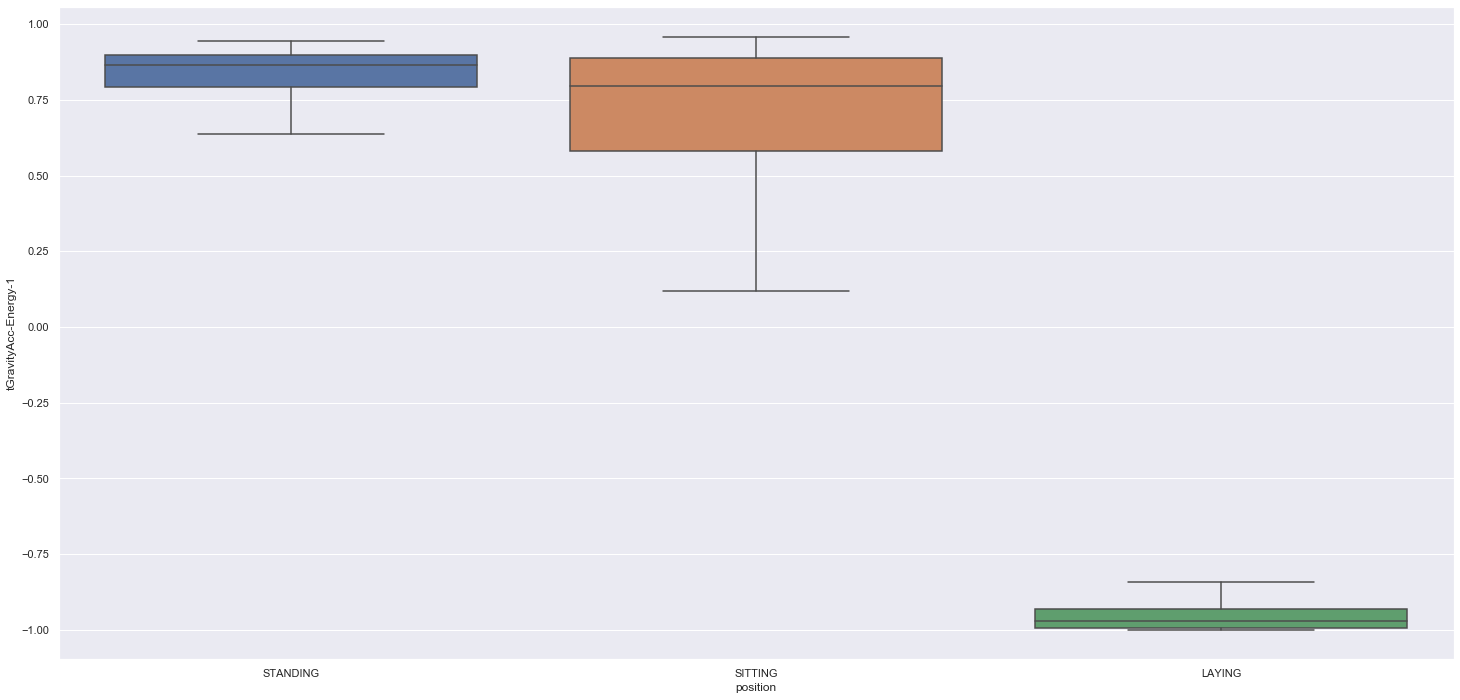

In [102]:
sns.boxplot(x='position', y='tGravityAcc-Energy-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

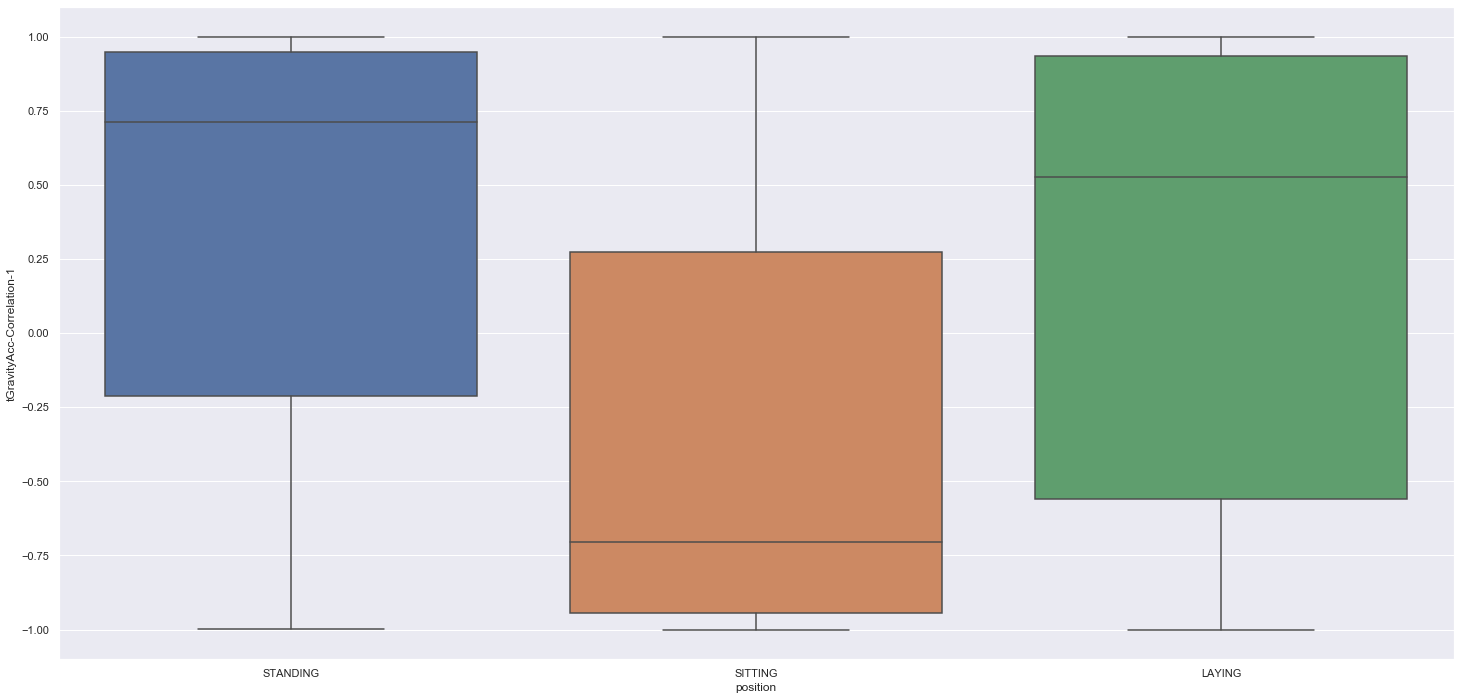

In [103]:
sns.boxplot(x='position', y='tGravityAcc-Correlation-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

### H5. Analyzing Between Postural Transitions.
**Transition -** STAND TO SIT, SIT TO STAND, STAND TO LIE, LIE TO SIT, SIT TO LIE and LIE TO STAND

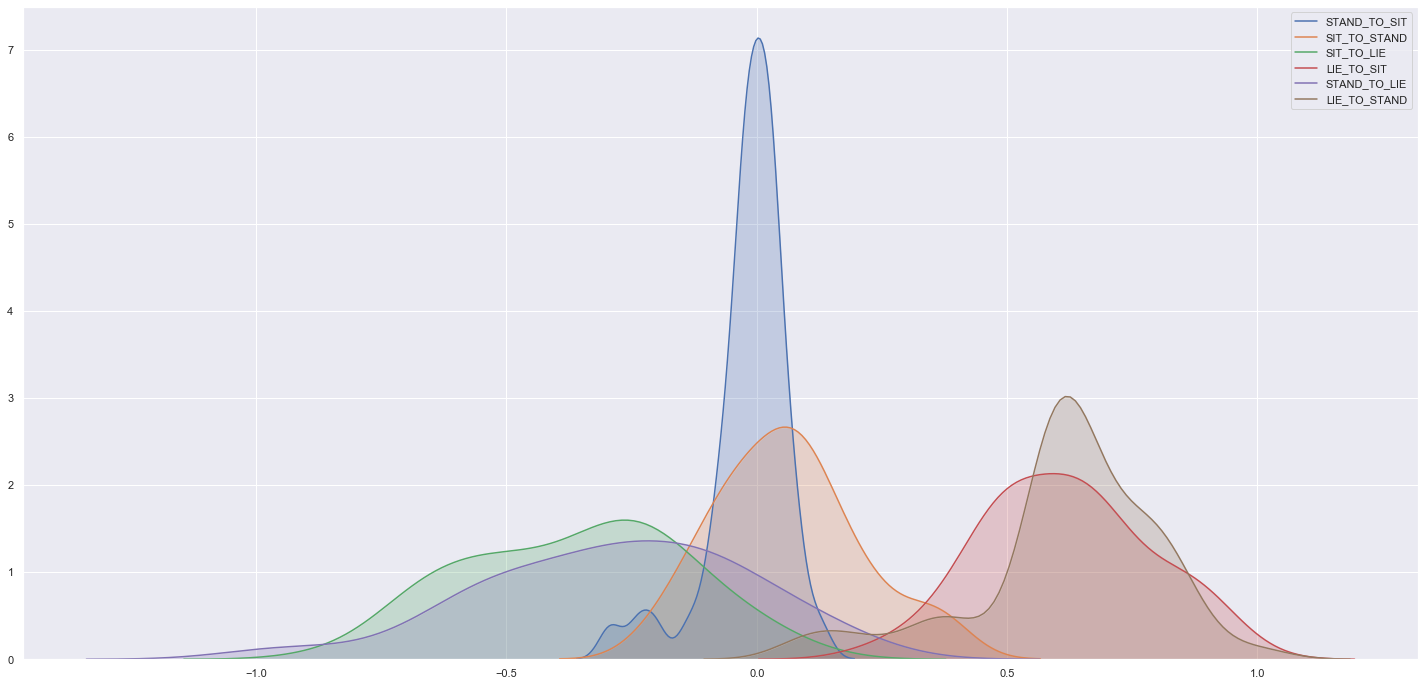

In [104]:
sns.kdeplot( df51[df51['position'] == 'STAND_TO_SIT']['tBodyAcc-Mean-1'], label='STAND_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_STAND']['tBodyAcc-Mean-1'], label='SIT_TO_STAND', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_LIE']['tBodyAcc-Mean-1'], label='SIT_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_SIT']['tBodyAcc-Mean-1'], label='LIE_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_LIE']['tBodyAcc-Mean-1'], label='STAND_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_STAND']['tBodyAcc-Mean-1'], label='LIE_TO_STAND', shade=True  )

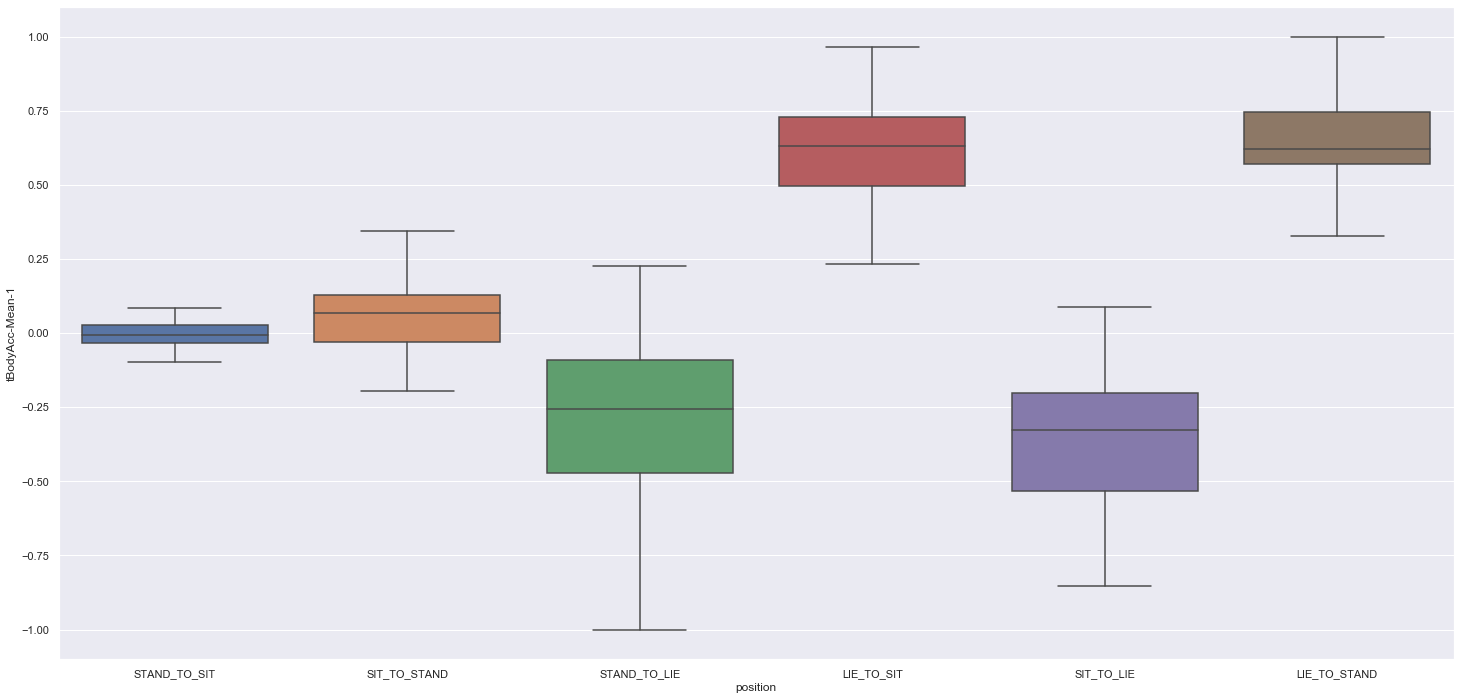

In [105]:
sns.boxplot(x='position', y='tBodyAcc-Mean-1',data=df51[(df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND') ], showfliers=False)

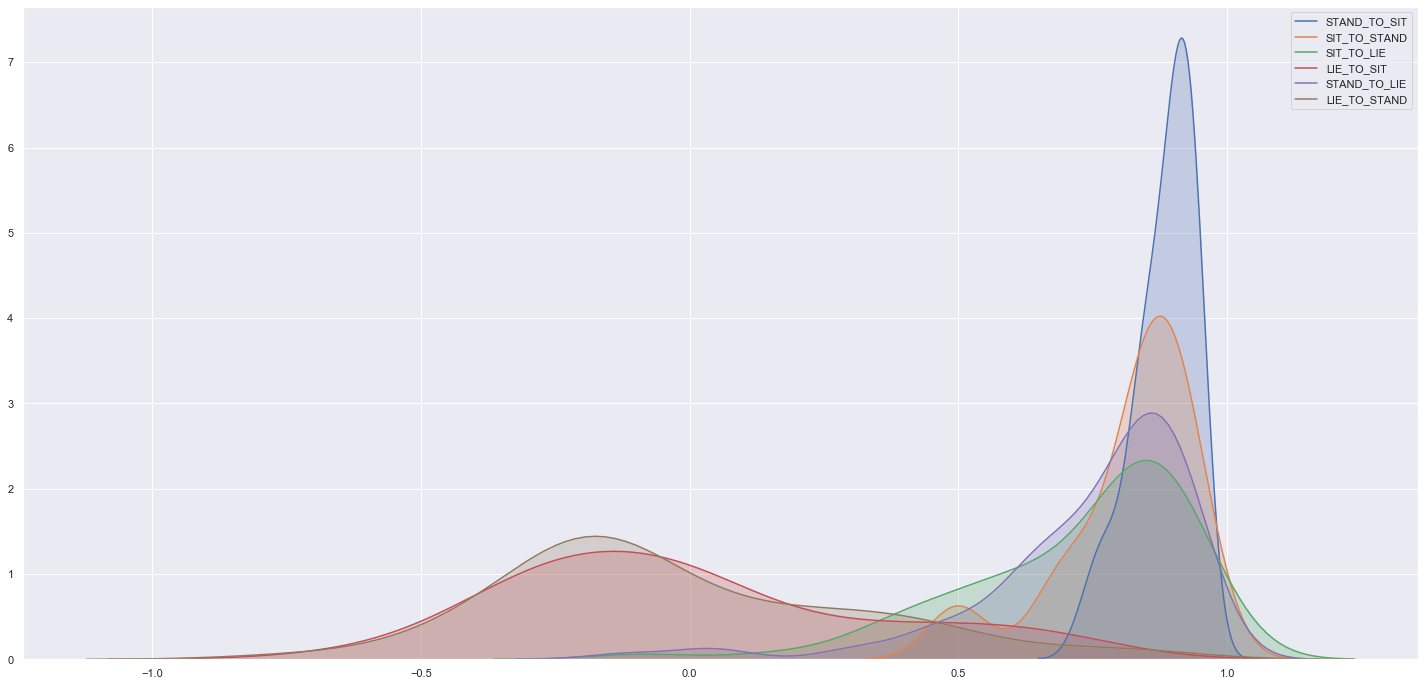

In [106]:
sns.kdeplot( df51[df51['position'] == 'STAND_TO_SIT']['tGravityAcc-Mean-1'], label='STAND_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_STAND']['tGravityAcc-Mean-1'], label='SIT_TO_STAND', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_LIE']['tGravityAcc-Mean-1'], label='SIT_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_SIT']['tGravityAcc-Mean-1'], label='LIE_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_LIE']['tGravityAcc-Mean-1'], label='STAND_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_STAND']['tGravityAcc-Mean-1'], label='LIE_TO_STAND', shade=True  )

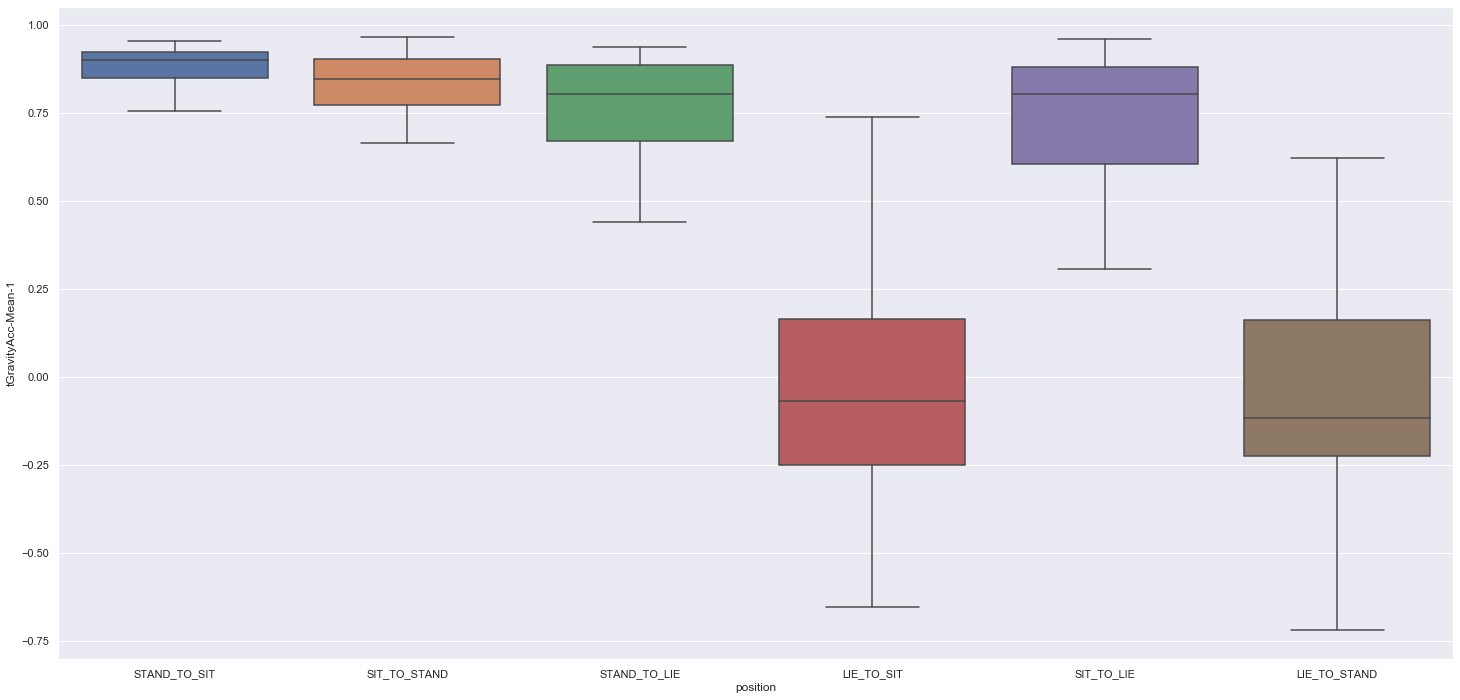

In [107]:
sns.boxplot(x='position', y='tGravityAcc-Mean-1',data=df51[(df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND') ], showfliers=False)

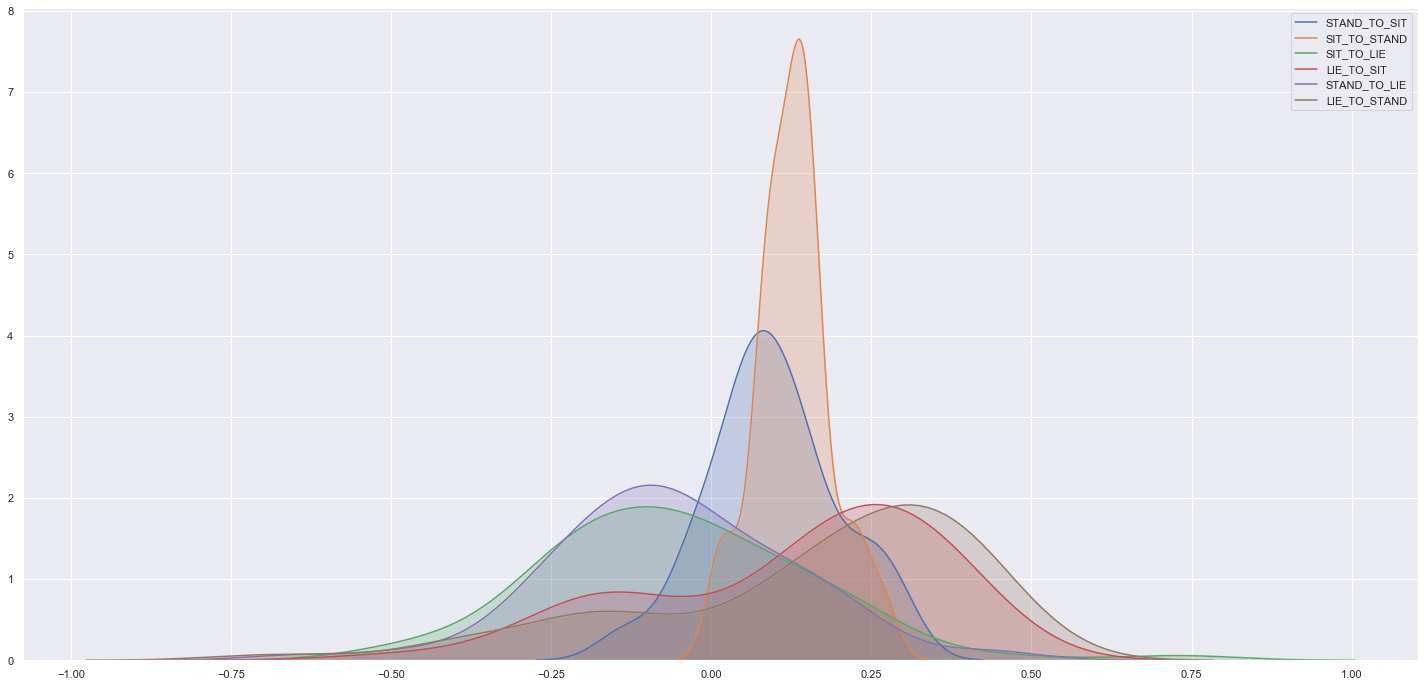

In [108]:
sns.kdeplot( df51[df51['position'] == 'STAND_TO_SIT']['tBodyAccJerk-Mean-1'], label='STAND_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_STAND']['tBodyAccJerk-Mean-1'], label='SIT_TO_STAND', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_LIE']['tBodyAccJerk-Mean-1'], label='SIT_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_SIT']['tBodyAccJerk-Mean-1'], label='LIE_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_LIE']['tBodyAccJerk-Mean-1'], label='STAND_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_STAND']['tBodyAccJerk-Mean-1'], label='LIE_TO_STAND', shade=True  )

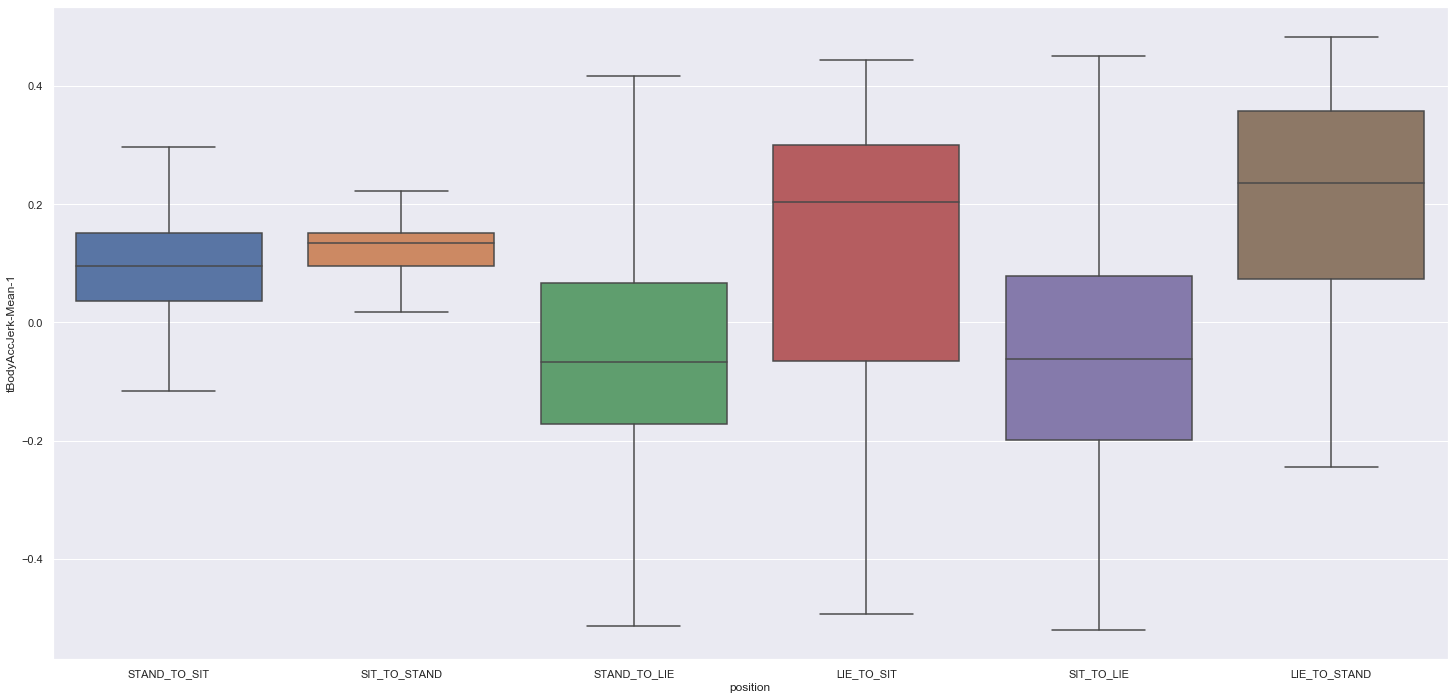

In [109]:
sns.boxplot(x='position', y='tBodyAccJerk-Mean-1',data=df51[(df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND') ], showfliers=False)

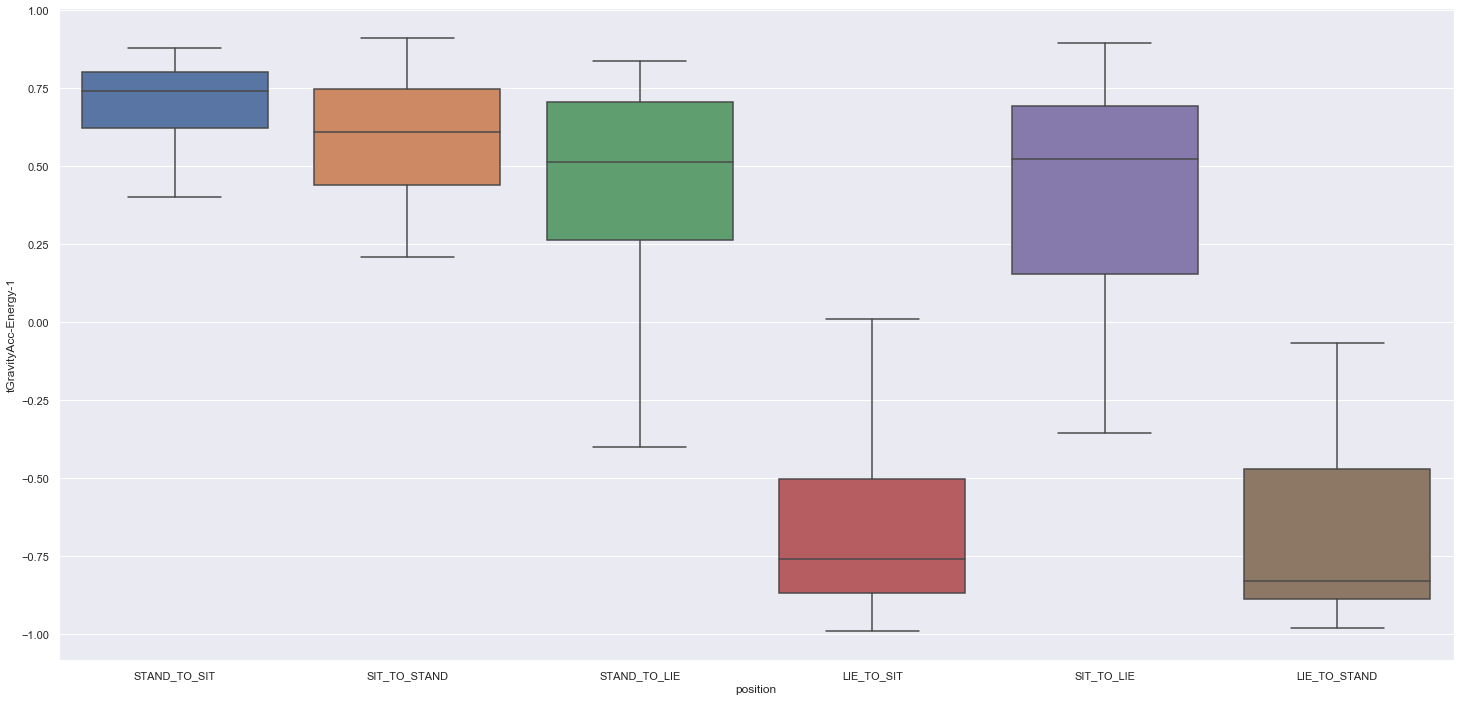

In [110]:
sns.boxplot(x='position', y='tGravityAcc-Energy-1',data=df51[(df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND') ], showfliers=False)

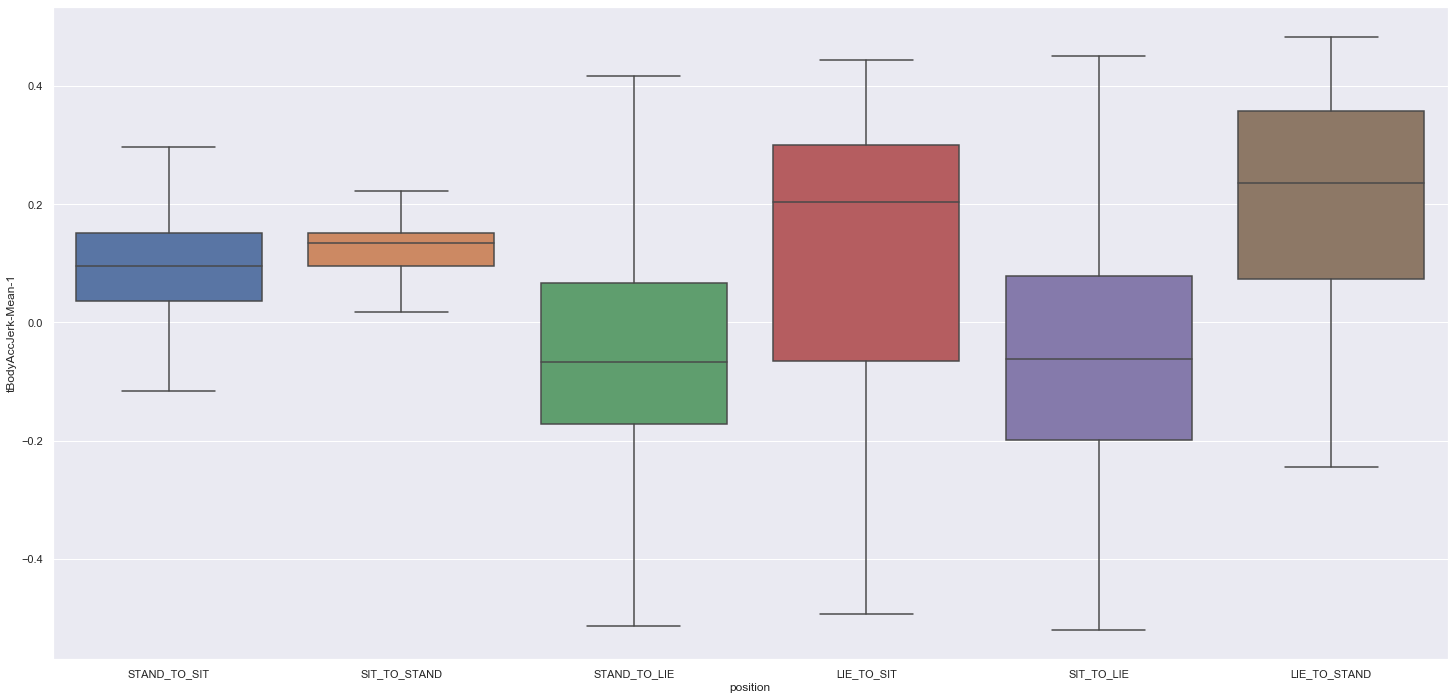

In [111]:
sns.boxplot(x='position', y='tBodyAccJerk-Mean-1',data=df51[(df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND') ], showfliers=False)

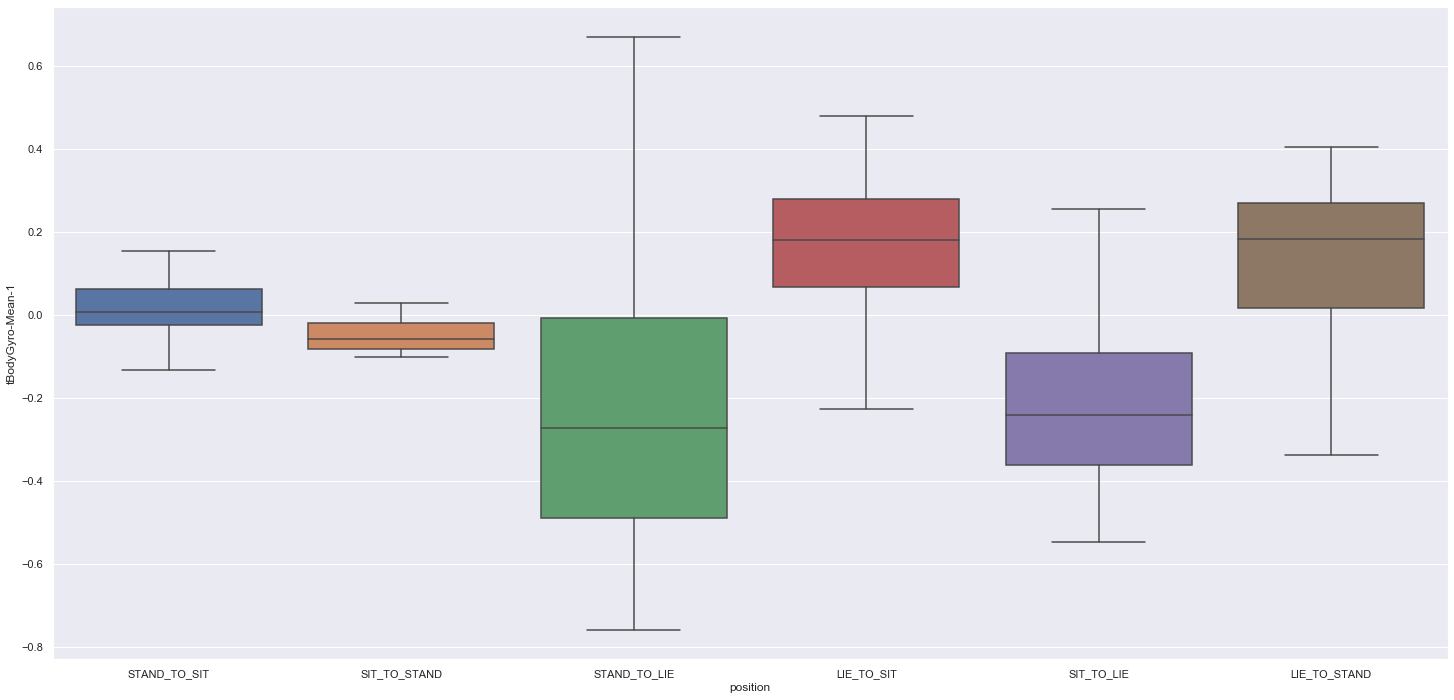

In [112]:
sns.boxplot(x='position', y='tBodyGyro-Mean-1',data=df51[(df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND') ], showfliers=False)

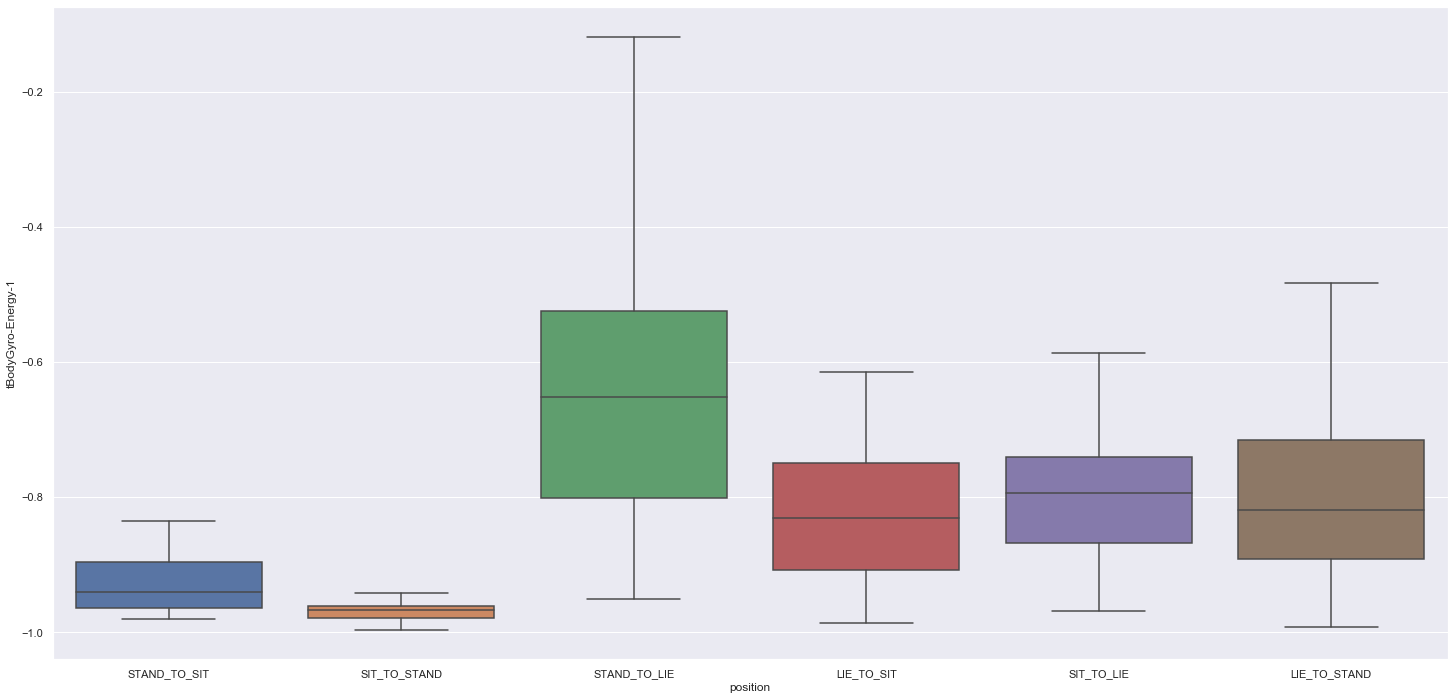

In [113]:
sns.boxplot(x='position', y='tBodyGyro-Energy-1',data=df51[(df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND') ], showfliers=False)

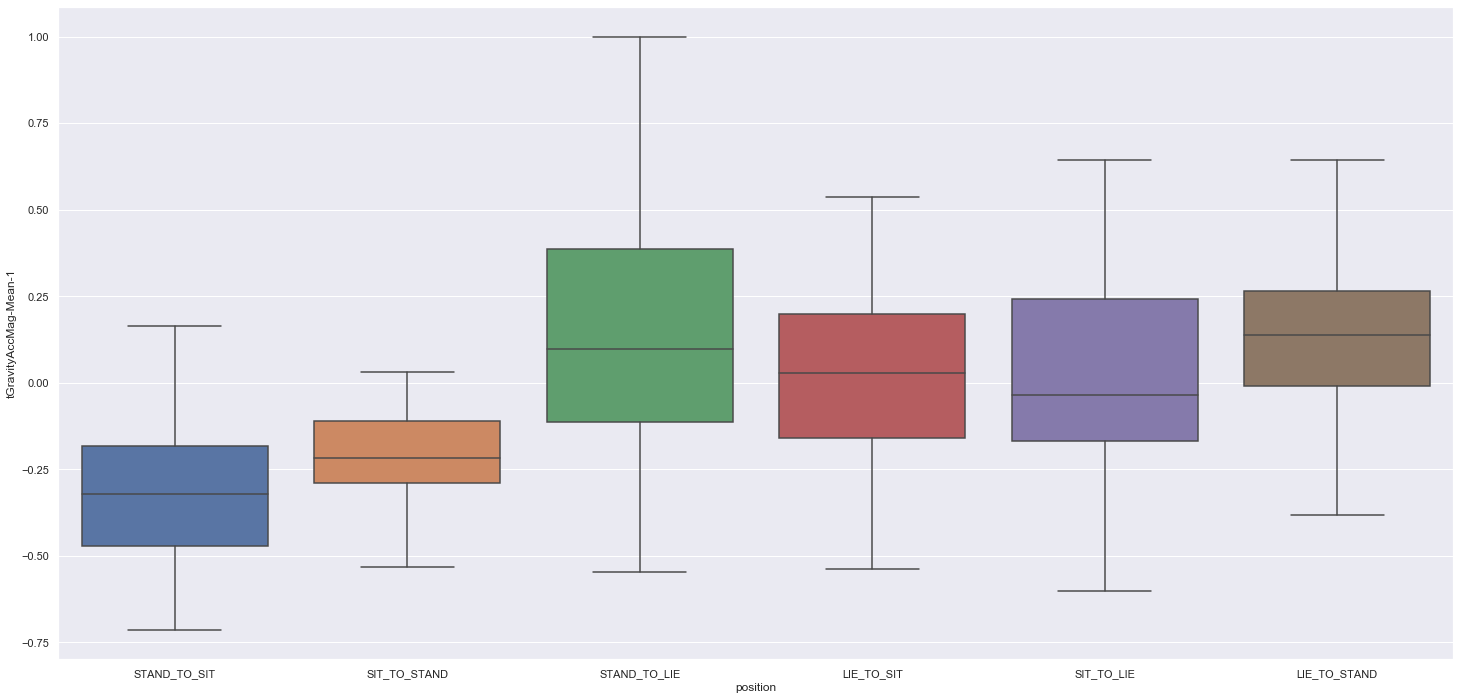

In [114]:
sns.boxplot(x='position', y='tGravityAccMag-Mean-1',data=df51[(df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND') ], showfliers=False)

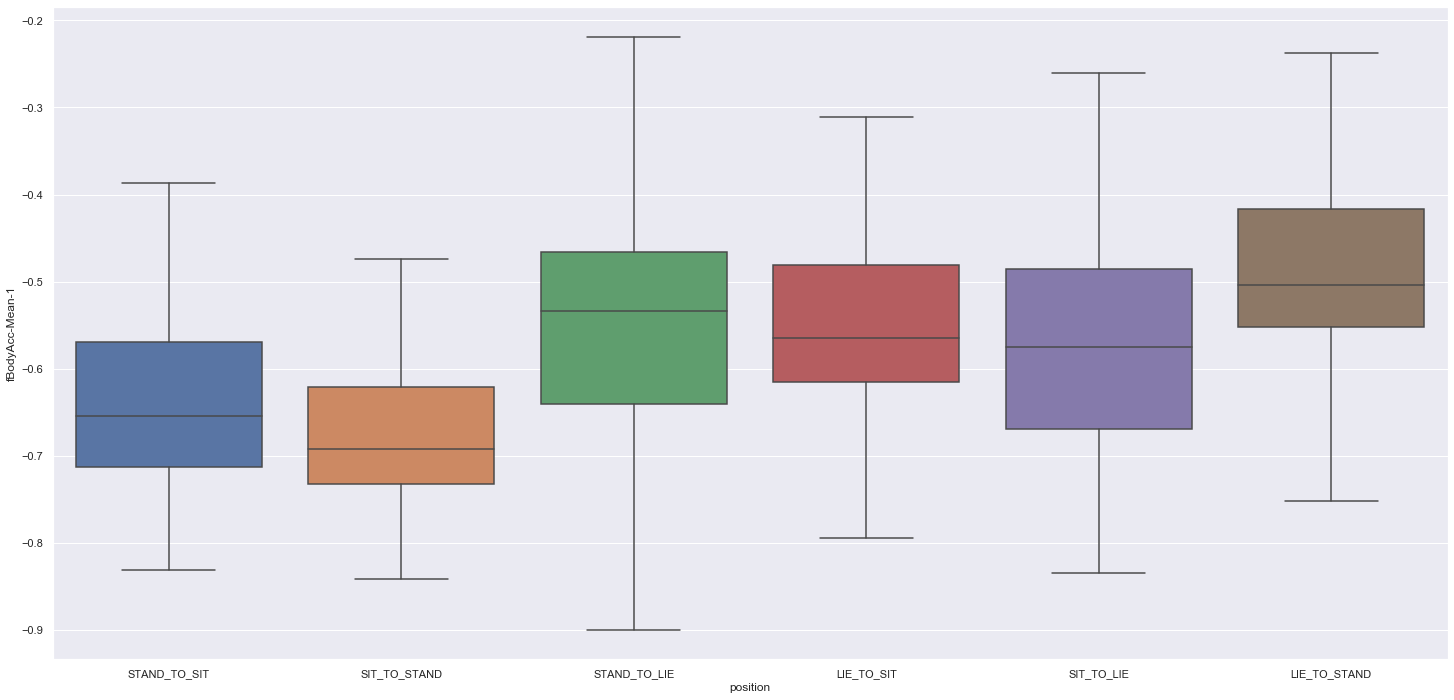

In [115]:
sns.boxplot(x='position', y='fBodyAcc-Mean-1',data=df51[(df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND') ], showfliers=False)

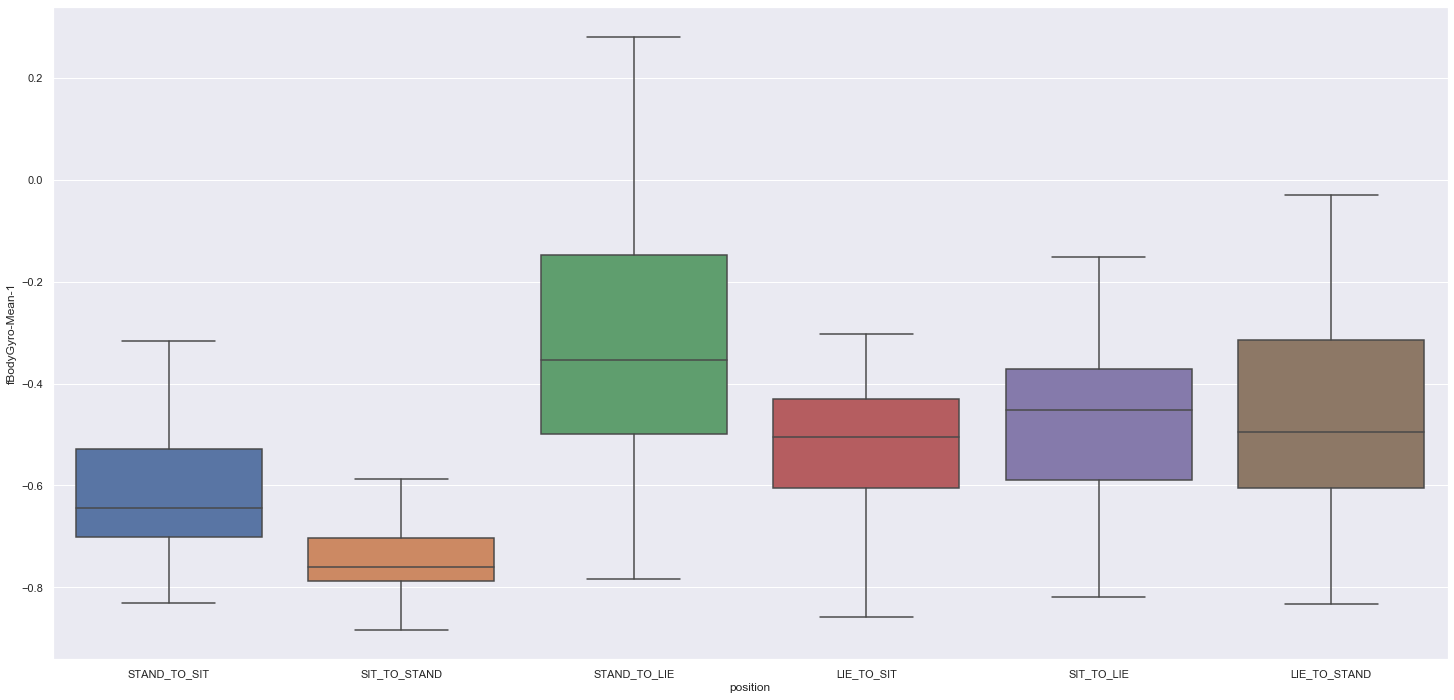

In [116]:
sns.boxplot(x='position', y='fBodyGyro-Mean-1',data=df51[(df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND') ], showfliers=False)

### H6. Analyzing Angles between XYZ axis.

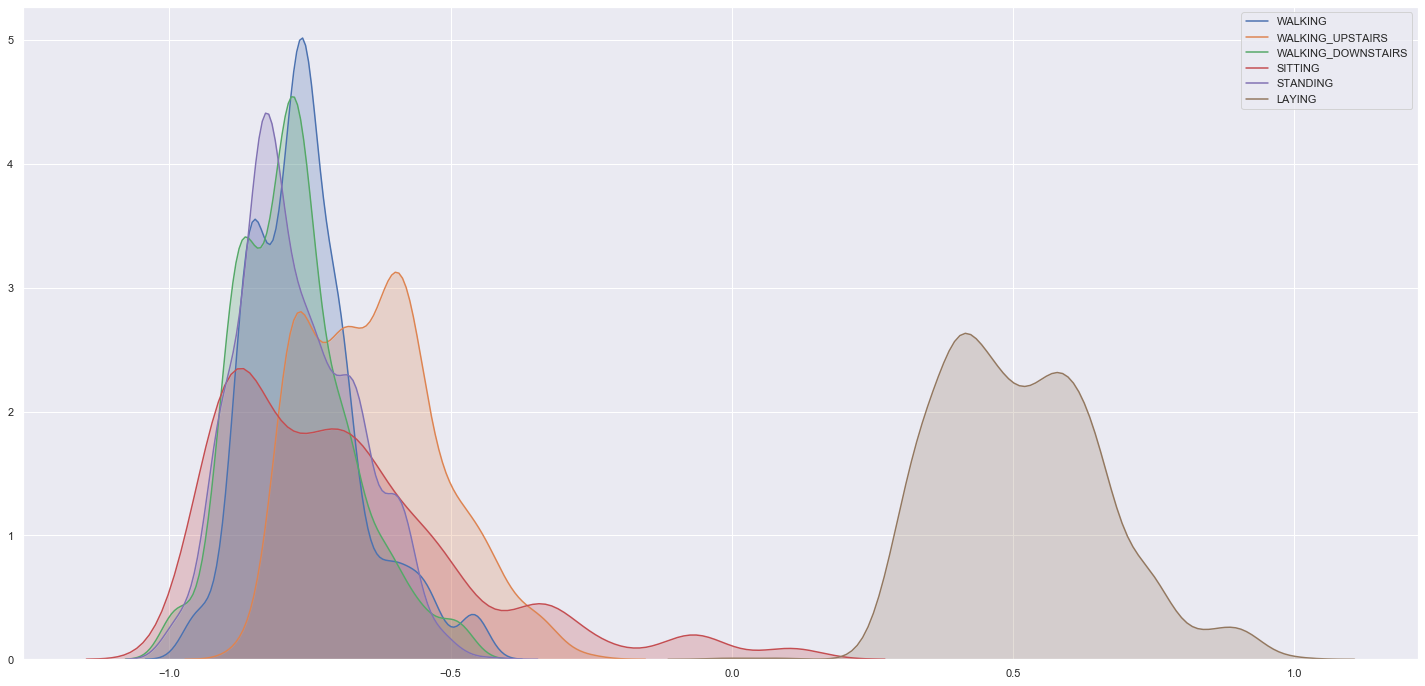

In [117]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tXAxisAcc-AngleWRTGravity-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tXAxisAcc-AngleWRTGravity-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tXAxisAcc-AngleWRTGravity-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'SITTING']['tXAxisAcc-AngleWRTGravity-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tXAxisAcc-AngleWRTGravity-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tXAxisAcc-AngleWRTGravity-1'], label='LAYING', shade=True )

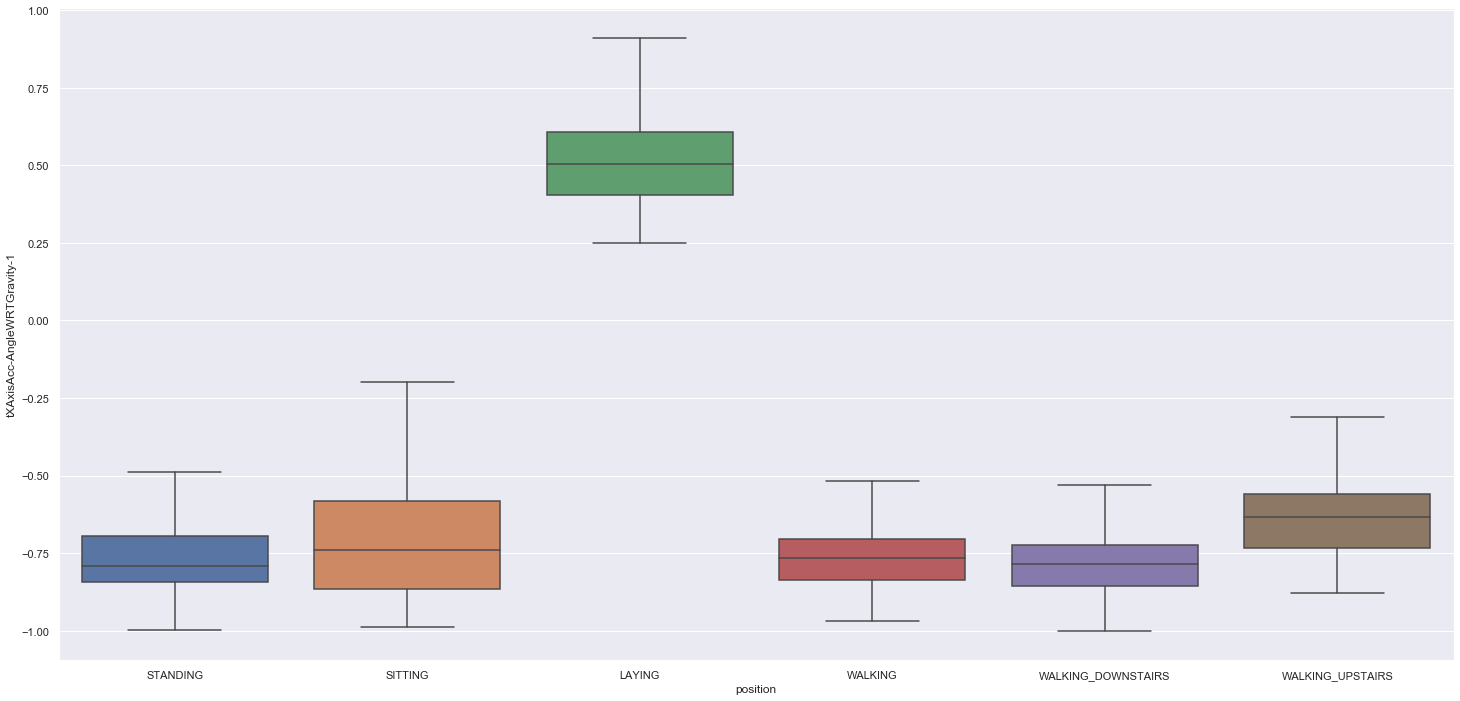

In [118]:
    sns.boxplot(x='position', y='tXAxisAcc-AngleWRTGravity-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

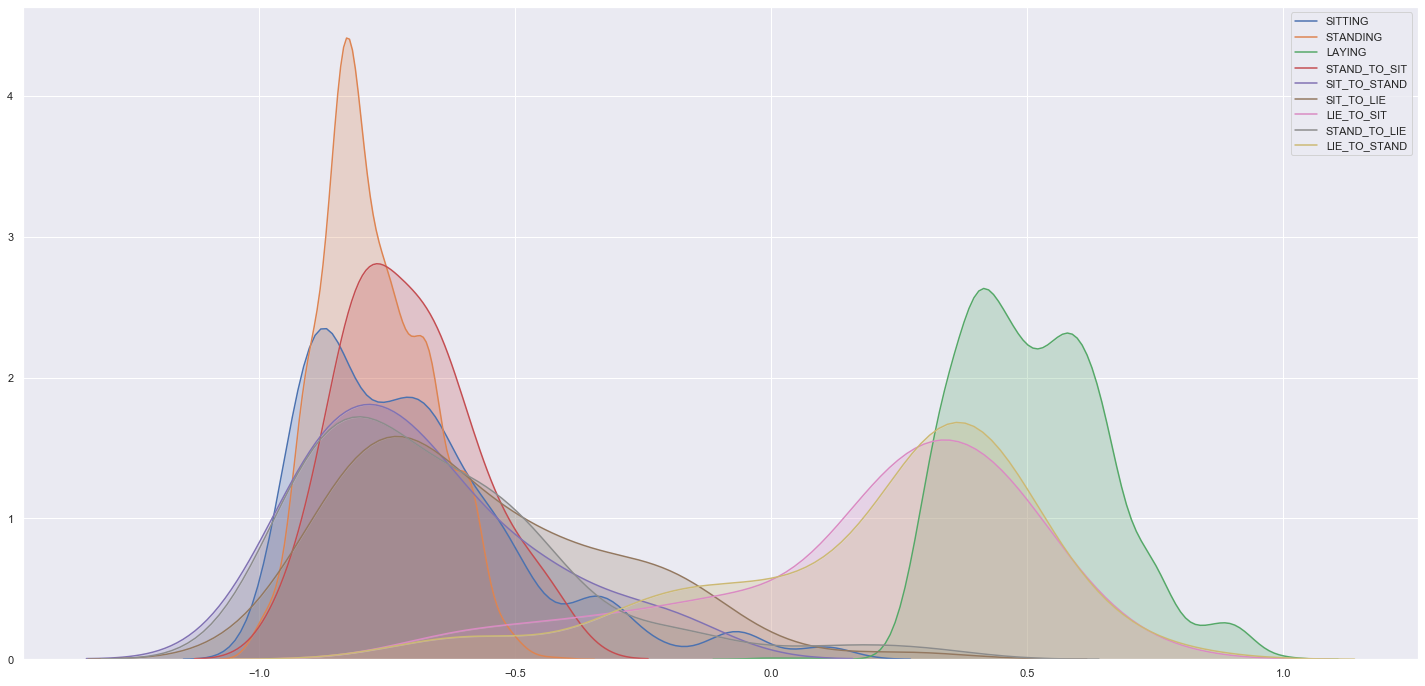

In [119]:
sns.kdeplot( df51[df51['position'] == 'SITTING']['tXAxisAcc-AngleWRTGravity-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tXAxisAcc-AngleWRTGravity-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tXAxisAcc-AngleWRTGravity-1'], label='LAYING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_SIT']['tXAxisAcc-AngleWRTGravity-1'], label='STAND_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_STAND']['tXAxisAcc-AngleWRTGravity-1'], label='SIT_TO_STAND', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_LIE']['tXAxisAcc-AngleWRTGravity-1'], label='SIT_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_SIT']['tXAxisAcc-AngleWRTGravity-1'], label='LIE_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_LIE']['tXAxisAcc-AngleWRTGravity-1'], label='STAND_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_STAND']['tXAxisAcc-AngleWRTGravity-1'], label='LIE_TO_STAND', shade=True  )

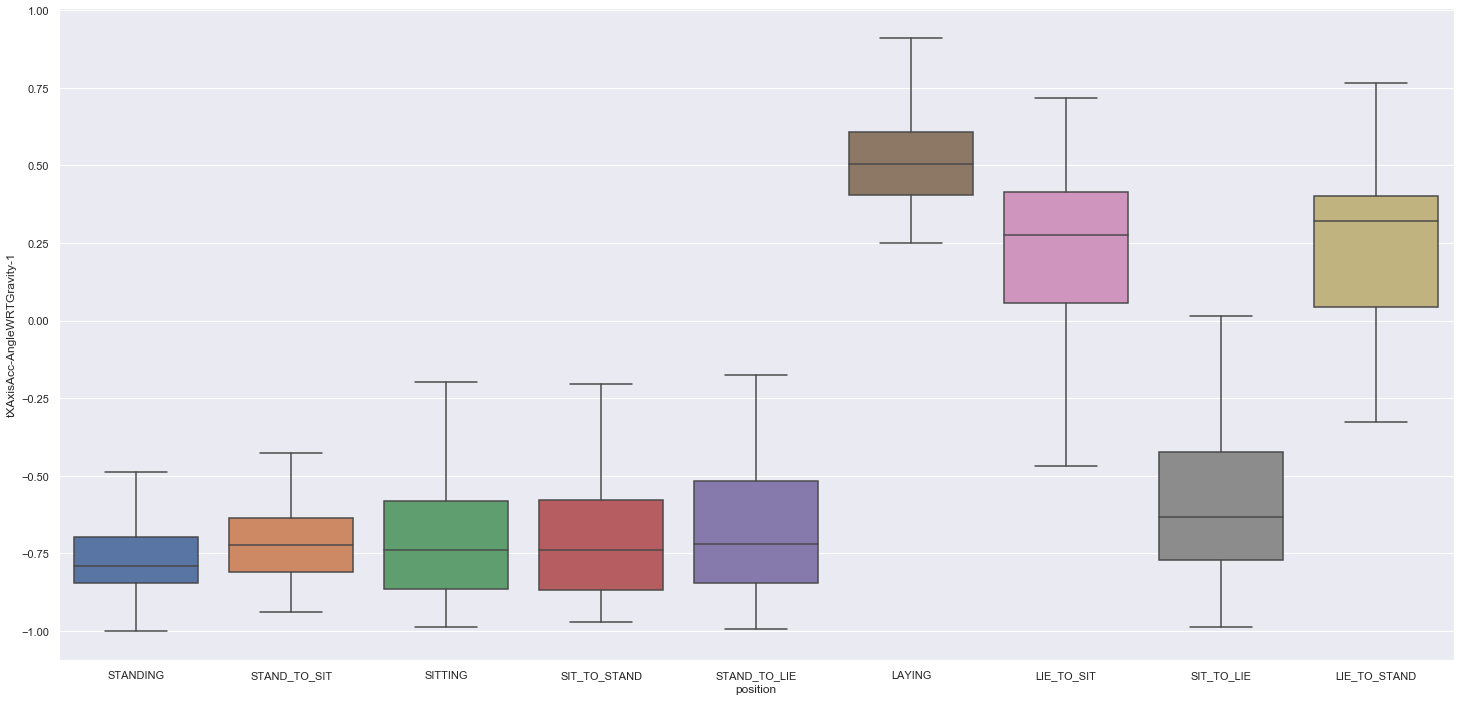

In [120]:
    sns.boxplot(x='position', y='tXAxisAcc-AngleWRTGravity-1',data=df51[(df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') | (df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND')  ], showfliers=False)

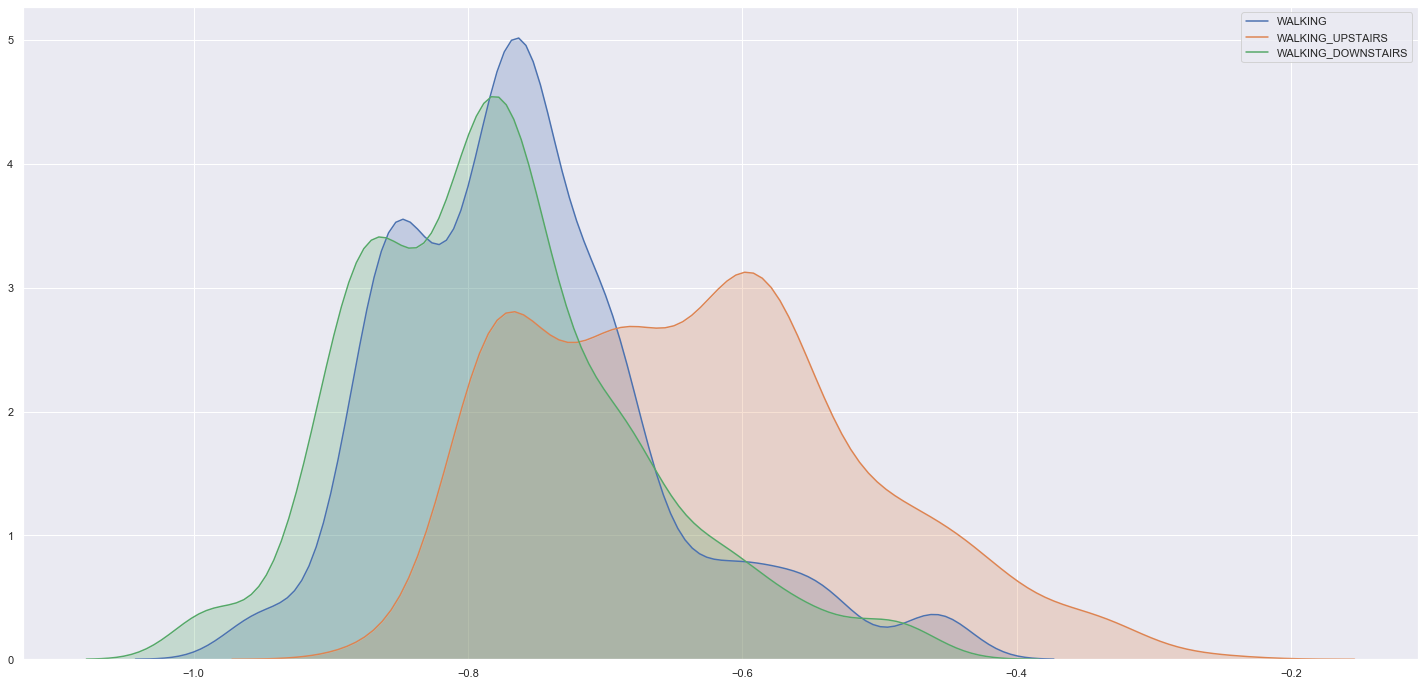

In [121]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tXAxisAcc-AngleWRTGravity-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tXAxisAcc-AngleWRTGravity-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tXAxisAcc-AngleWRTGravity-1'], label='WALKING_DOWNSTAIRS', shade=True )

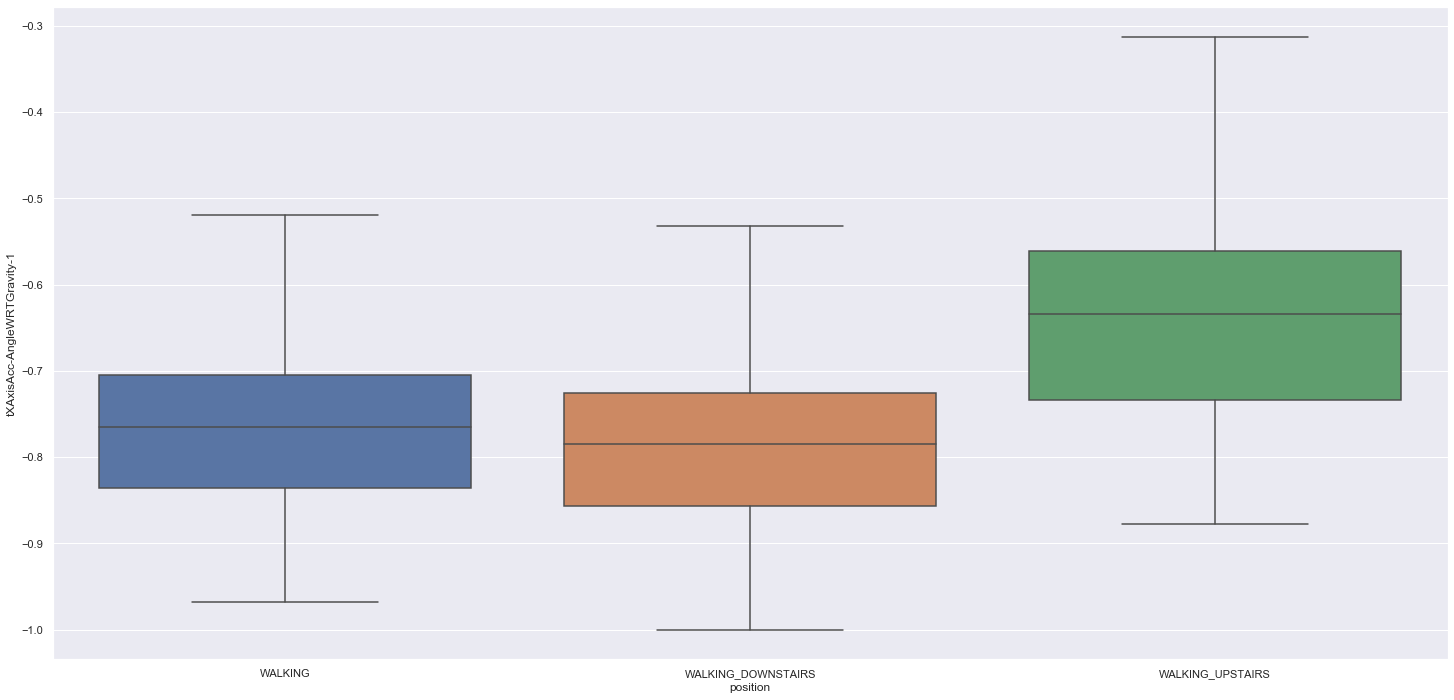

In [122]:
    sns.boxplot(x='position', y='tXAxisAcc-AngleWRTGravity-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') ], showfliers=False)

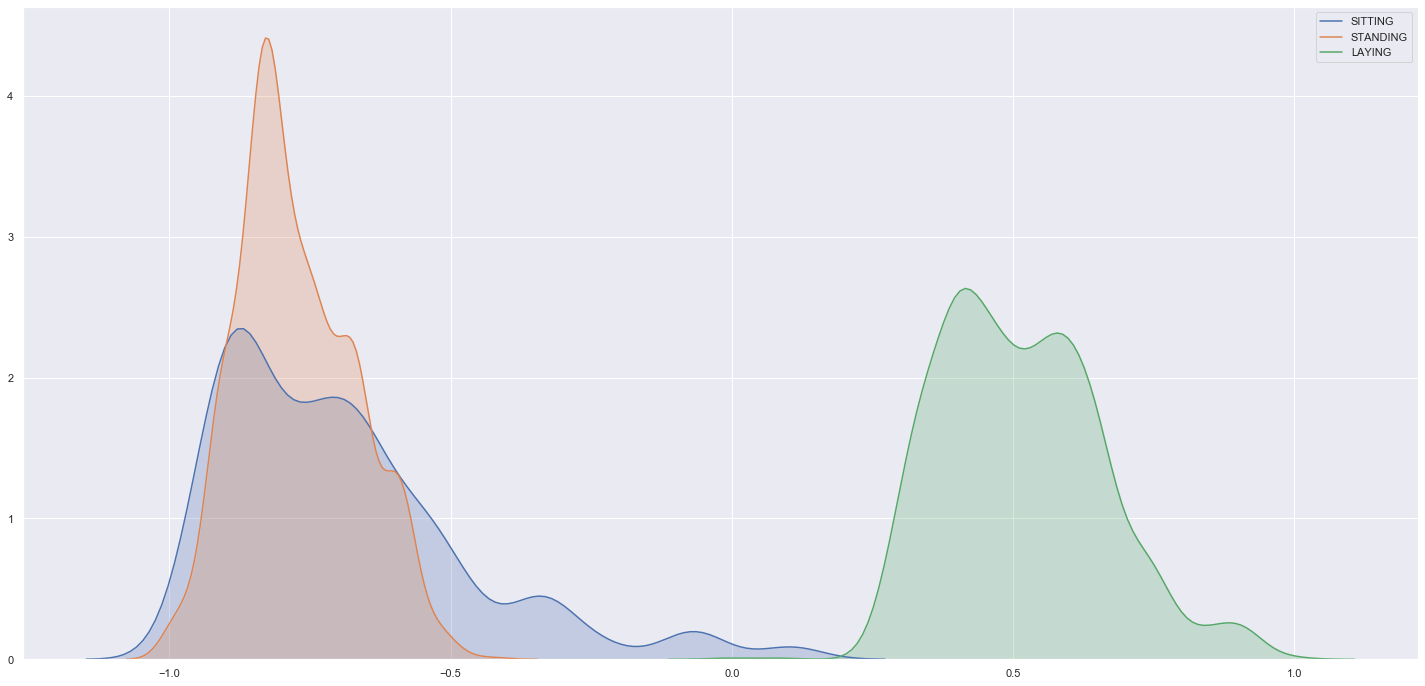

In [123]:
sns.kdeplot( df51[df51['position'] == 'SITTING']['tXAxisAcc-AngleWRTGravity-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tXAxisAcc-AngleWRTGravity-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tXAxisAcc-AngleWRTGravity-1'], label='LAYING', shade=True )

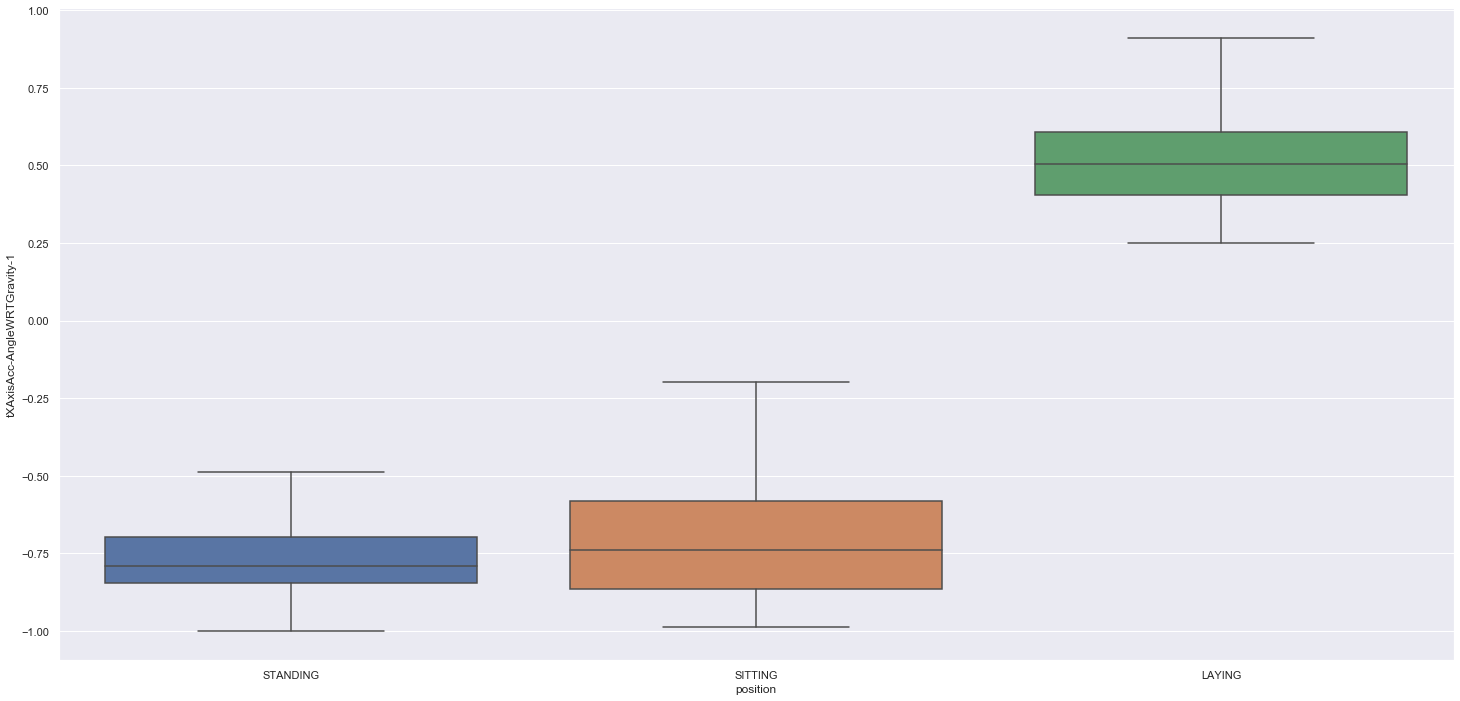

In [124]:
sns.boxplot(x='position', y='tXAxisAcc-AngleWRTGravity-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

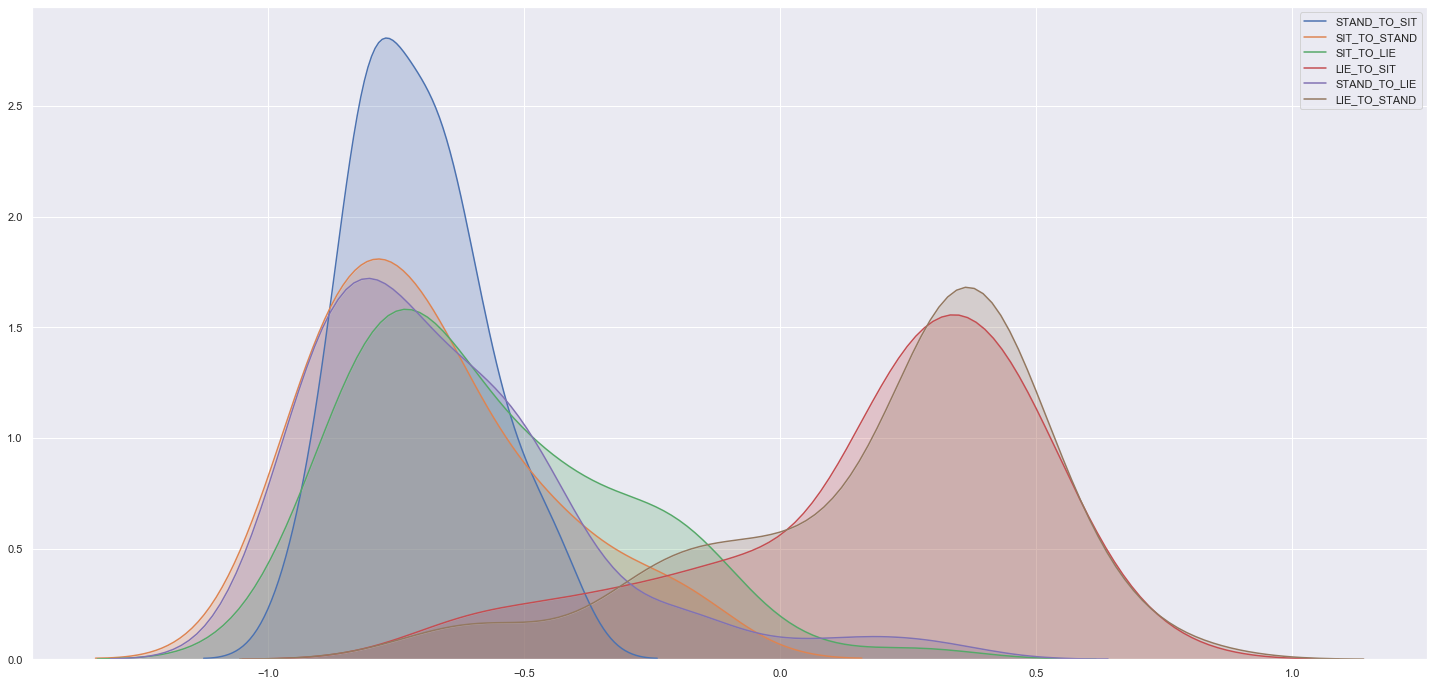

In [125]:
sns.kdeplot( df51[df51['position'] == 'STAND_TO_SIT']['tXAxisAcc-AngleWRTGravity-1'], label='STAND_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_STAND']['tXAxisAcc-AngleWRTGravity-1'], label='SIT_TO_STAND', shade=True  )
sns.kdeplot( df51[df51['position'] == 'SIT_TO_LIE']['tXAxisAcc-AngleWRTGravity-1'], label='SIT_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_SIT']['tXAxisAcc-AngleWRTGravity-1'], label='LIE_TO_SIT', shade=True  )
sns.kdeplot( df51[df51['position'] == 'STAND_TO_LIE']['tXAxisAcc-AngleWRTGravity-1'], label='STAND_TO_LIE', shade=True  )
sns.kdeplot( df51[df51['position'] == 'LIE_TO_STAND']['tXAxisAcc-AngleWRTGravity-1'], label='LIE_TO_STAND', shade=True  )

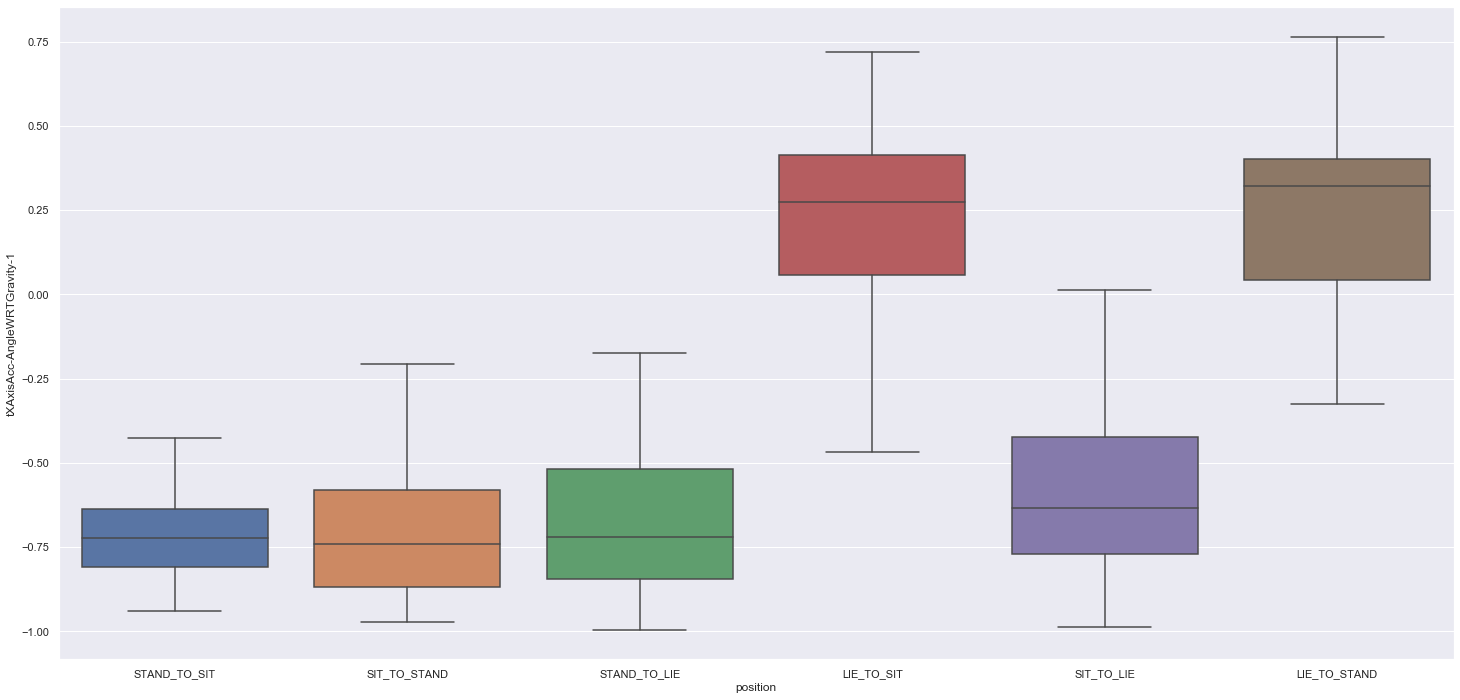

In [126]:
sns.boxplot(x='position', y='tXAxisAcc-AngleWRTGravity-1',data=df51[(df51['position']=='STAND_TO_SIT') | (df51['position']=='SIT_TO_STAND') | (df51['position']=='SIT_TO_LIE') | (df51['position']=='LIE_TO_SIT') | (df51['position']=='STAND_TO_LIE') | (df51['position']=='LIE_TO_STAND') ], showfliers=False)

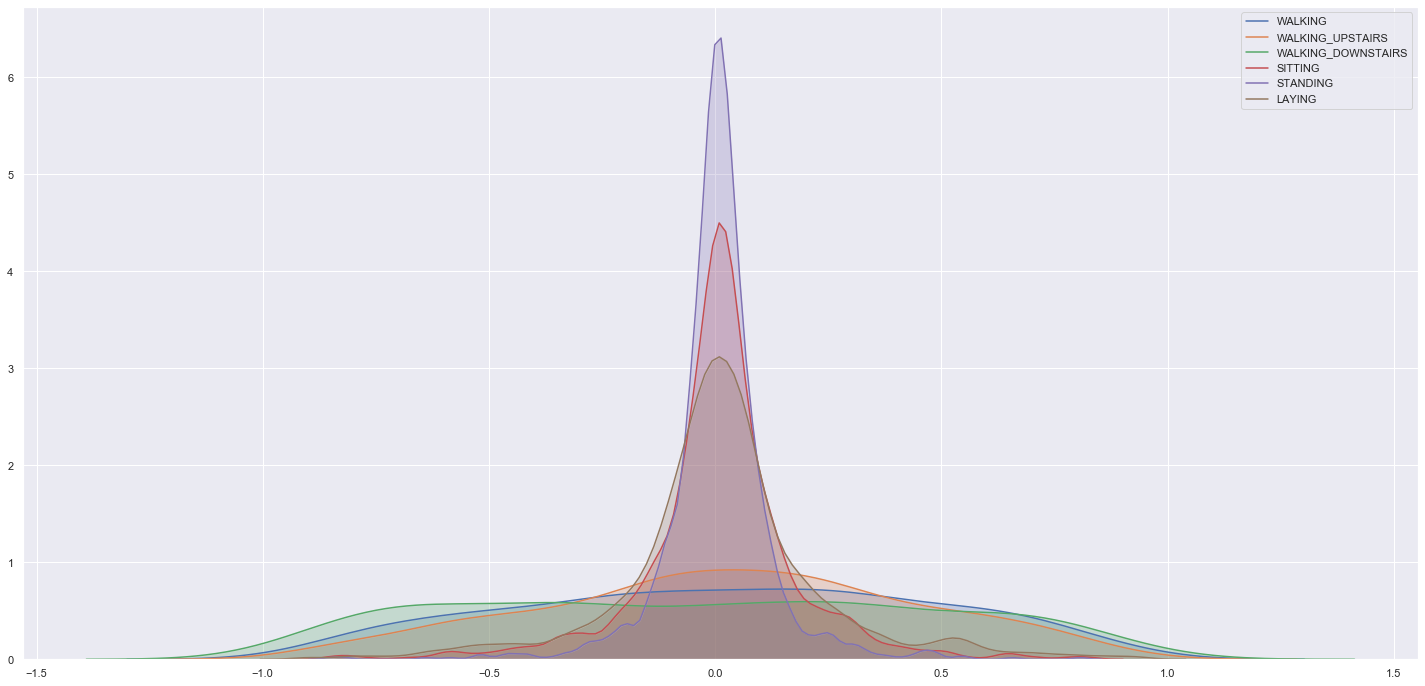

In [127]:
sns.kdeplot( df51[df51['position'] == 'WALKING']['tBodyAcc-AngleWRTGravity-1'], label='WALKING', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_UPSTAIRS']['tBodyAcc-AngleWRTGravity-1'], label='WALKING_UPSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'WALKING_DOWNSTAIRS']['tBodyAcc-AngleWRTGravity-1'], label='WALKING_DOWNSTAIRS', shade=True )
sns.kdeplot( df51[df51['position'] == 'SITTING']['tBodyAcc-AngleWRTGravity-1'], label='SITTING', shade=True )
sns.kdeplot( df51[df51['position'] == 'STANDING']['tBodyAcc-AngleWRTGravity-1'], label='STANDING', shade=True )
sns.kdeplot( df51[df51['position'] == 'LAYING']['tBodyAcc-AngleWRTGravity-1'], label='LAYING', shade=True )

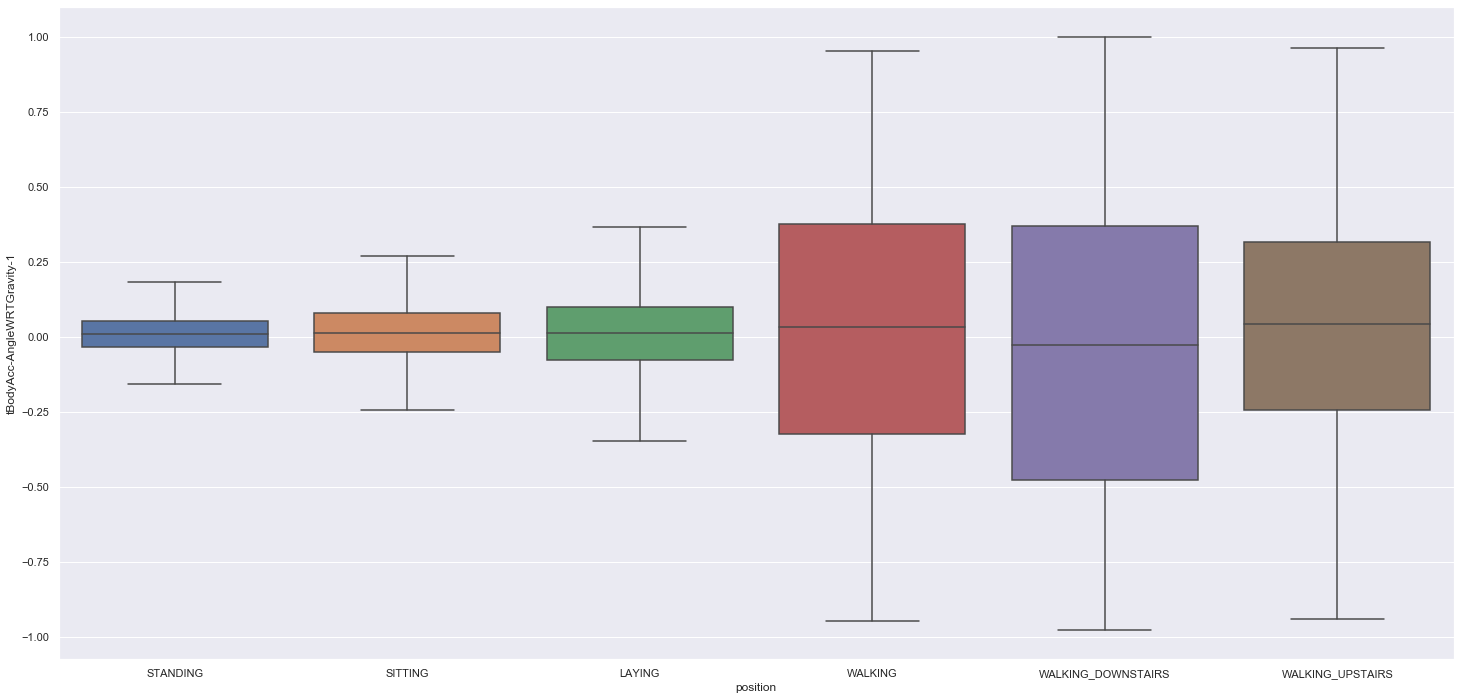

In [128]:
    sns.boxplot(x='position', y='tBodyAcc-AngleWRTGravity-1',data=df51[(df51['position']=='WALKING') | (df51['position']=='WALKING_UPSTAIRS') | (df51['position']=='WALKING_DOWNSTAIRS') | (df51['position']=='SITTING') | (df51['position']=='STANDING') | (df51['position']=='LAYING') ], showfliers=False)

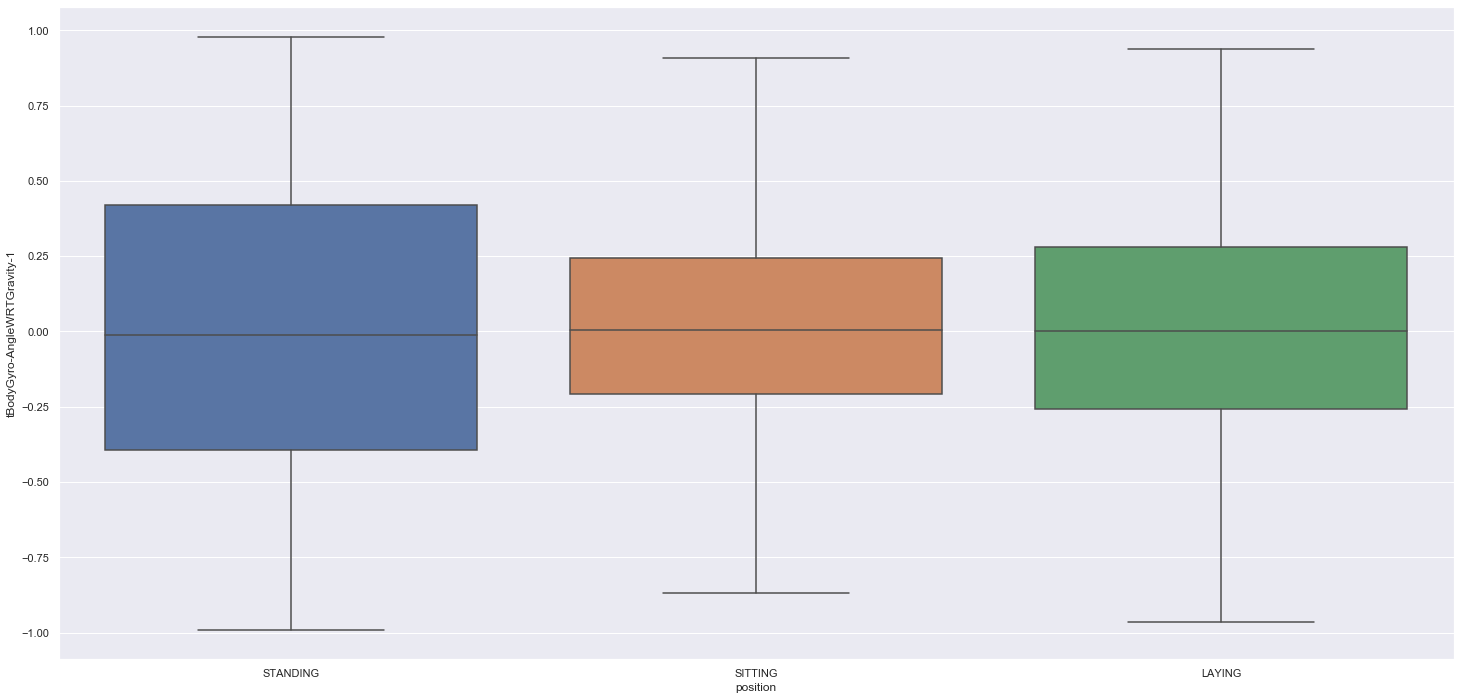

In [129]:
sns.boxplot(x='position', y='tBodyGyro-AngleWRTGravity-1',data=df51[(df51['position']=='STANDING') | (df51['position']=='SITTING') | (df51['position']=='LAYING') ], showfliers=False)

## 5.2 Using t-SNE to Visualize Better the Data

In [130]:
X_for_tsne = df51.drop(['subject', 'position'], axis=1)

In [131]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

Wall time: 0 ns
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7767 samples in 0.870s...
[t-SNE] Computed neighbors for 7767 samples in 49.700s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7767
[t-SNE] Computed conditional probabilities for sample 2000 / 7767
[t-SNE] Computed conditional probabilities for sample 3000 / 7767
[t-SNE] Computed conditional probabilities for sample 4000 / 7767
[t-SNE] Computed conditional probabilities for sample 5000 / 7767
[t-SNE] Computed conditional probabilities for sample 6000 / 7767
[t-SNE] Computed conditional probabilities for sample 7000 / 7767
[t-SNE] Computed conditional probabilities for sample 7767 / 7767
[t-SNE] Mean sigma: 1.423746
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.245598
[t-SNE] KL divergence after 1000 iterations: 1.293984


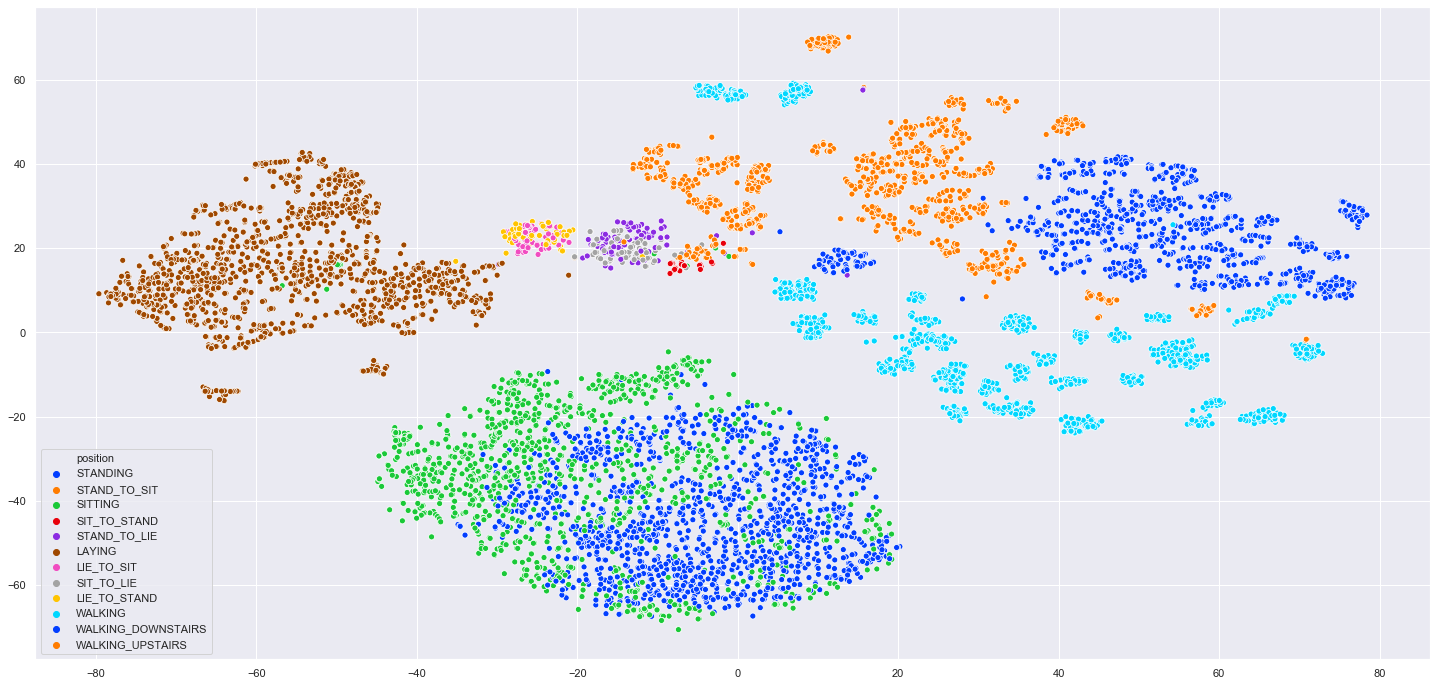

In [132]:
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = df51["position"],palette="bright")

In [133]:
# There aren't categorical attributes to do correlacions.

# 6.0 STEP 06 - DATA PREPARATION

In [134]:
df6 = df43.copy()

In [135]:
# As all features are normalized and bounded within [-1: 1], it will not be necessary to prepare the data for ML algorithms.

# 7.0 STEP 07 - FEATURE SELECTION

In [136]:
X = df6.drop( 'position', axis=1 )
y = df6['position'] 

# split traininset between train and test
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.20, random_state=43, stratify=y )

## 7.1 Boruta as Feature Selection

In [137]:
etc = en.ExtraTreesClassifier( n_jobs=-1 )

# Defines Boruta
boruta = BorutaPy( etc, n_estimators='auto', verbose=2, random_state=42 ).fit( X_train.values, y_train.values.ravel() )

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	561
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	561
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	561
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	561
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	561
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	561
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	561
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	561
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	561
Tentative: 	0
Rejected: 	0


# 8.0 STEP 08 - MACHINE LEARNING MODELING

In [138]:
x_train = X_train
x_test = X_test

**Now I will test some algorithms following in order of increasing in complexity, and in turn, capability.** <br>
**I'm not going to use everyone in each group, but at least one in each and see how they do and, depending on their characteristics, choose the best one to use as the final model in our project.**

**Naive Algorithms:**
- Majority Class
- Minority Class
- Class Priors

**Linear Algorithms:**
- Logistic Regression
- Linear Discriminant Analysis
- Naive Bayes

**Nonlinear Algorithms:**
- Decision Tree
- k-Nearest Neighbors
- Artificial Neural Networks
- Support Vector Machine

**Ensemble Algorithms:**
- Bagged Decision Trees
- Random Forest
- Extra Trees
- Stochastic Gradient Boosting

## 8.1 Baseline Model

In [143]:
import random
position_list = y_test.drop_duplicates().sort_values().tolist()
random_num = x_test.shape[0]
position_weights = df1['position'].value_counts( normalize=True ).sort_index().tolist()

# prediction
yhat_random = random.choices( position_list, k=random_num,
                              weights=position_weights )

### 8.1.1 Baseline Model Performance

Accuracy: 0.07942555685814771
                    precision    recall  f1-score   support

            LAYING      0.077     0.168     0.105       285
        LIE_TO_SIT      0.174     0.014     0.026       285
      LIE_TO_STAND      0.062     0.004     0.007       285
           SITTING      0.077     0.141     0.099       283
        SIT_TO_LIE      0.091     0.011     0.019       284
      SIT_TO_STAND      0.000     0.000     0.000       285
          STANDING      0.076     0.170     0.105       283
      STAND_TO_LIE      0.146     0.021     0.037       285
      STAND_TO_SIT      0.091     0.007     0.013       284
           WALKING      0.098     0.186     0.128       285
WALKING_DOWNSTAIRS      0.064     0.113     0.082       284
  WALKING_UPSTAIRS      0.075     0.120     0.092       284

          accuracy                          0.079      3412
         macro avg      0.086     0.079     0.059      3412
      weighted avg      0.086     0.079     0.059      3412

Kappa S

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

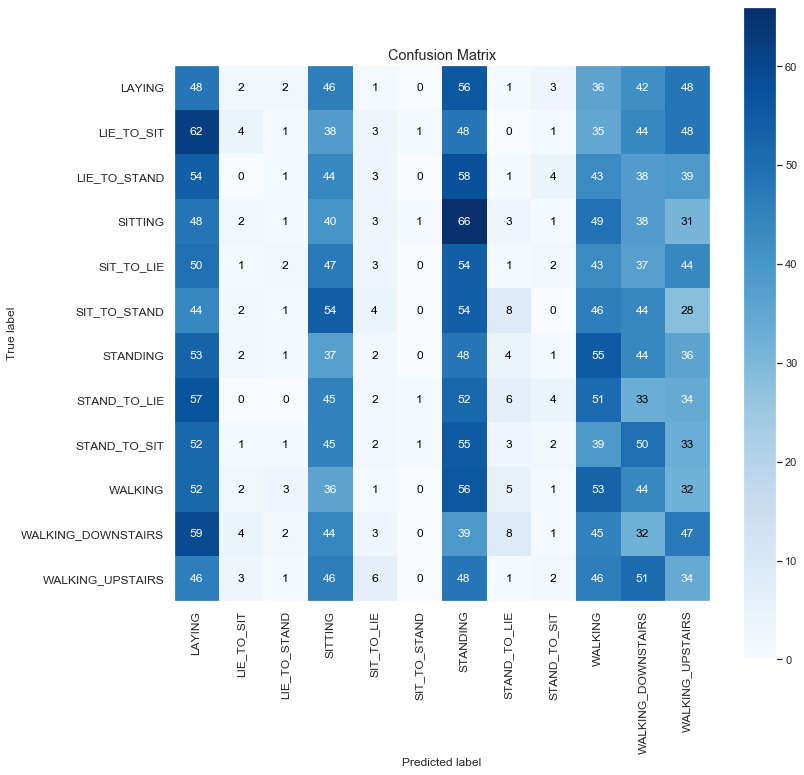

In [144]:
# Accuracy
acc_random = m.accuracy_score( y_test, yhat_random )
print( 'Accuracy: {}'.format( acc_random ) )

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat_random, digits=3 ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat_random ) ) )

# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat_random, normalize=False, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

## 8.2 Model: Logistic Regression

In [140]:
# model definition
model_lg = lm.LogisticRegression( n_jobs=-1, random_state=32 )

# train model
model_lg.fit( x_train, y_train )

LogisticRegression(n_jobs=-1, random_state=32)

### 8.2.1 Logistic Regression Performance

In [145]:
# prediction
yhat = model_lg.predict( x_test )

                    precision    recall  f1-score   support

            LAYING      0.993     0.996     0.995       285
        LIE_TO_SIT      0.990     1.000     0.995       285
      LIE_TO_STAND      0.997     1.000     0.998       285
           SITTING      0.951     0.968     0.960       283
        SIT_TO_LIE      1.000     1.000     1.000       284
      SIT_TO_STAND      1.000     1.000     1.000       285
          STANDING      0.978     0.943     0.960       283
      STAND_TO_LIE      1.000     1.000     1.000       285
      STAND_TO_SIT      0.993     1.000     0.996       284
           WALKING      0.996     0.996     0.996       285
WALKING_DOWNSTAIRS      0.996     1.000     0.998       284
  WALKING_UPSTAIRS      0.996     0.986     0.991       284

          accuracy                          0.991      3412
         macro avg      0.991     0.991     0.991      3412
      weighted avg      0.991     0.991     0.991      3412

Accuracy: 0.9909144196951934
Weighted

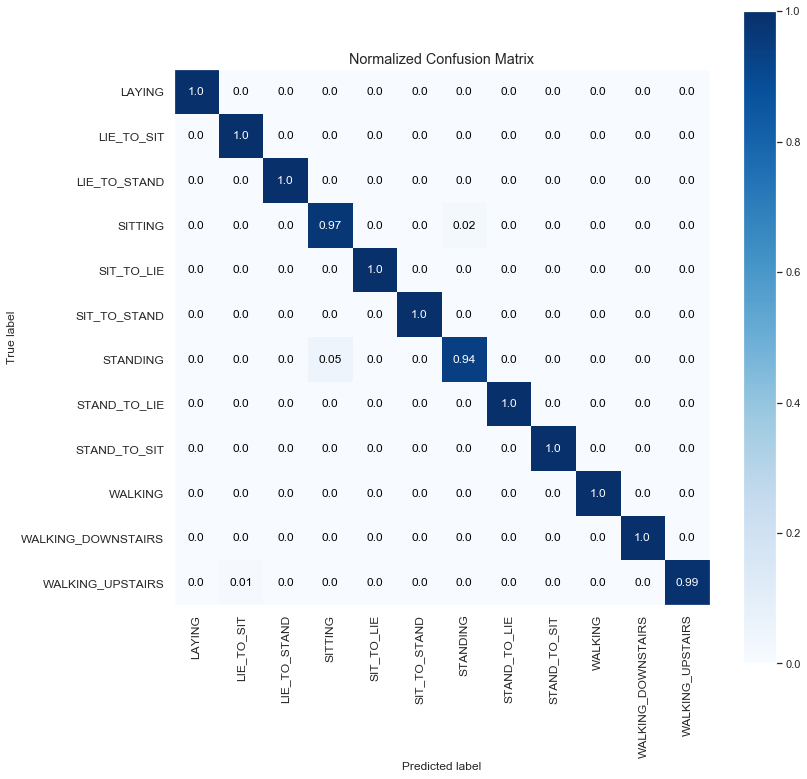

In [146]:
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )

### 8.2.2 Logistic Regression Performance - Cross Validation

In [147]:
# geneate K-Fold
num_fold = 5
kfold = ms.StratifiedKFold( n_splits=num_fold, shuffle=True, random_state=32 )

balanced_acc_list = []
kappa_list = []
weighted_f1_score_list = []
i = 1

for train_ix, val_ix in kfold.split( x_train, y_train ):
    print( 'Fold Number: {}/{}'.format( i, num_fold ) )
    
    # get fold data -
    x_train_fold = x_train.iloc[train_ix]
    x_val_fold = x_train.iloc[val_ix]
    
    y_train_fold = y_train.iloc[train_ix]
    y_val_fold = y_train.iloc[val_ix]
    
    # model definition
    model = lm.LogisticRegression( n_jobs=-1, random_state=32 )

    # train model
    model.fit( x_train_fold, y_train_fold )

    # prediction
    yhat_fold = model.predict( x_val_fold )

    # Balanced Accuracy
    balanced_acc = m.balanced_accuracy_score( y_val_fold, yhat_fold )
    balanced_acc_list.append( balanced_acc )

    # Kappa Metrics
    kappa = m.cohen_kappa_score( y_val_fold, yhat_fold )
    kappa_list.append( kappa )
    
    # Weighted F1-Score
    weighted_f1_score = m.f1_score( y_val_fold, yhat_fold, average='weighted')
    weighted_f1_score_list.append( weighted_f1_score )
    
    i += 1
    
print( 'Avg Balanced Accuracy: {}'.format( np.mean( balanced_acc_list ) ) )
print( 'Avg Weighted F1-Score: {}'.format( np.mean( weighted_f1_score_list ) ) )
print( 'Avg Kappa: {}'.format( np.mean( kappa_list ) ) )

Fold Number: 1/5
Fold Number: 2/5
Fold Number: 3/5
Fold Number: 4/5
Fold Number: 5/5
Avg Balanced Accuracy: 0.9900009854499933
Avg Weighted F1-Score: 0.9900323192261503
Avg Kappa: 0.9891290739760954


## 8.3 Model: K-Nearest Neighbour

In [148]:
# model definition
model_knn = nb.KNeighborsClassifier( n_neighbors=2, n_jobs=-1 )

# train model
model_knn.fit( x_train, y_train )

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

### 8.3.1 KNN Performance

In [149]:
# prediction
yhat = model_knn.predict( x_test )

                    precision    recall  f1-score   support

            LAYING      0.990     0.996     0.993       285
        LIE_TO_SIT      1.000     1.000     1.000       285
      LIE_TO_STAND      1.000     1.000     1.000       285
           SITTING      0.812     0.947     0.874       283
        SIT_TO_LIE      1.000     1.000     1.000       284
      SIT_TO_STAND      0.997     1.000     0.998       285
          STANDING      0.961     0.781     0.862       283
      STAND_TO_LIE      0.997     1.000     0.998       285
      STAND_TO_SIT      0.993     1.000     0.996       284
           WALKING      0.996     0.996     0.996       285
WALKING_DOWNSTAIRS      1.000     0.996     0.998       284
  WALKING_UPSTAIRS      0.996     1.000     0.998       284

          accuracy                          0.977      3412
         macro avg      0.978     0.976     0.976      3412
      weighted avg      0.979     0.977     0.976      3412

Accuracy: 0.9765533411488863
Weighted

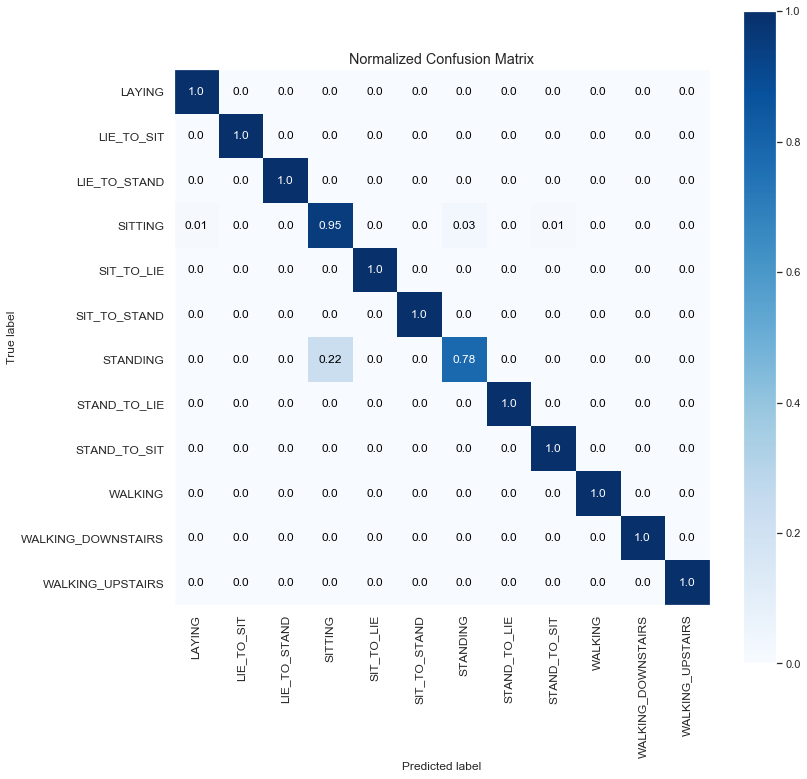

In [150]:
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )

### 8.3.2 KNN Fine-Tuning

In [159]:
balanced_acc_list = []
for i in range( 1, 30 ):
    print( 'K-value: {}'.format( i ) )
    # model definition
    model_knn = nb.KNeighborsClassifier( n_neighbors=i, n_jobs=-1 )

    # train model
    model_knn.fit( x_train, y_train )
    
    # prediction
    yhat = model_knn.predict( x_test )
    
    # Balanced Accuracy Score
    balanced_acc_list.append( m.balanced_accuracy_score( y_test, yhat ) )

K-value: 1
K-value: 2
K-value: 3
K-value: 4
K-value: 5
K-value: 6
K-value: 7
K-value: 8
K-value: 9
K-value: 10
K-value: 11
K-value: 12
K-value: 13
K-value: 14
K-value: 15
K-value: 16
K-value: 17
K-value: 18
K-value: 19
K-value: 20
K-value: 21
K-value: 22
K-value: 23
K-value: 24
K-value: 25
K-value: 26
K-value: 27
K-value: 28
K-value: 29


Text(0, 0.5, 'Balanced Accuracy')

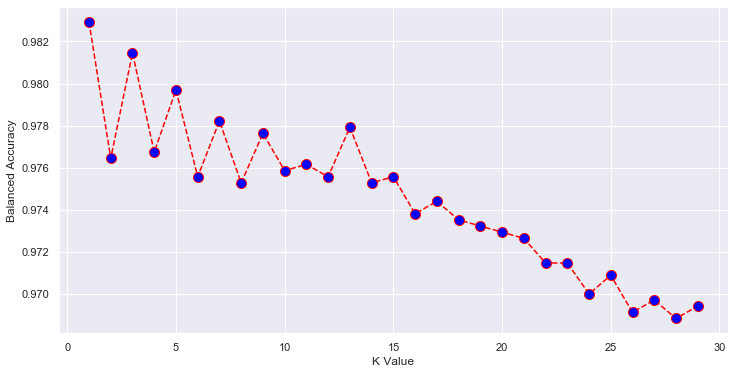

In [160]:
plt.figure( figsize=(12, 6) )
plt.plot( range( 1, 30 ), balanced_acc_list, color='red', linestyle='dashed', marker='o',
                                             markerfacecolor='blue', markersize=10 )
plt.xlabel( 'K Value' )
plt.ylabel( 'Balanced Accuracy' )

## 8.4 Model: Support Vector Machine

In [166]:
# model definition
model_svm = svm.SVC(random_state=32)

# model training
model_svm.fit( x_train, y_train )

SVC(random_state=32)

### 8.4.1 SVM Performance

In [167]:
# prediction
yhat = model_svm.predict( x_test )

                    precision    recall  f1-score   support

            LAYING      0.997     1.000     0.998       285
        LIE_TO_SIT      1.000     1.000     1.000       285
      LIE_TO_STAND      1.000     0.996     0.998       285
           SITTING      0.961     0.947     0.954       283
        SIT_TO_LIE      0.990     1.000     0.995       284
      SIT_TO_STAND      1.000     1.000     1.000       285
          STANDING      0.954     0.958     0.956       283
      STAND_TO_LIE      1.000     0.993     0.996       285
      STAND_TO_SIT      0.993     1.000     0.996       284
           WALKING      0.996     0.996     0.996       285
WALKING_DOWNSTAIRS      0.996     1.000     0.998       284
  WALKING_UPSTAIRS      0.996     0.993     0.995       284

          accuracy                          0.990      3412
         macro avg      0.990     0.990     0.990      3412
      weighted avg      0.990     0.990     0.990      3412

Accuracy: 0.9903282532239156
Weighted

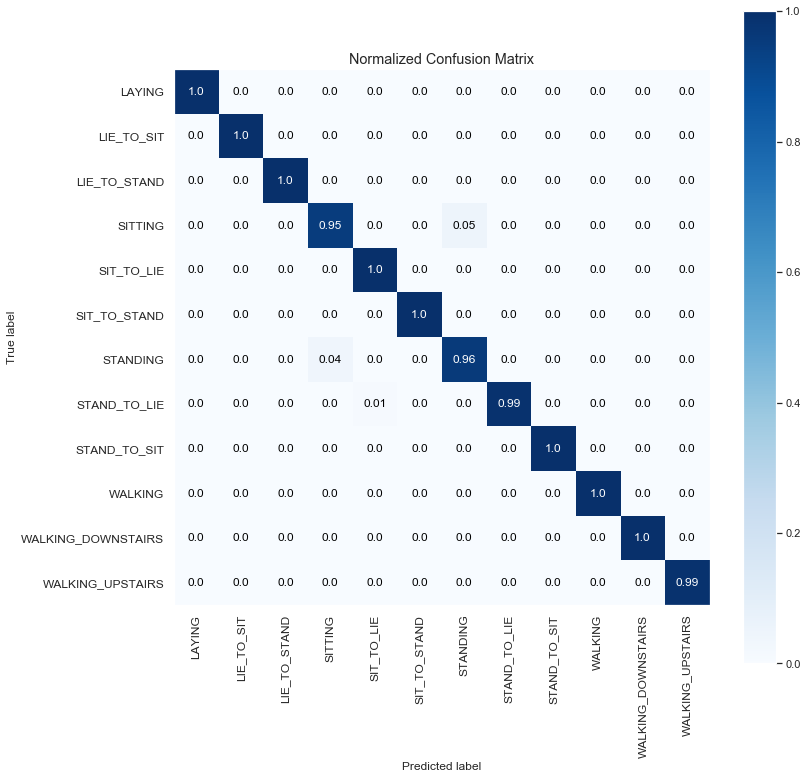

In [168]:
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )

### 8.4.2 SVM Performance - Cross Validation

In [169]:
# geneate K-Fold
num_fold = 5
kfold = ms.StratifiedKFold( n_splits=num_fold, shuffle=True, random_state=32 )

balanced_acc_list = []
kappa_list = []
weighted_f1_score_list = []
i = 1

for train_ix, val_ix in kfold.split( x_train, y_train ):
    print( 'Fold Number: {}/{}'.format( i, num_fold ) )
    
    # get fold data -
    x_train_fold = x_train.iloc[train_ix]
    x_val_fold = x_train.iloc[val_ix]
    
    y_train_fold = y_train.iloc[train_ix]
    y_val_fold = y_train.iloc[val_ix]
    
    # model definition
    model = svm.SVC( random_state=32 )

    # train model
    model.fit( x_train_fold, y_train_fold )

    # prediction
    yhat_fold = model.predict( x_val_fold )

    # Balanced Accuracy
    balanced_acc = m.balanced_accuracy_score( y_val_fold, yhat_fold )
    balanced_acc_list.append( balanced_acc )

    # Kappa Metrics
    kappa = m.cohen_kappa_score( y_val_fold, yhat_fold )
    kappa_list.append( kappa )
    
    # Weighted F1-Score
    weighted_f1_score = m.f1_score( y_val_fold, yhat_fold, average='weighted')
    weighted_f1_score_list.append( weighted_f1_score )
    
    i += 1
    
print( 'Avg Balanced Accuracy: {}'.format( np.mean( balanced_acc_list ) ) )
print( 'Avg Weighted F1-Score: {}'.format( np.mean( weighted_f1_score_list ) ) )
print( 'Avg Kappa: {}'.format( np.mean( kappa_list ) ) )

Fold Number: 1/5
Fold Number: 2/5
Fold Number: 3/5
Fold Number: 4/5
Fold Number: 5/5
Avg Balanced Accuracy: 0.9831610591199322
Avg Weighted F1-Score: 0.9831979325539516
Avg Kappa: 0.981695200033051


## 8.5 Model: Extra Trees Classifier

In [170]:
# model definition
model_extratrees = en.ExtraTreesClassifier( n_jobs=-1, random_state=32 )

# train model
model_extratrees.fit( x_train, y_train )

ExtraTreesClassifier(n_jobs=-1, random_state=32)

### 8.5.1 Extra Trees Performance

In [171]:
# prediction
yhat = model_extratrees.predict( x_test )

                    precision    recall  f1-score   support

            LAYING      1.000     0.996     0.998       285
        LIE_TO_SIT      1.000     1.000     1.000       285
      LIE_TO_STAND      1.000     1.000     1.000       285
           SITTING      0.972     0.979     0.975       283
        SIT_TO_LIE      1.000     1.000     1.000       284
      SIT_TO_STAND      1.000     1.000     1.000       285
          STANDING      0.986     0.968     0.977       283
      STAND_TO_LIE      0.997     1.000     0.998       285
      STAND_TO_SIT      0.990     1.000     0.995       284
           WALKING      0.996     0.996     0.996       285
WALKING_DOWNSTAIRS      1.000     0.993     0.996       284
  WALKING_UPSTAIRS      0.993     1.000     0.996       284

          accuracy                          0.994      3412
         macro avg      0.994     0.994     0.994      3412
      weighted avg      0.994     0.994     0.994      3412

Accuracy: 0.9944314185228605
Weighted

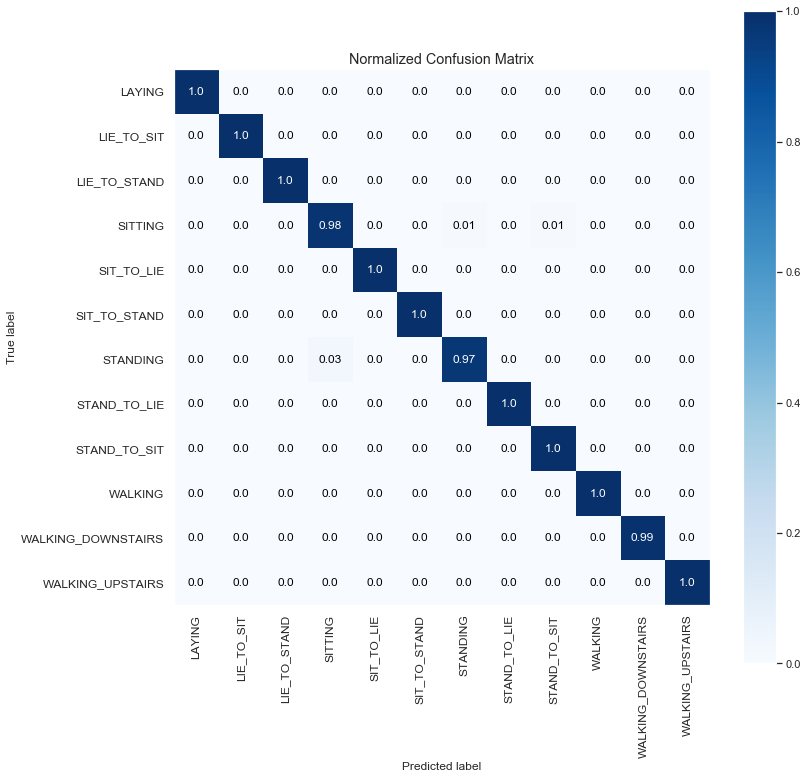

In [172]:
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )

### 8.5.2 Extra Trees Performance - Cross Validation

In [173]:
# geneate K-Fold
num_fold = 5
kfold = ms.StratifiedKFold( n_splits=num_fold, shuffle=True, random_state=32 )

balanced_acc_list = []
kappa_list = []
weighted_f1_score_list = []
i = 1

for train_ix, val_ix in kfold.split( x_train, y_train ):
    print( 'Fold Number: {}/{}'.format( i, num_fold ) )
    
    # get fold data -
    x_train_fold = x_train.iloc[train_ix]
    x_val_fold = x_train.iloc[val_ix]
    
    y_train_fold = y_train.iloc[train_ix]
    y_val_fold = y_train.iloc[val_ix]
    
    # model definition
    model = en.ExtraTreesClassifier( n_jobs=-1, random_state=32 )

    # train model
    model.fit( x_train_fold, y_train_fold )

    # prediction
    yhat_fold = model.predict( x_val_fold )

    # Balanced Accuracy
    balanced_acc = m.balanced_accuracy_score( y_val_fold, yhat_fold )
    balanced_acc_list.append( balanced_acc )

    # Kappa Metrics
    kappa = m.cohen_kappa_score( y_val_fold, yhat_fold )
    kappa_list.append( kappa )
    
    # Weighted F1-Score
    weighted_f1_score = m.f1_score( y_val_fold, yhat_fold, average='weighted')
    weighted_f1_score_list.append( weighted_f1_score )
    
    i += 1
    
print( 'Avg Balanced Accuracy: {}'.format( np.mean( balanced_acc_list ) ) )
print( 'Avg Weighted F1-Score: {}'.format( np.mean( weighted_f1_score_list ) ) )
print( 'Avg Kappa: {}'.format( np.mean( kappa_list ) ) )

Fold Number: 1/5
Fold Number: 2/5
Fold Number: 3/5
Fold Number: 4/5
Fold Number: 5/5
Avg Balanced Accuracy: 0.9928702692985762
Avg Weighted F1-Score: 0.9928821486682755
Avg Kappa: 0.9922465758584116


## 8.6 Model: Random Forest Classifier

In [174]:
# model definition
model_rf = en.RandomForestClassifier( n_jobs=-1, random_state=32 )

# train model
model_rf.fit( x_train, y_train )

RandomForestClassifier(n_jobs=-1, random_state=32)

### 8.6.1 Random Forest Performance

In [175]:
# prediction
yhat = model_rf.predict( x_test )

                    precision    recall  f1-score   support

            LAYING      1.000     0.996     0.998       285
        LIE_TO_SIT      1.000     1.000     1.000       285
      LIE_TO_STAND      1.000     1.000     1.000       285
           SITTING      0.972     0.972     0.972       283
        SIT_TO_LIE      1.000     1.000     1.000       284
      SIT_TO_STAND      1.000     1.000     1.000       285
          STANDING      0.979     0.972     0.975       283
      STAND_TO_LIE      0.993     1.000     0.997       285
      STAND_TO_SIT      0.996     1.000     0.998       284
           WALKING      0.996     0.989     0.993       285
WALKING_DOWNSTAIRS      0.996     0.989     0.993       284
  WALKING_UPSTAIRS      0.983     0.996     0.990       284

          accuracy                          0.993      3412
         macro avg      0.993     0.993     0.993      3412
      weighted avg      0.993     0.993     0.993      3412

Accuracy: 0.9929660023446659
Weighted

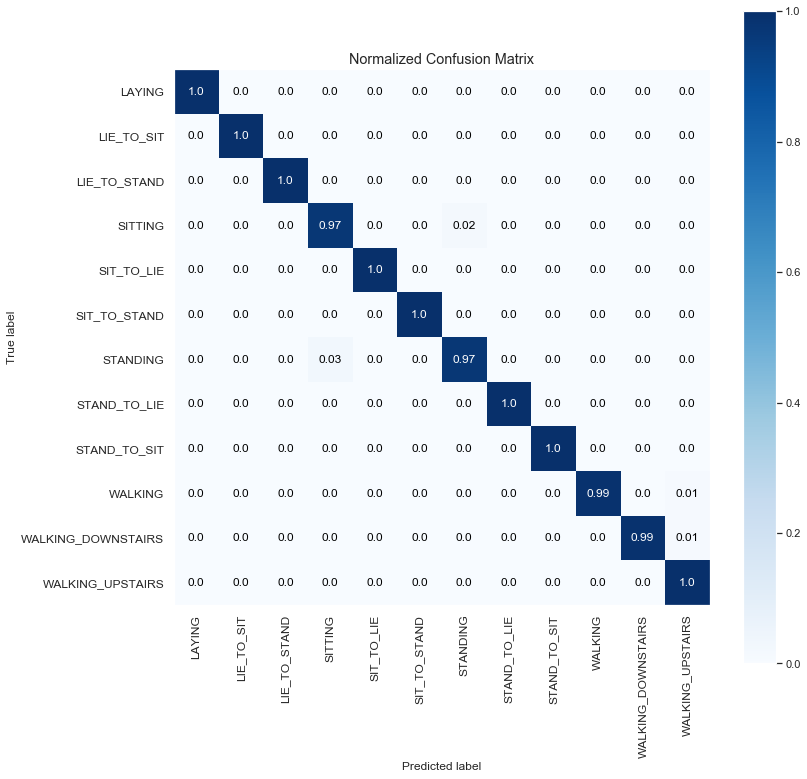

In [176]:
# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )

### 8.6.2 Random Forest Performance - Cross-Validation

In [177]:
# geneate K-Fold
num_fold = 5
kfold = ms.StratifiedKFold( n_splits=num_fold, shuffle=True, random_state=32 )

balanced_acc_list = []
kappa_list = []
weighted_f1_score_list = []
i = 1

for train_ix, val_ix in kfold.split( x_train, y_train ):
    print( 'Fold Number: {}/{}'.format( i, num_fold ) )
    
    # get fold data -
    x_train_fold = x_train.iloc[train_ix]
    x_val_fold = x_train.iloc[val_ix]
    
    y_train_fold = y_train.iloc[train_ix]
    y_val_fold = y_train.iloc[val_ix]
    
    # model definition
    model = en.RandomForestClassifier( n_jobs=-1, random_state=32 )

    # train model
    model.fit( x_train_fold, y_train_fold )

    # prediction
    yhat_fold = model.predict( x_val_fold )

    # Balanced Accuracy
    balanced_acc = m.balanced_accuracy_score( y_val_fold, yhat_fold )
    balanced_acc_list.append( balanced_acc )

    # Kappa Metrics
    kappa = m.cohen_kappa_score( y_val_fold, yhat_fold )
    kappa_list.append( kappa )
    
    # Weighted F1-Score
    weighted_f1_score = m.f1_score( y_val_fold, yhat_fold, average='weighted')
    weighted_f1_score_list.append( weighted_f1_score )
    
    i += 1
    
print( 'Avg Balanced Accuracy: {}'.format( np.mean( balanced_acc_list ) ) )
print( 'Avg Weighted F1-Score: {}'.format( np.mean( weighted_f1_score_list ) ) )
print( 'Avg Kappa: {}'.format( np.mean( kappa_list ) ) )

Fold Number: 1/5
Fold Number: 2/5
Fold Number: 3/5
Fold Number: 4/5
Fold Number: 5/5
Avg Balanced Accuracy: 0.9905922269482785
Avg Weighted F1-Score: 0.9906148124645716
Avg Kappa: 0.9897685818345522


# 9.0 STEP 09 - HYPERPARAMETER FINE TUNING

In [180]:
param = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'criterion': ['gini', 'entropy'],
    'max_features':  ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
        }

MAX_EVAL = 5

In [227]:
result_list = []

for i in range( MAX_EVAL ):
    # chose values from parameters randomly
    hp = {k: random.sample( v, 1 )[0] for k, v, in param.items() }
    print( hp )
    
    # model definition
    model_extratrees = en.ExtraTreesClassifier( 
                        n_estimators=hp['n_estimators'], 
                        criterion=hp['criterion'],
                        max_features=hp['max_features'],
                        bootstrap=hp['bootstrap'],
                        n_jobs=-1,
                        random_state=32 )
    
    # train model
    model_extratrees.fit( x_train, y_train )

    # prediction
    yhat = model_extratrees.predict( x_test )

    # Balanced Accuracy
    balanced_acc = m.balanced_accuracy_score( y_test, yhat )
    balanced_acc_list.append( balanced_acc )

    # Kappa Metrics
    kappa = m.cohen_kappa_score( y_test, yhat )
    kappa_list.append( kappa )
    
    # Weighted F1-Score
    weighted_f1_score = m.f1_score( y_test, yhat, average='weighted')
    weighted_f1_score_list.append( weighted_f1_score )
    
    result_list.append( [float(np.mean( balanced_acc_list )), float(np.mean( weighted_f1_score_list )), float(np.mean( kappa_list ))] )

final_result = pd.DataFrame( result_list, columns=['Avg Balanced Accuracy', 'Avg Weighted F1-Score', 'Avg Kappa'] )
final_result

{'n_estimators': 100, 'criterion': 'gini', 'max_features': 'log2', 'bootstrap': True}
{'n_estimators': 40, 'criterion': 'entropy', 'max_features': 'auto', 'bootstrap': False}
{'n_estimators': 100, 'criterion': 'gini', 'max_features': 'auto', 'bootstrap': True}
{'n_estimators': 50, 'criterion': 'entropy', 'max_features': 'auto', 'bootstrap': True}
{'n_estimators': 10, 'criterion': 'entropy', 'max_features': 'log2', 'bootstrap': False}


Avg Balanced Accuracy  Avg Weighted F1-Score  Avg Kappa
0               0.991160               0.991173   0.990390
1               0.991234               0.991247   0.990470
2               0.991328               0.991341   0.990572
3               0.991355               0.991368   0.990602
4               0.991041               0.991054   0.990261

## 9.1 Optimized Model

In [228]:
param = {
    'n_estimators': 50,
    'criterion': 'entropy',
    'max_features':  'auto',
    'bootstrap': True
        }

In [229]:
# model definition
model_extratrees_tuned = en.ExtraTreesClassifier( 
                        n_estimators=hp['n_estimators'], 
                        criterion=hp['criterion'],
                        max_features=hp['max_features'],
                        bootstrap=hp['bootstrap'],
                        n_jobs=-1,
                        random_state=32 )

# model training
model_extratrees_tuned.fit( x_train, y_train )

ExtraTreesClassifier(criterion='entropy', max_features='log2', n_estimators=10,
                     n_jobs=-1, random_state=32)

## 9.2 Save Model Trained

In [233]:
# Save Trained model
pickle.dump( model_extratrees_tuned, open( 'model/model_HAR.pkl', 'wb' ))

# 10.0 STEP 10 - DEPLOY MODEL INTO PRODUCTION

**In this project I won't put the model in production. If you want to see in more details how I do it, check my other project where I did the model deploy. <br>
Rossmann Project:** https://github.com/panambY/Rossmann_Store_Sale

In this part, some Python code is built to assemble the entire structure that will trigger the classes and functions to make the model trigger when the store number is entered. In this first moment, the model will be stored in the cloud inside the Heroku platform and accessed through the Jupyter Notebook as a test to verify its correct functioning.

The goal here is to make the prediction model accessible to anyone. To achieve this, an API is created.

The architecture of the model in production:

- **Handler API** -> is the part that receives the requests and plays for the other parts so that the data is processed and then brings everything together, returning the final answer.
- **Data Preparation** -> all the treatments and modifications we made to the data will be kept inside. When the Handler receives the raw data it will throw it here within this list of treatment codes so that they are prepared so that they can be ready to be used within the Machine Learning model.
- **Model Training** -> this is our trained model that has been saved and will be placed inside this folder in our production architecture. The Handler will take the data processed within Data Preparation and play it inside the model so that it provides the prediction.

At the end of the construction of all this architecture and being put into production, the way it will be visualized can be through an App, Dashboard or a website.

                    precision    recall  f1-score   support

            LAYING      0.989     0.989     0.989       285
        LIE_TO_SIT      0.990     0.996     0.993       285
      LIE_TO_STAND      1.000     1.000     1.000       285
           SITTING      0.903     0.926     0.914       283
        SIT_TO_LIE      0.990     1.000     0.995       284
      SIT_TO_STAND      1.000     1.000     1.000       285
          STANDING      0.937     0.894     0.915       283
      STAND_TO_LIE      1.000     0.996     0.998       285
      STAND_TO_SIT      0.990     1.000     0.995       284
           WALKING      0.972     0.989     0.981       285
WALKING_DOWNSTAIRS      0.986     0.982     0.984       284
  WALKING_UPSTAIRS      0.993     0.975     0.984       284

          accuracy                          0.979      3412
         macro avg      0.979     0.979     0.979      3412
      weighted avg      0.979     0.979     0.979      3412

Accuracy: 0.9791910902696366
Weighted

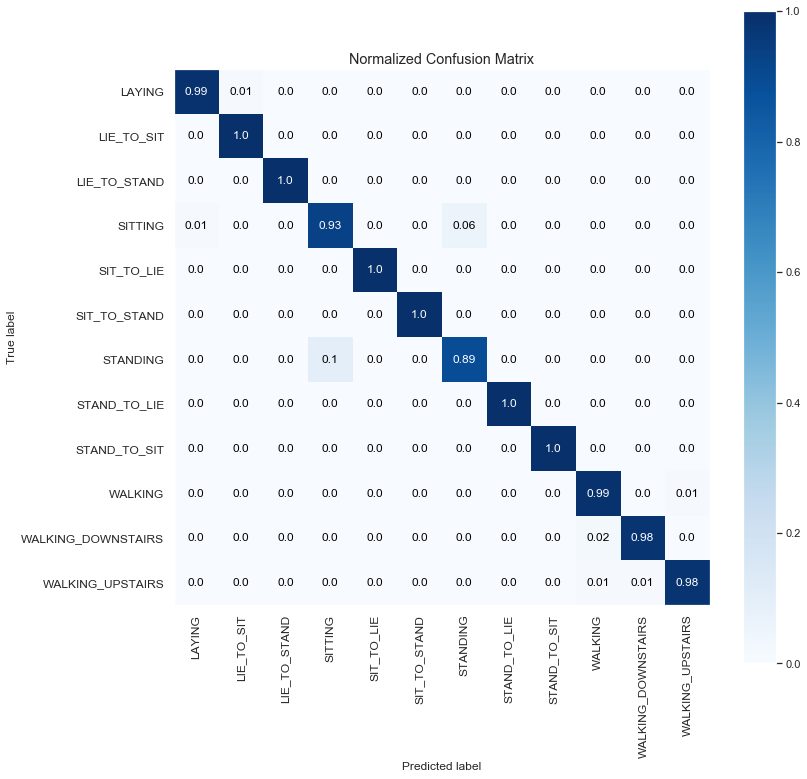

In [236]:
# load Final Model
final_model = pickle.load( open( 'model/model_HAR.pkl', 'rb' ) )

# Load Test Data
df_X_raw = pd.read_csv('data/test/X_test.txt', sep=" ", header=None)
df_y_raw = pd.read_csv('data/test/y_test.txt', sep=" ", header=None)
df_subject_raw = pd.read_csv('data/test/subject_id_test.txt', sep=" ", header=None)

df_X_raw.columns = cols_name

# Define x_train and y_train
x_train = df_X_raw
x_train['subject'] = df_subject_raw
y_train['position'] = df_y_raw

# Prediction
yhat = final_model.predict( x_test )

# Confusion Matrix
mt.plot_confusion_matrix( y_test, yhat, normalize=True, figsize=( 12, 12 ) )
plt.xticks(rotation ='vertical')

# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print( m.classification_report( y_test, yhat, digits=3 ) )

# =========== Balanced Dataframe Metrics =============
# Accuracy
acc = m.accuracy_score( y_test, yhat )
print( 'Accuracy: {}'.format( acc ) )

# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1_score = m.f1_score( y_test, yhat, average='weighted' )
print( 'Weighted F1-Score: {}'.format( f1_score ) )

# Balanced Accuracy Score
balanced_acc = m.balanced_accuracy_score( y_test, yhat )
print( 'Balanced Accuracy Score: {}'.format( balanced_acc ) )

# Kappa Metrics
print( 'Kappa Score: {}'.format( m.cohen_kappa_score( y_test, yhat ) ) )

In [238]:
# geneate K-Fold
num_fold = 5
kfold = ms.StratifiedKFold( n_splits=num_fold, shuffle=True, random_state=32 )

balanced_acc_list = []
kappa_list = []
weighted_f1_score_list = []
i = 1

for test_ix, val_ix in kfold.split( x_test, y_test ):
    print( 'Fold Number: {}/{}'.format( i, num_fold ) )
    
    # get fold data -
    x_test_fold = x_test.iloc[test_ix]
    x_val_fold = x_test.iloc[val_ix]
    
    y_test_fold = y_test.iloc[test_ix]
    y_val_fold = y_test.iloc[val_ix]
    
    # prediction
    yhat_fold = final_model.predict( x_val_fold )

    # Balanced Accuracy
    balanced_acc = m.balanced_accuracy_score( y_val_fold, yhat_fold )
    balanced_acc_list.append( balanced_acc )

    # Kappa Metrics
    kappa = m.cohen_kappa_score( y_val_fold, yhat_fold )
    kappa_list.append( kappa )
    
    # Weighted F1-Score
    weighted_f1_score = m.f1_score( y_val_fold, yhat_fold, average='weighted')
    weighted_f1_score_list.append( weighted_f1_score )
    
    i += 1
    
print( 'Avg Balanced Accuracy: {}'.format( np.mean( balanced_acc_list ) ) )
print( 'Avg Weighted F1-Score: {}'.format( np.mean( weighted_f1_score_list ) ) )
print( 'Avg Kappa: {}'.format( np.mean( kappa_list ) ) )

Fold Number: 1/5
Fold Number: 2/5
Fold Number: 3/5
Fold Number: 4/5
Fold Number: 5/5
Avg Balanced Accuracy: 0.9791144527986632
Avg Weighted F1-Score: 0.9791245687071737
Avg Kappa: 0.9773013311914974
